<a href="https://colab.research.google.com/github/Clizzyvibes/Coventry-University/blob/main/PRINCIPLES_PORTFOLIO_GROUP_WORK/Copy_of_redo_7144_Data_Science_(Group_Work).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group 16:** \
*  Sodiq AJIBADE, \
*  Cassiel UCHE, \
*  Chukwuemeka Clinton AKERU.


### **Roles in the Group:**


1. **Sodiq AJIBADE**: *PCA Analyst and Visualizer*  
   - Role: Performed the PCA, extracted key components, and visualized results using scree plots and biplots.  
   - Contribution: Provided detailed interpretation of PCA results, identifying the most critical variables influencing the dataset.  

2. **Cassiel UCHE**: *Cluster Analysis*  
   - Role: Conducted hierarchical clustering, created dendrograms, and compared clustering outcomes with PCA results.  
   - Contribution: Helped identify groups and patterns in the data, aiding in actionable insights.

3. **Chukwuemeka Clinton AKERU**: *Report Compiler and Data Cleaning - Data Preprocessing*  
   - Role: Simplified technical results into clear, concise language for the group report and assisted in data cleaning.  
   - Contribution: Focused on communicating the group findings in a way that one could easily understand. This role requires combining the group's efforts into a joint report and helped to ensure the dataset met the requirements for PCA.


    - Role: Responsible for ensuring that the dataset was cleaned and prepared for analysis, including handling missing values, removing outliers, and standardizing variables.  
    - Contribution: Ensured the dataset met the requirements for PCA and clustering, avoiding errors in implementation.

**Group Task (Task 1)**

### Task 1 (1) - Principal Component Analysis (PCA)
#### (a) PCA with the 12 Pillar Variables
**Objective**: Perform PCA on the 12 pillar variables to understand how the variables contribute to the overall variability in the data and produce relevant visualizations like screeplots, biplots, and loadings plots.

**Importing Necessary Packages**

In [ ]:
# installing necessary packages
install.packages("tidyr")
install.packages("dplyr")
install.packages("tidyverse")
install.packages("factoextra")
install.packages("FactoMineR")
install.packages("cluster")
install.packages("ggfortify")
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load libraries
library(tidyverse)
library(factoextra)  # For PCA and clustering visualization
library(tidyr)
library(dplyr)
library(FactoMineR) # PCA()
library(ggfortify)
library(ggplot2)
library(ggrepel)
library(reshape2)

**Task 1: Multivariate Data Analysis**

**Step 1: Data Preparation**

First, load the dataset, remove NA values, and sort by Overall_Score (descending). We'll also investigate the effect of Region.

In [ ]:
# Load and clean dataset
pillar = read_csv("/content/index_of_economic_freedom_2024.csv")
clean_pillar = pillar %>% drop_na() %>%
  arrange(desc(Overall_Score))

Rows: 184 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country, Region
dbl (14): Year, Overall_Score, Property_Rights, Government_Integrity, Judici...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
data = clean_pillar

**Initial Observations:**

**Dataset Size:** 184 rows x 16 columns.

**Missing Data:** Some columns have missing values. The rows containing this missing data would be removed.

**Column Types:**

- `Country` and `Region` are categorical.

- `Year` is an integer (but only contains 2024, so it's not useful for analysis).

- The remaining columns are numerical, ranging from 0 to 100.

In [ ]:
# Inspect regions
table(data$Region)  # Check regional distribution


                Americas             Asia-Pacific                   Europe 
                      32                       39                       44 
Middle East/North Africa       Sub-Saharan Africa 
                      14                       47 

In [ ]:
# Select only the 12 pillar variables for PCA
pca_data = select(clean_pillar, -c(Country, Region, Overall_Score, Year))

In [ ]:
View(pca_data)

Property_Rights Government_Integrity Judicial_Effectiveness Tax_Burden
1    94.2           88.3                 58.3                    90.7     
2    94.2           91.3                 98.1                    70.4     
3    93.5           83.4                 94.3                    78.0     
4    82.2           73.4                 94.0                    79.2     
5    96.9           84.9                 95.8                    64.6     
6    98.6           97.4                 89.6                    41.8     
7    92.8           81.2                 93.4                    80.8     
8    87.4           95.9                 93.2                    65.5     
9    98.8           95.6                 96.7                    61.7     
10   96.2           93.2                 95.4                    50.6     
11   95.6           87.8                 96.2                    53.1     
12  100.0           94.2                 97.6                    67.8     
13   91.0           85.2                 94.4                    62.6     
14   88.3           69.2                 76.9                    59.0     
15   89.1           68.0                 74.4                    76.8     
16   88.6           73.1                 95.0                    75.8     
17   83.7           55.9                 88.7                    79.9     
18   95.3           86.0                 93.0                    59.3     
19   87.6           64.8                 73.0                    76.6     
20   86.4           52.3                 81.2                    91.5     
21   72.5           68.2                 87.9                    71.8     
22   64.8           64.9                 35.2                   100.0     
23   96.5           83.7                 95.3                    73.6     
24   89.3           60.7                 83.1                    79.6     
25   82.1           65.5                 84.4                    59.3     
26   95.1           74.8                 76.4                    74.8     
27   84.8           78.1                 81.1                    73.8     
28   70.4           51.7                 41.5                    99.7     
29   89.4           65.5                 90.6                    59.8     
30   94.6           84.1                 84.3                    62.3     
⋮   ⋮               ⋮                    ⋮                      ⋮         
147 29.3            24.9                 30.5                   78.3      
148 42.9            28.7                 43.6                   71.9      
149 51.8            36.9                 49.4                   77.5      
150 60.8            42.4                 40.5                   74.9      
151 46.9            41.6                 39.5                   69.1      
152 22.1            33.0                 11.1                   90.1      
153 36.2            30.0                 44.1                   74.1      
154 30.7            22.7                 24.0                   90.5      
155 12.0            12.5                 17.5                   81.7      
156 27.7            33.8                 20.6                   78.4      
157 30.0            12.7                 13.8                   75.5      
158 49.4            39.0                 44.5                   92.4      
159 21.0             5.7                  8.3                   75.1      
160 15.1            11.3                 12.6                   74.2      
161 41.9            38.1                 45.4                   70.8      
162 18.1             7.8                 10.0                   94.3      
163 33.6            34.9                 42.0                   87.4      
164 27.5            27.7                 28.9                   79.4      
165 21.3            28.2                 28.1                   86.9      
166 26.5            19.3                 14.7                   88.9      
167 18.0            21.2                  6.5                   88.5      
168  7.2            16.7     

In [ ]:
# Standardize the data (SCALING is important for PCA so each variable uses the same scale) -- end
summary(pca_data)

 Property_Rights  Government_Integrity Judicial_Effectiveness   Tax_Burden    
 Min.   :  0.00   Min.   : 3.60        Min.   : 3.30          Min.   :  0.00  
 1st Qu.: 37.27   1st Qu.:28.10        1st Qu.:28.80          1st Qu.: 72.42  
 Median : 49.50   Median :40.90        Median :45.80          Median : 78.95  
 Mean   : 54.59   Mean   :44.43        Mean   :49.80          Mean   : 78.10  
 3rd Qu.: 72.55   3rd Qu.:58.48        3rd Qu.:71.88          3rd Qu.: 86.75  
 Max.   :100.00   Max.   :97.40        Max.   :98.10          Max.   :100.00  
 Government_Spending Fiscal_Health    Business_Freedom Labor_Freedom  
 Min.   : 0.00       Min.   :  0.00   Min.   : 5.00    Min.   : 5.00  
 1st Qu.:48.58       1st Qu.: 19.20   1st Qu.:49.30    1st Qu.:51.25  
 Median :70.25       Median : 62.50   Median :65.45    Median :57.05  
 Mean   :64.04       Mean   : 52.18   Mean   :62.18    Mean   :56.11  
 3rd Qu.:82.85       3rd Qu.: 82.45   3rd Qu.:75.35    3rd Qu.:62.65  
 Max.   :97.50       

(Madden, 2022) Scaling is very important for PCA because of the way that the principal components are calculated, that is PCA is solved via the Singular Value Decomposition, which finds linear subspaces which best represent your data in the squared sense.

And using this since the values of each of the pillars are all in percentages, they would typically not require scaling as they are on the same scale. However, due to the differing spread of the pillar variables with some having a wider and others a narrower spread, scaling is important to prevent variables with higher variance from being overweighted in the PCA analysis.

(Madden, 2022) Scaling is crucial for PCA because principal components are computed using Singular Value Decomposition (SVD), which identifies linear subspaces that best represent the data in a least-squares sense.

Since the values of each pillar are expressed as percentages, scaling might not seem necessary at first, given that they share the same unit of measurement. However, due to variations in the spread of these variables with some exhibiting a wider distribution while others are more concentrated/have narrower distribution then scaling is essential. Without scaling, variables with higher variance could dominate the PCA analysis, leading to biased principal components and misrepresentation of the data structure.

**Step 2: Principal Component Analysis (PCA)**

**(a) PCA on 12 Pillar Variables**

We'll use the 12 pillar variables (columns 5-16) for PCA.

**Perform PCA:**:

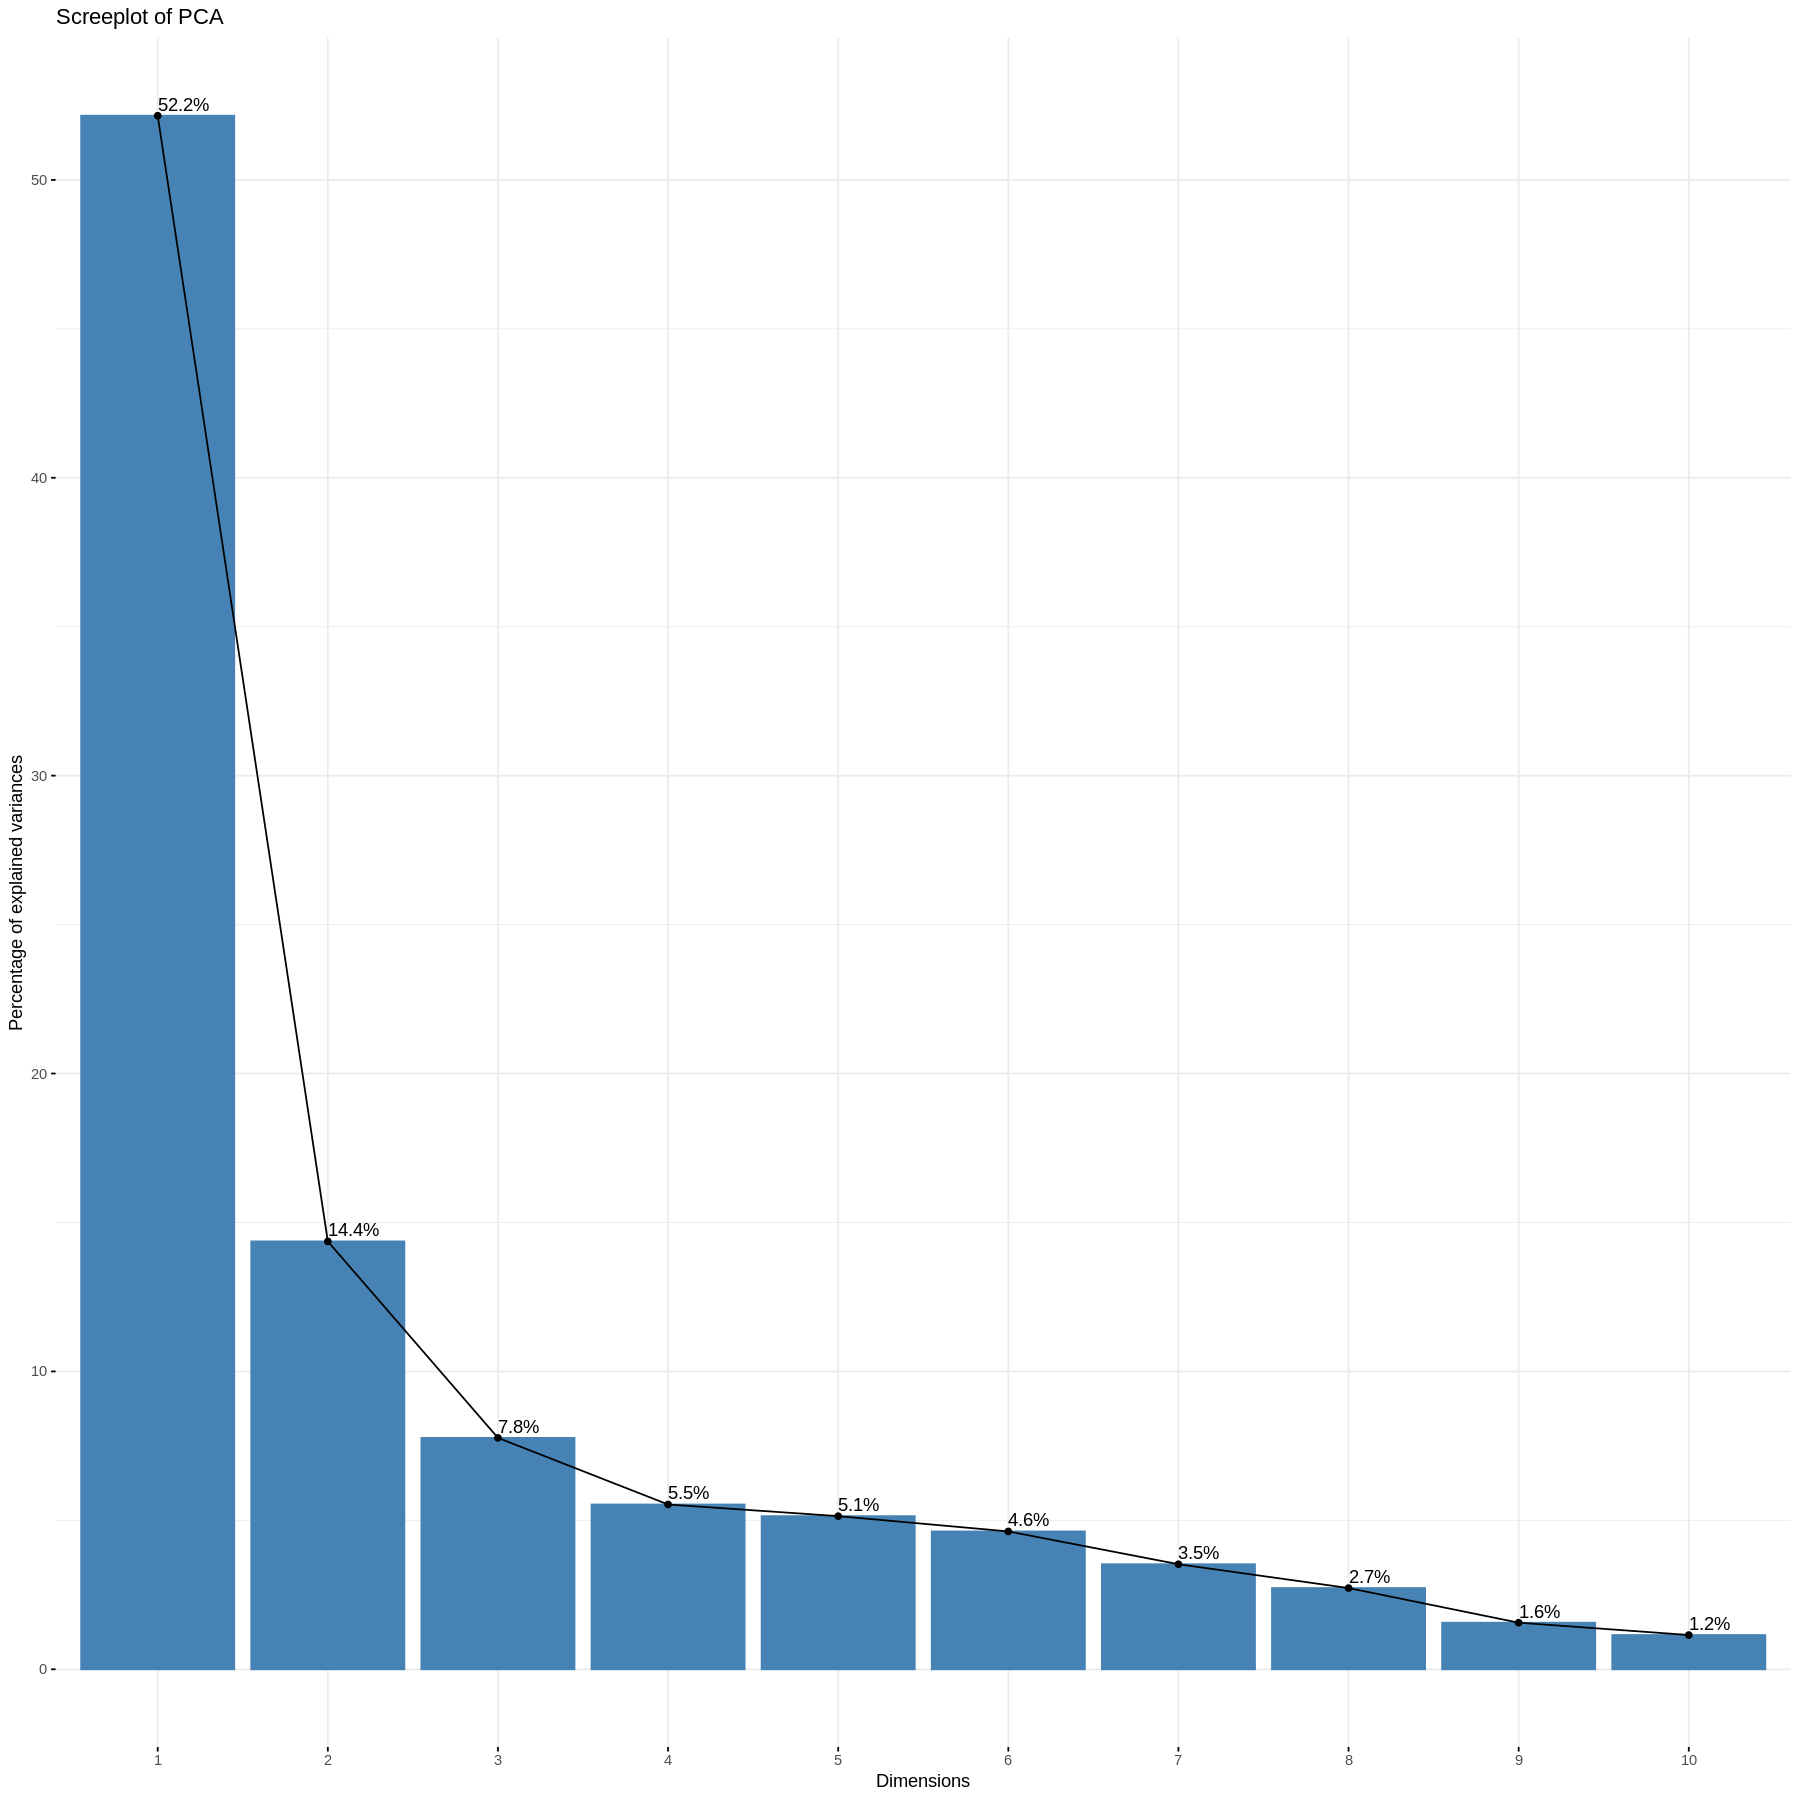

In [ ]:
# Perform PCA without scaling (since all variables are percentages)
pca_results = prcomp(pca_data, scale. = TRUE)

# Screeplot
library(factoextra)
fviz_eig(pca_results, addlabels = TRUE, main = "Screeplot of PCA")

The Screeplot shows us the contribution level to Variance of each PCA, and we would work with PC1, PC2 and PC3 whose toatal give a good amount of variance already - 52.2% + 14.4% + 7.8% = 74.4% which is a good amount of variance.

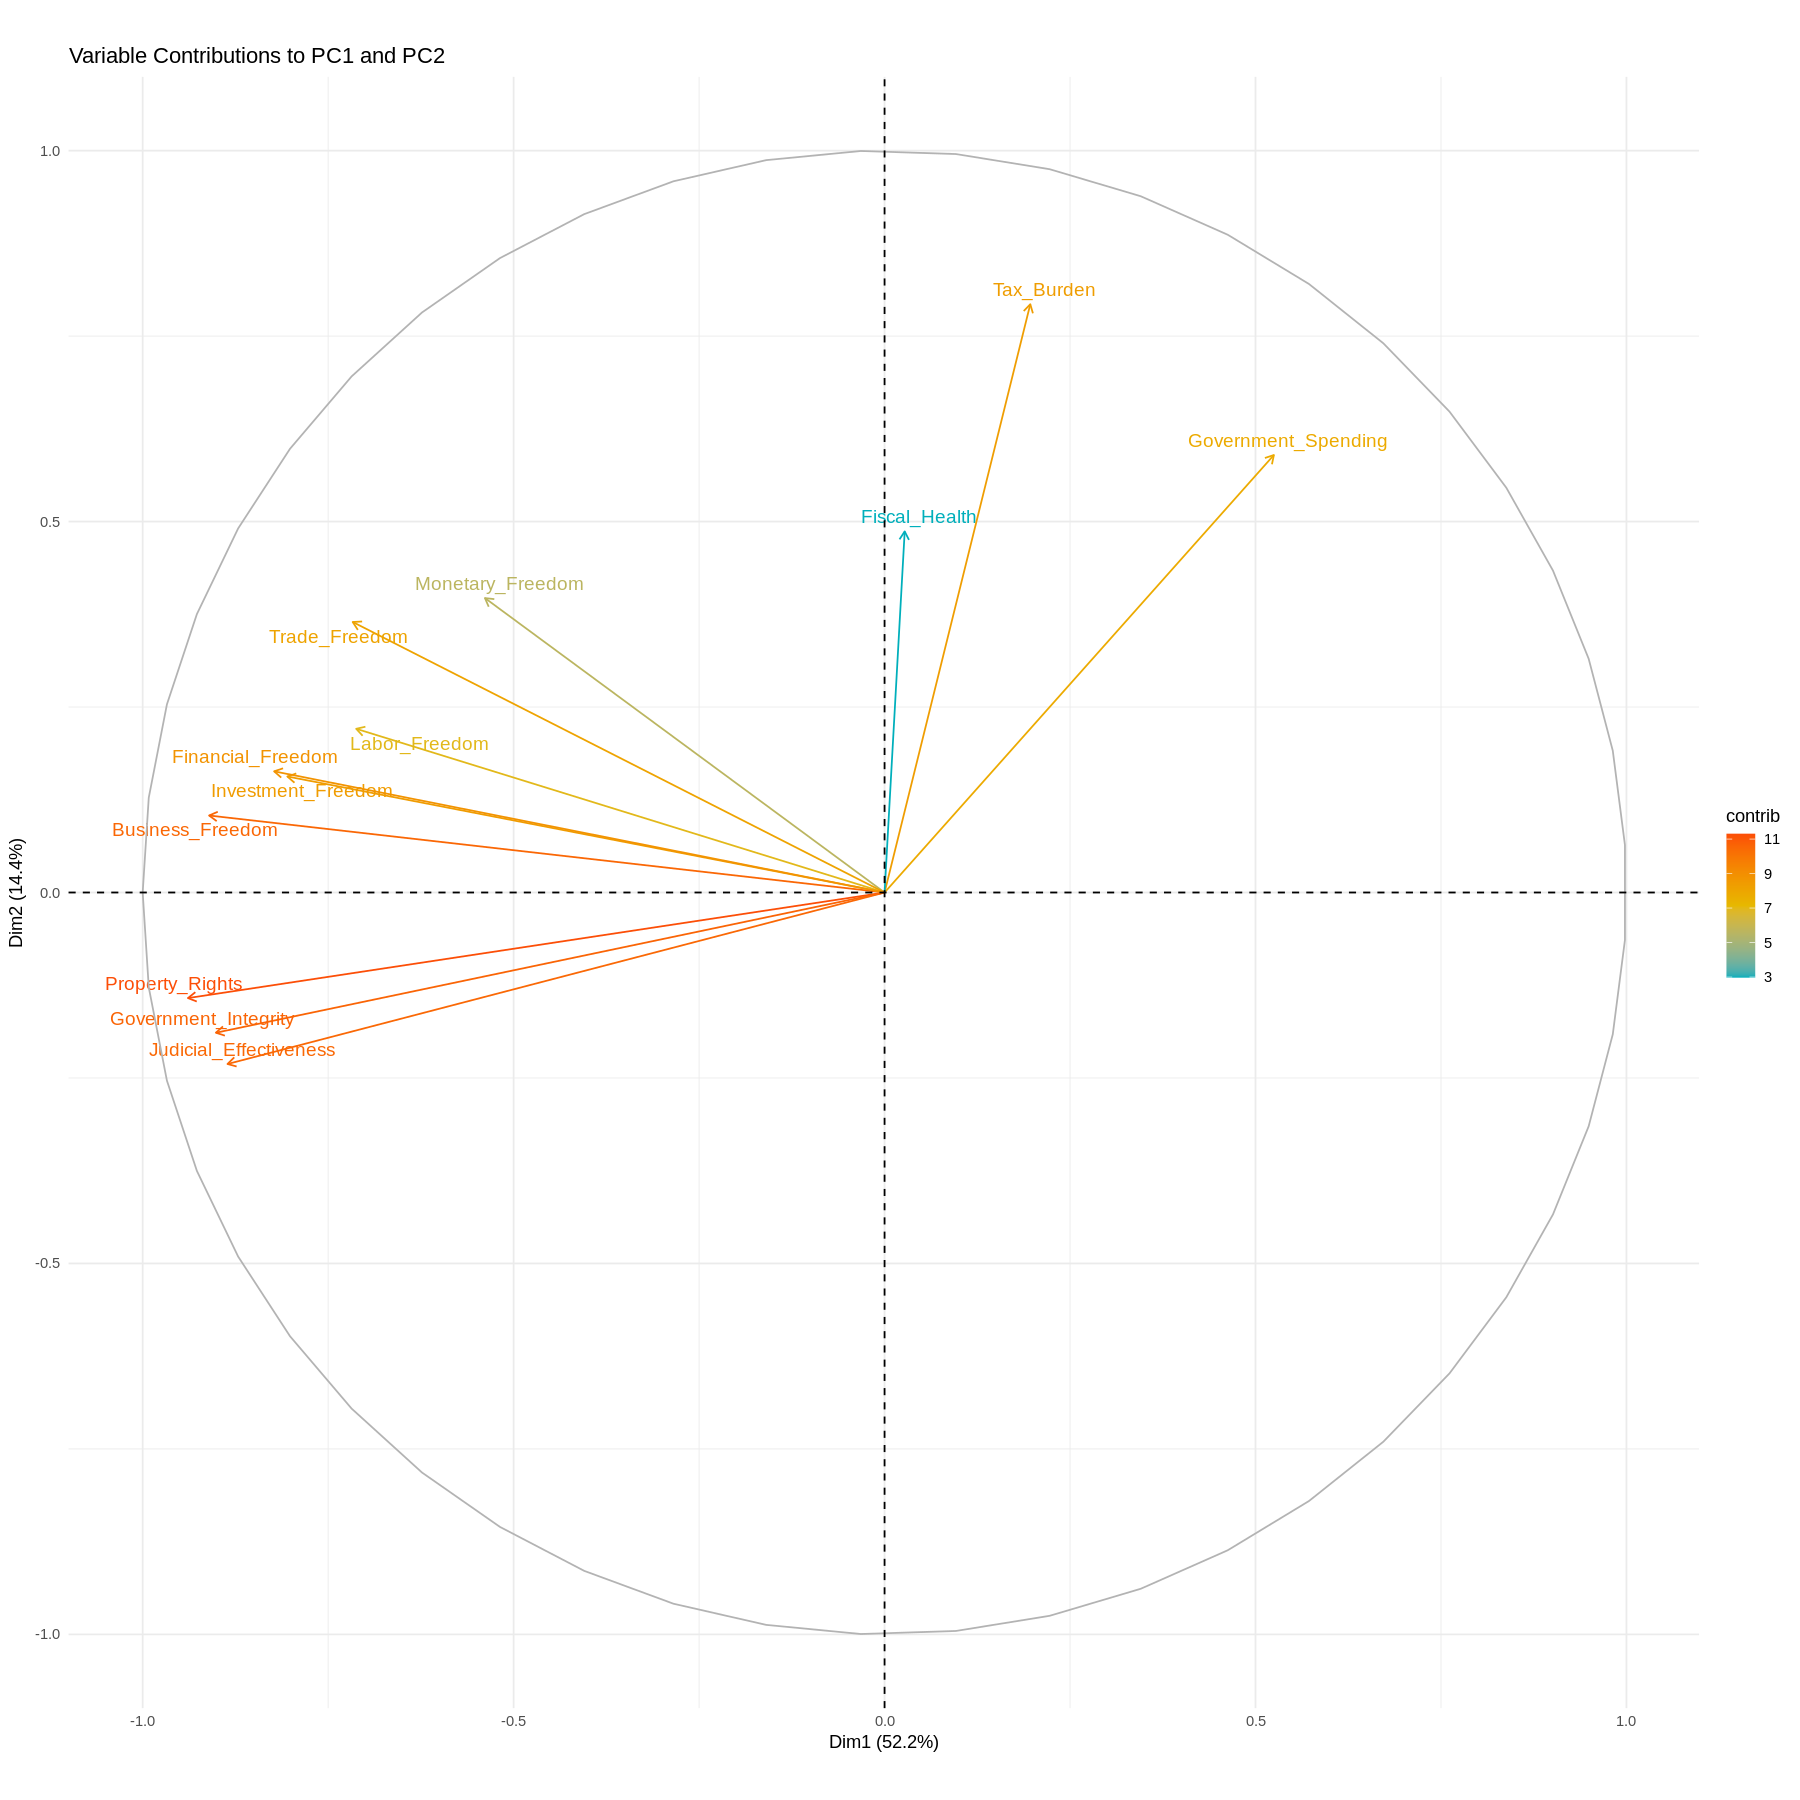

In [ ]:
# Contributions of pillars to PC1 and PC2 plot
fviz_pca_var(pca_result,
             col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE,
             title = "Variable Contributions to PC1 and PC2") +
  theme_minimal()

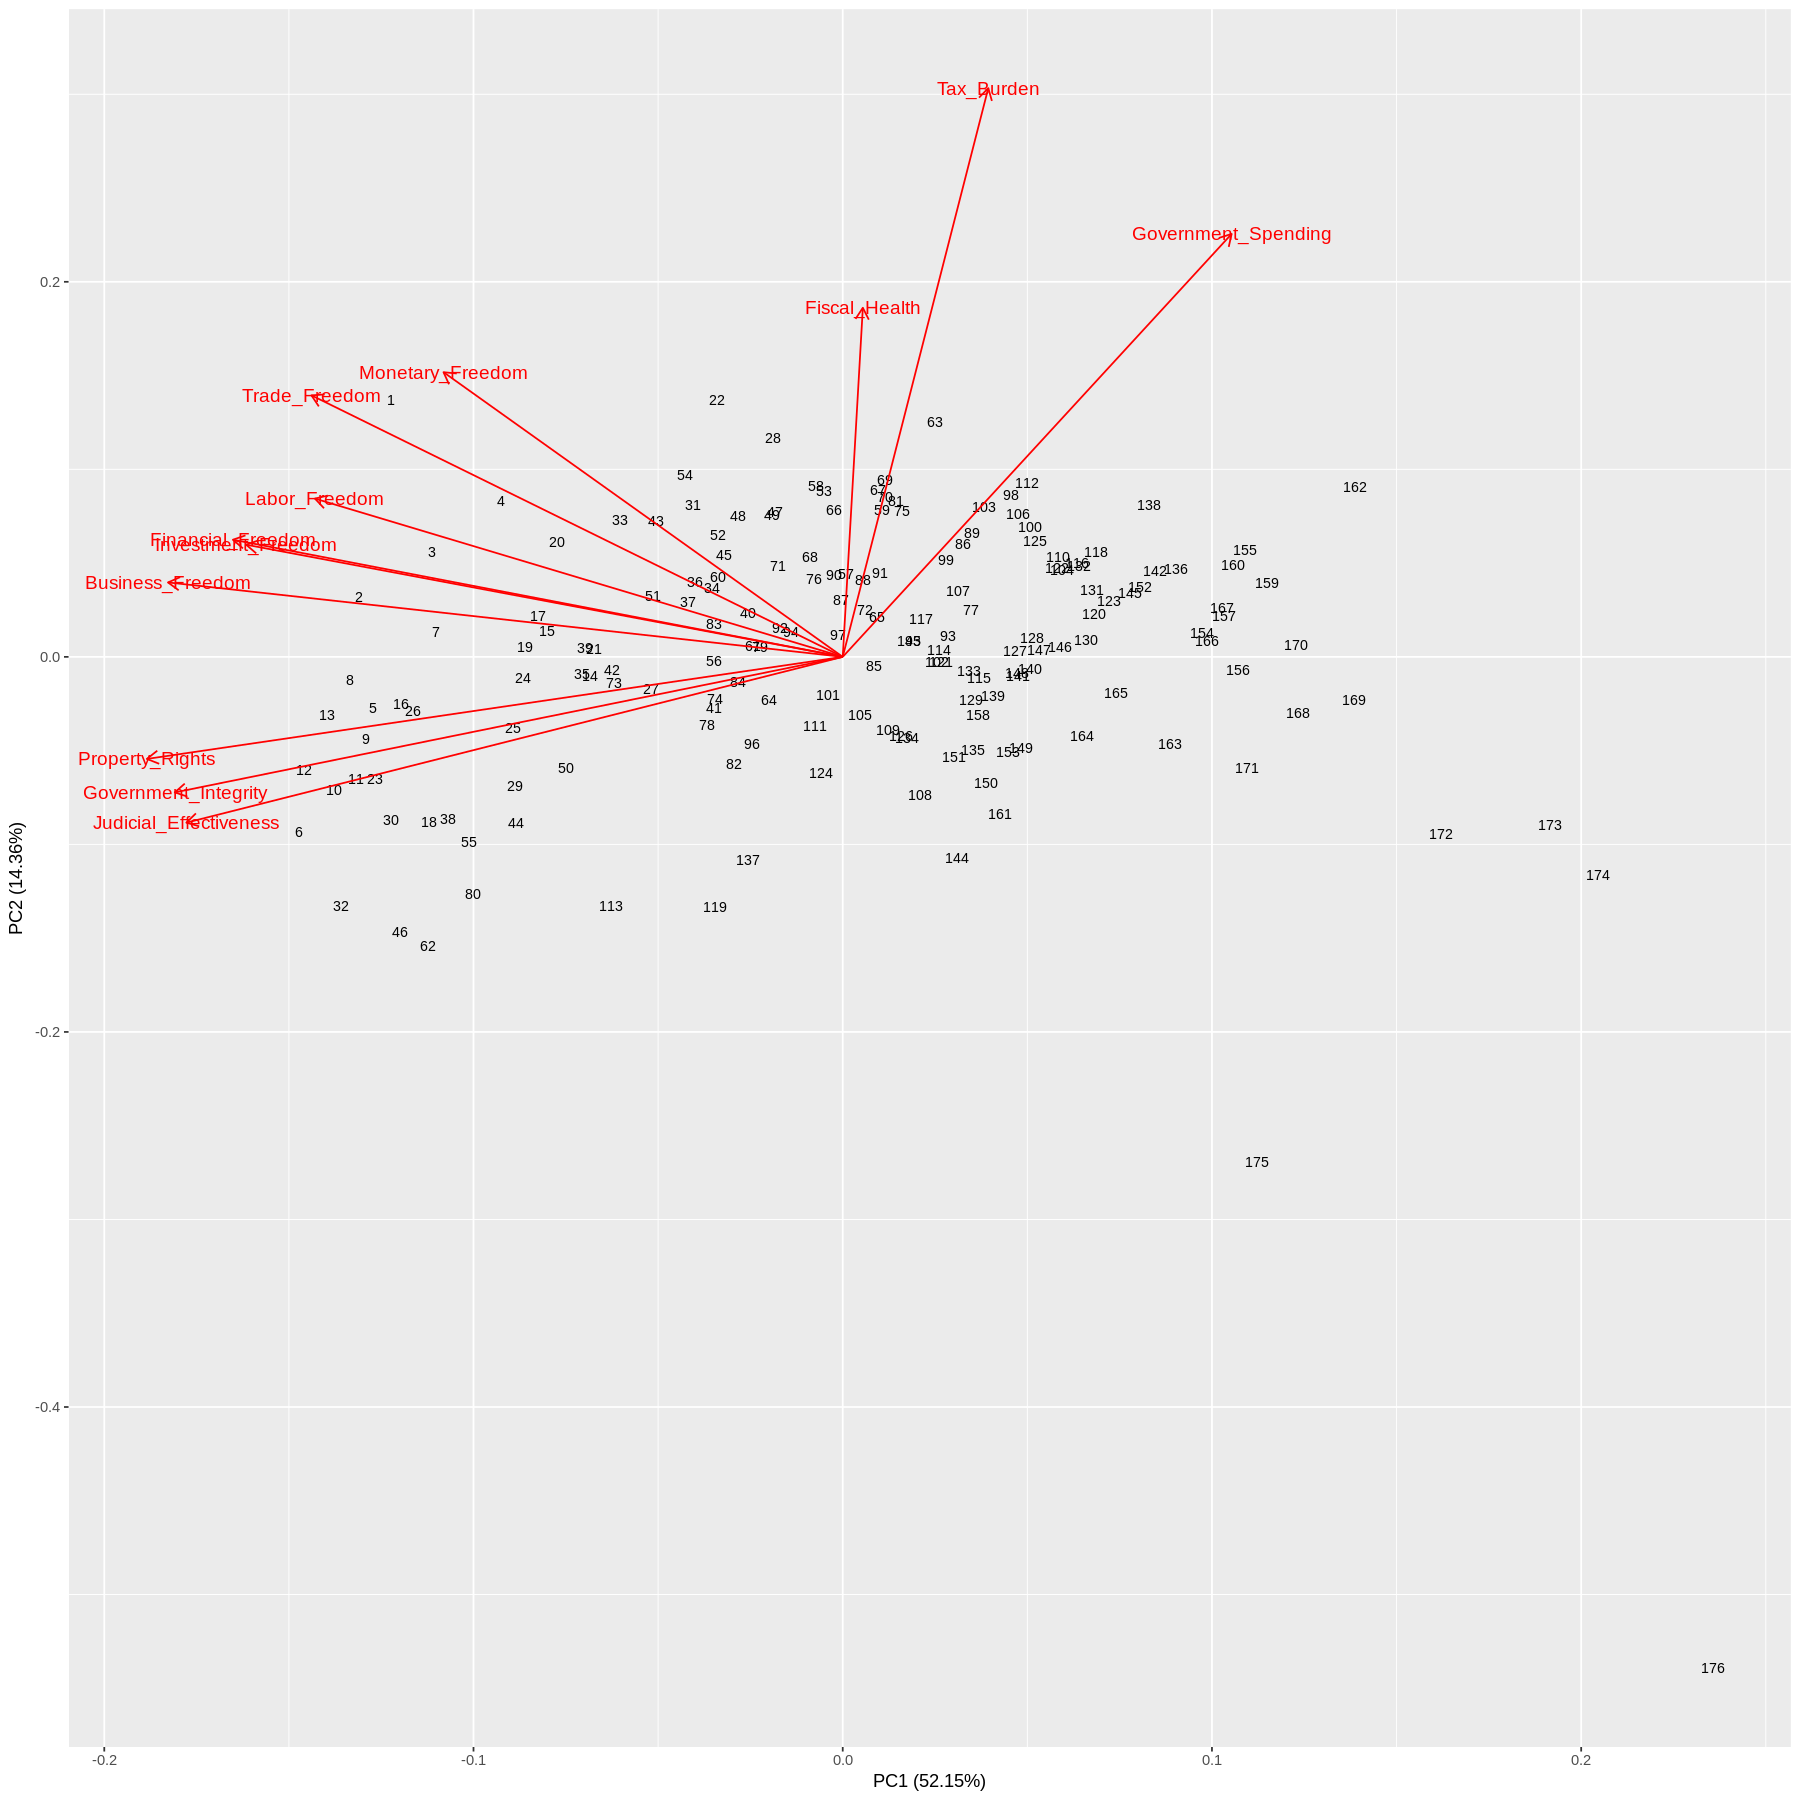

In [ ]:
# Method one of doing the Biplot
options(repr.plot.width = 15, repr.plot.height = 15)  # Adjust width and height of plots

# Biplot PC1 vs PC2
autoplot(pca_result,
                label = TRUE,
                label.size = 3,
                shape = FALSE,
                loadings = TRUE,
                loadings.label = TRUE,
                loadings.label.size = 4,
                title = "PCA Biplot (PC1 vs PC2) by Region")

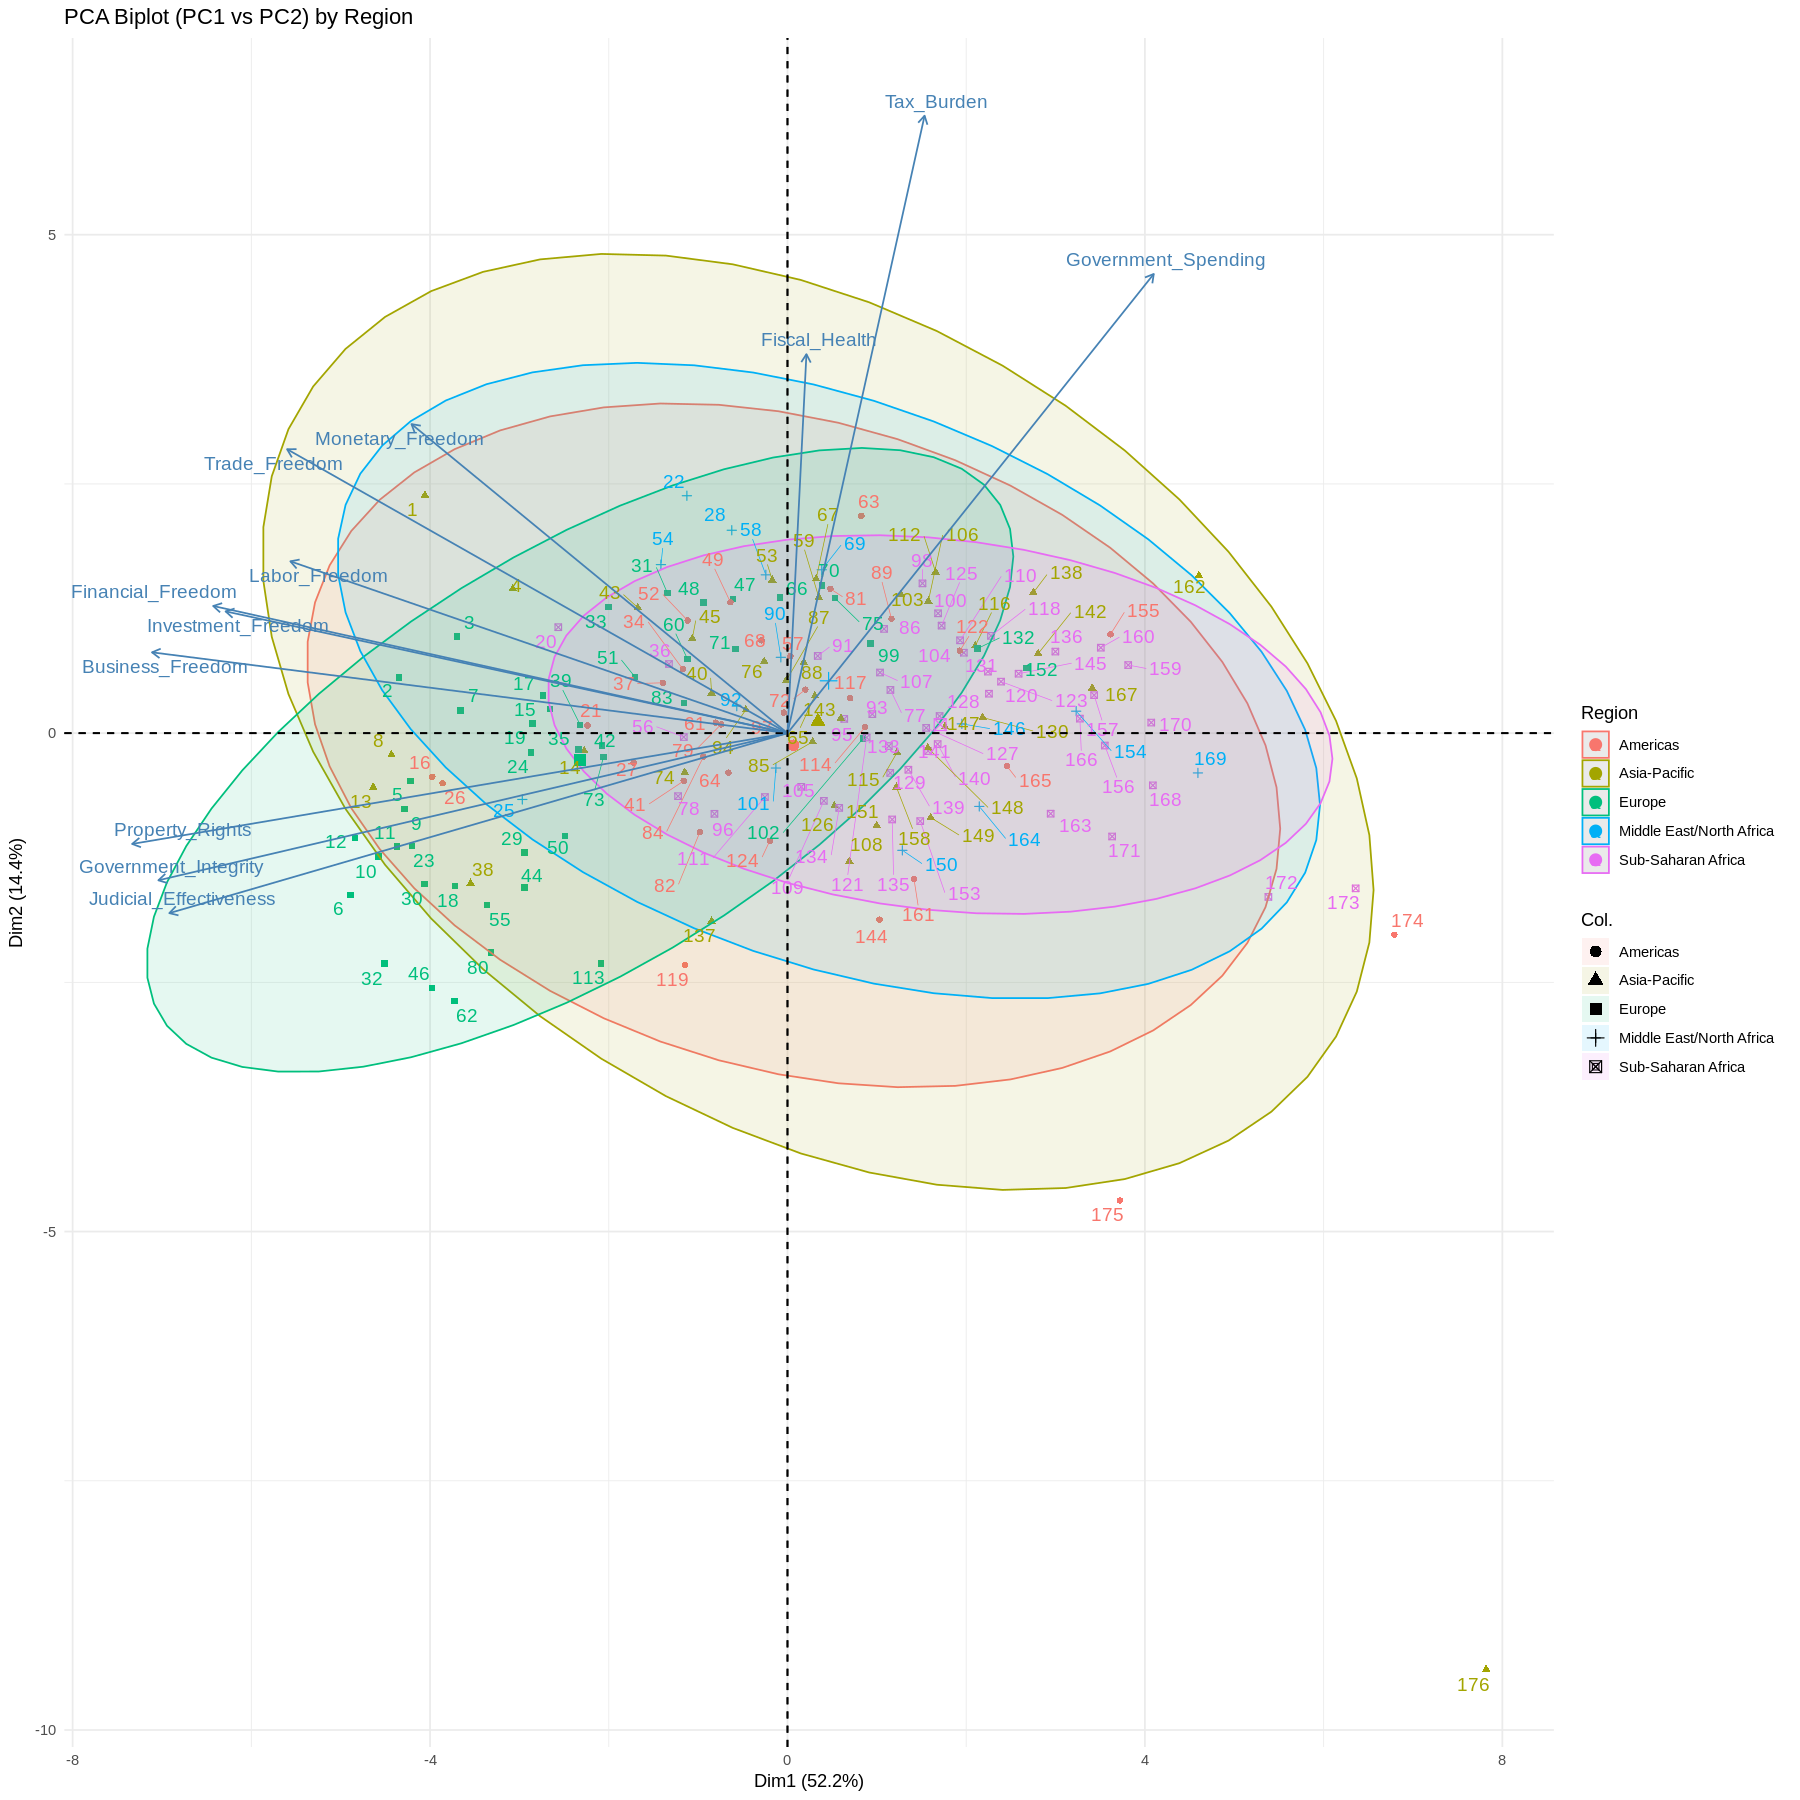

In [ ]:
# Method two of doing the Biplot with ellipse to indicate each region area of concentration
options(repr.plot.width = 15, repr.plot.height = 15)  # Adjust width and height of plots

# Biplot PC1 vs PC2
fviz_pca_biplot(pca_result,
                col.ind = clean_pillar$Region,
                addEllipses = TRUE,
                ellipse.level = 0.95,
                repel = TRUE,
                title = "PCA Biplot (PC1 vs PC2) by Region") +
  scale_color_discrete(name = "Region") +
  theme_minimal()

PC1 explains 14.36% of variability and PC2 explains 52.15% so PC1+PC2 explains
around approximately 66% of variability (seems quite good).

* The PC1 axis seems strongly connected with property rights, business freedom, government intergrity, judicial effectiveness and financial freedom (and to a lesser extent trade freedom, labour freedom and monetary freedom).

* The PC2 axis seems strongly connected with Fiscal health, Tax burden and Government spending (and perhaps more weakly with monetary freedom and trade freedom).

**Biplot for PC2 vs PC3**

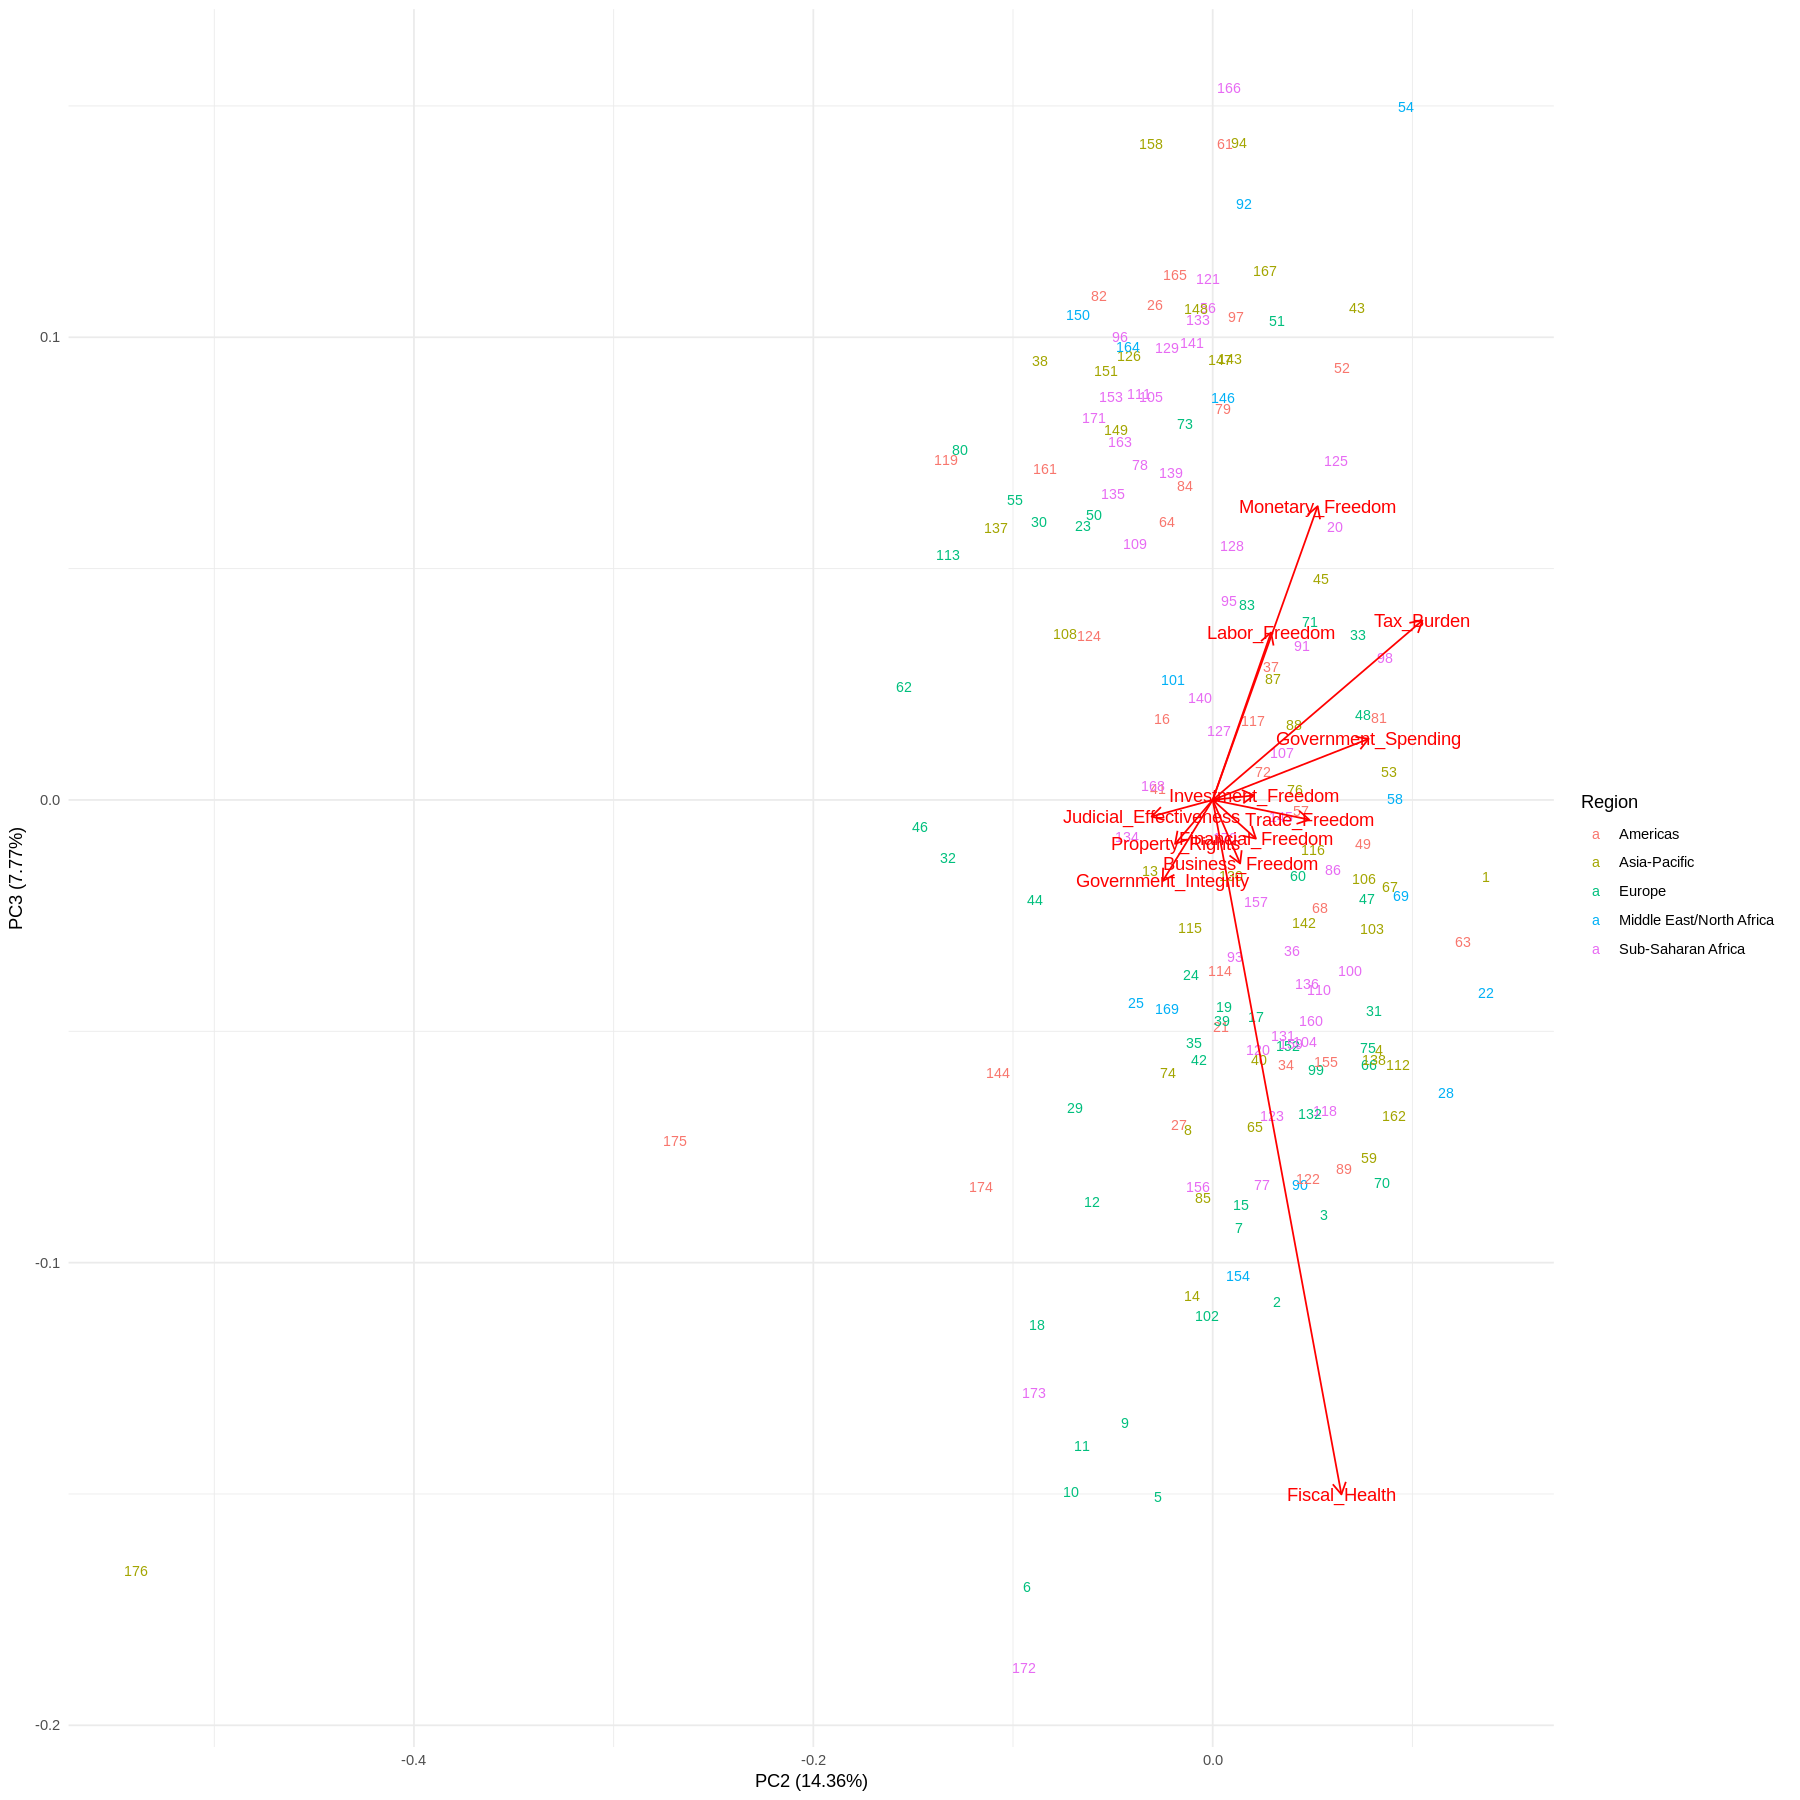

In [ ]:
# Method one of doing the Biplot
options(repr.plot.width = 15, repr.plot.height = 15)  # Adjust width and height of plots
# Biplot PC2 vs PC3
autoplot(pca_result,
                x = 2, y = 3,  # Specify PC2 vs PC3
                data = clean_pillar,
                colour = "Region",  # Color by Region
                label = TRUE,
                label.size = 3,
                shape = FALSE,
                loadings = TRUE,
                loadings.label = TRUE,
                # loadings.label.size = 3,
                title = "PCA Biplot (PC2 vs PC3) by Region") +
  scale_color_discrete(name = "Region") +
  theme_minimal()

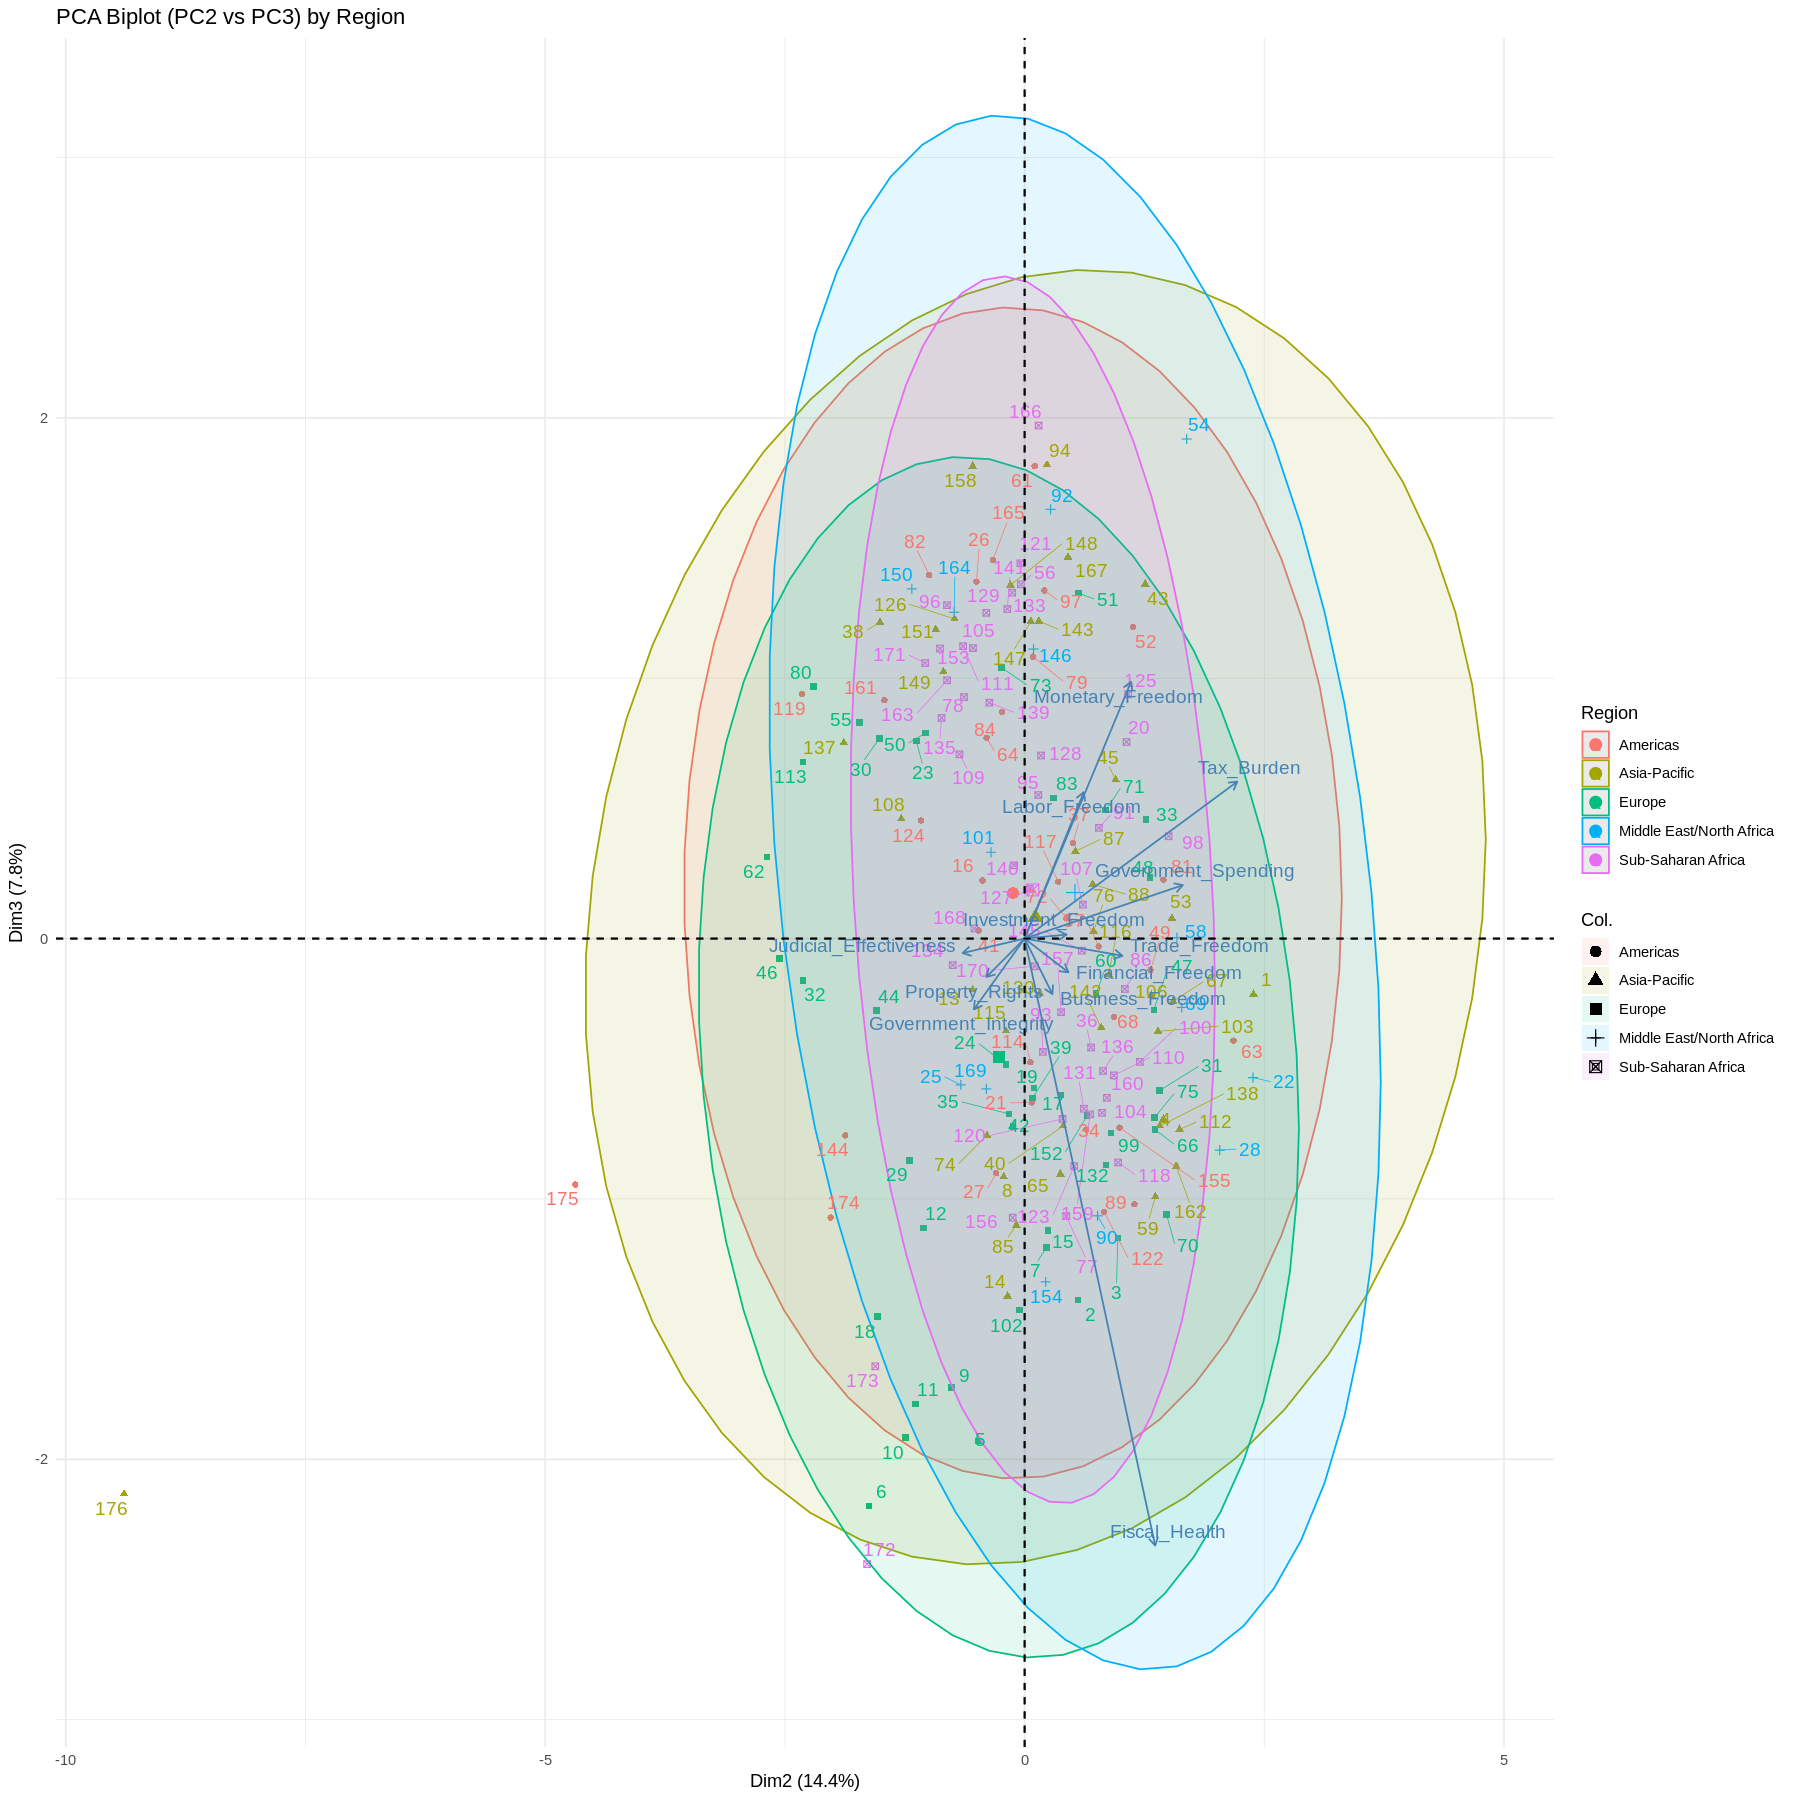

In [ ]:
# Method two of doing the Biplot with ellipse to indicate each region area of concentration
options(repr.plot.width = 15, repr.plot.height = 15)  # Adjust width and height of plots
# Biplot PC2 vs PC3
fviz_pca_biplot(pca_result,
                axes = c(2, 3),
                col.ind = clean_pillar$Region,
                addEllipses = TRUE,
                ellipse.level = 0.95,
                repel = TRUE,
                title = "PCA Biplot (PC2 vs PC3) by Region") +
  scale_color_discrete(name = "Region") +
  theme_minimal()


PC2 explains 14.36% of variability and PC3 explains 7.7% so PC2+PC3 explains
around approximately 22% of variability (which is quite low).

* The PC2 axis seems strongly connected with Fiscal health, and weakly with property rights, Government intergrity, Business freedom, Financial and Trade freedom.

* The PC3 axis seems strongly connected with Judicial effectiveness and to a lesser extent property rights and government intergrity.

**Scree Plot:** The scree plot shows the percentage of variance explained by each principal component. Typically, we look for an "elbow" point where additional components contribute little additional variance. Based on the plot, the first 3-4 PCs appear to capture most of the variance.

**PC1 vs PC2 Biplot:**

PC1 (horizontal axis) seems to represent overall economic freedom, with countries like Singapore, Switzerland, and Ireland on the right (high freedom) and countries like Venezuela and North Korea on the left.

PC2 (vertical axis) appears to differentiate between regulatory efficiency (top) and government size (bottom).

Clear regional patterns emerge, with European and Asia-Pacific countries generally scoring higher on economic freedom.

**Variable Contributions:**

Property rights, judicial effectiveness, and business freedom contribute strongly to PC1.

Government spending and tax burden contribute strongly to PC2.

Investment freedom and financial freedom contribute to PC3.

**PC2 vs PC3 Biplot:**

PC3 seems to differentiate between open markets (trade, investment, financial freedom) versus other aspects of economic freedom.

Some countries show unique patterns when viewed on these axes, suggesting they have distinctive economic freedom profiles.

Warning message:
“ggrepel: 68 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


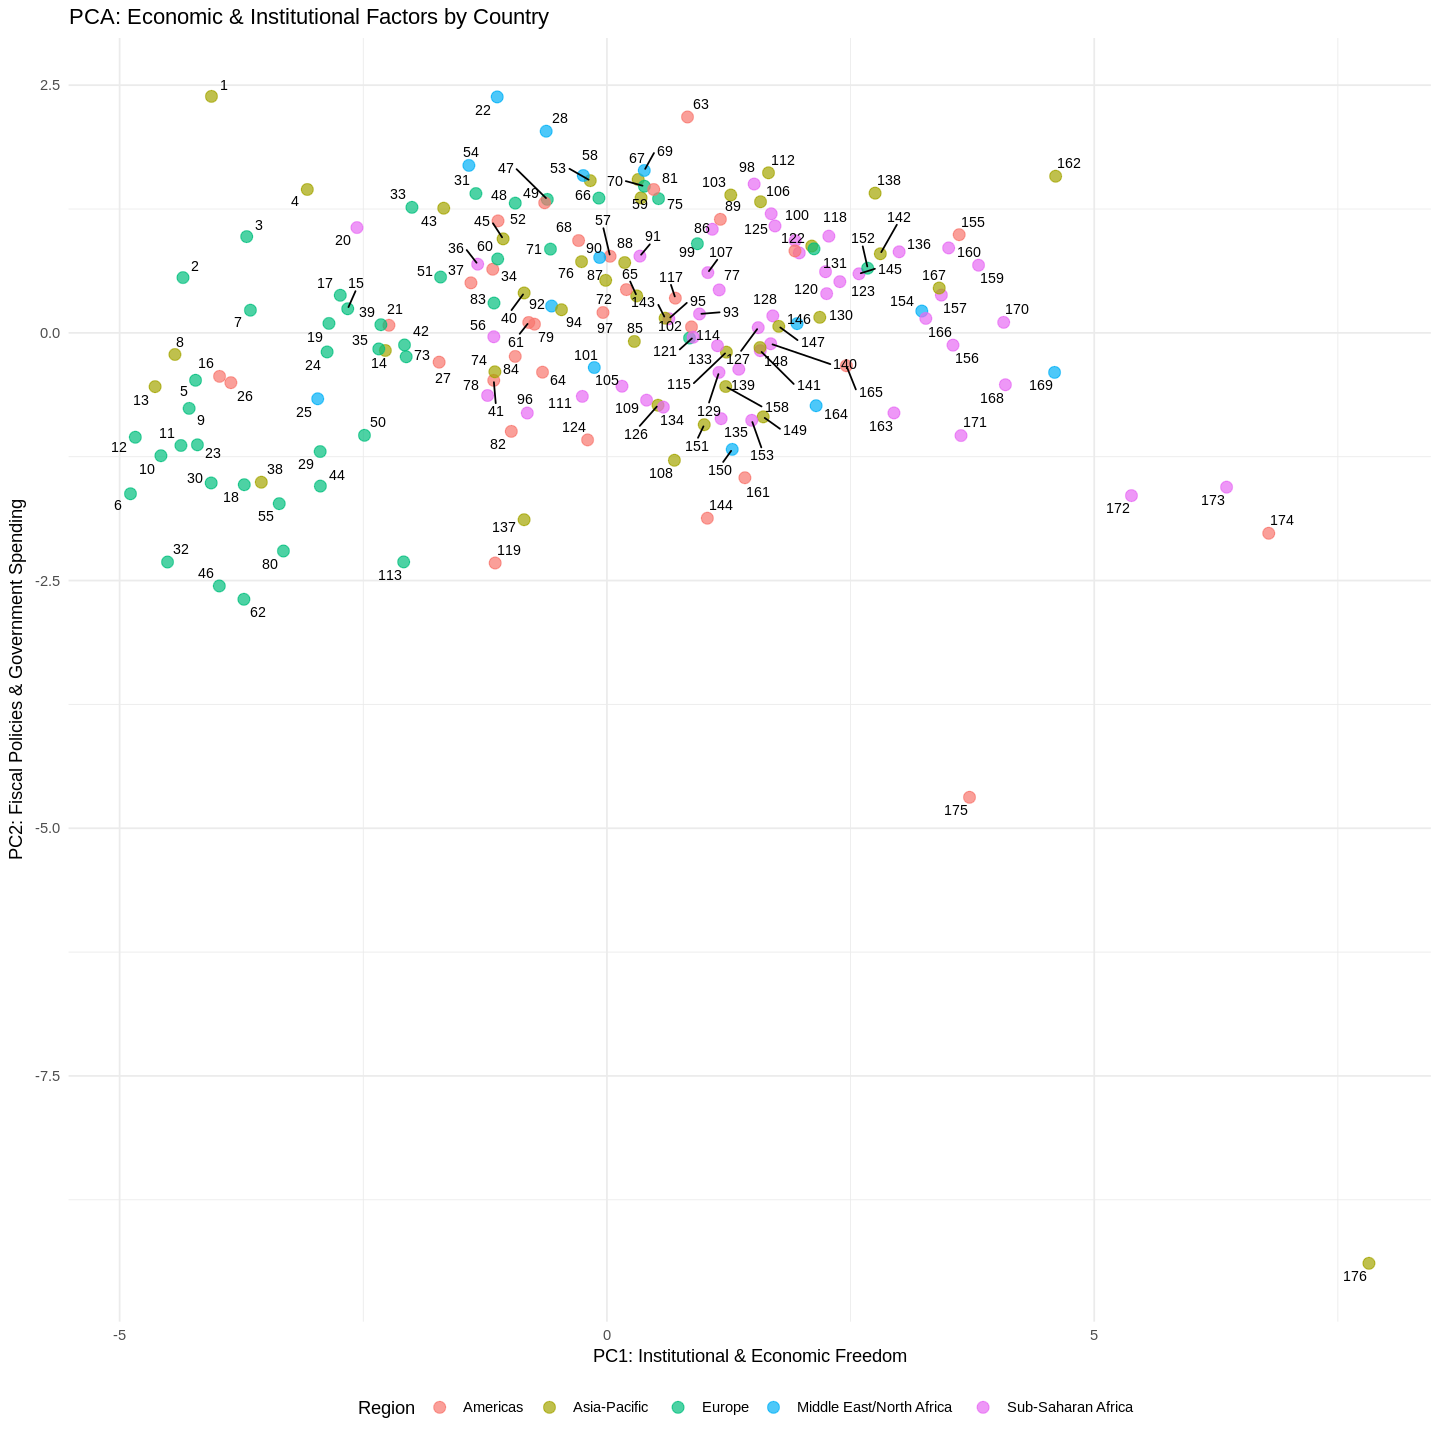

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 12)  # Adjust width and height of plots
# Convert PCA results into a dataframe
pca_data = as.data.frame(pca_result$x)
pca_data$Country = rownames(pca_data)  # Ensure country names are stored

# Create scatterplot of PC1 vs PC2
ggplot(pca_data, aes(x = PC1, y = PC2, label = Country)) +
  geom_point(aes(color = clean_pillar$Region), size = 3, alpha = 0.7) +  # Color by region
  geom_text_repel(size = 3) +
  labs(title = "PCA: Economic & Institutional Factors by Country",
       x = "PC1: Institutional & Economic Freedom",
       y = "PC2: Fiscal Policies & Government Spending",
       color = "Region") +
  theme_minimal() +
  theme(legend.position = "bottom")


### **Interpretation of the PC1 vs PC2 Scatterplot**
This **PCA scatterplot** maps countries based on **institutional factors (PC1) and fiscal policies (PC2)**.

#### **General Distribution of Countries**
- The majority of countries are **clustered near the center**, indicating that most economies have **moderate institutional and fiscal scores**.
- Some countries are **widely spread** along the PC1 and PC2 axes, showing strong differences in economic policies.

#### **Quadrant-wise Analysis**
- **Top-right Quadrant (High PC1, High PC2)**
  - Countries here have **strong institutional frameworks (high PC1)** and **fiscally responsible policies (high PC2)**.
  - Likely to be **economically strong with high business freedom, property rights, and low government spending**.
  - Example regions: **Some European & North American countries.**

- **Top-left Quadrant (Low PC1, High PC2)**
  - These countries have **weak institutions** but **better fiscal health**.
  - Might indicate **low corruption and controlled government spending but challenges in rule of law, property rights, or business freedom**.
  - Example regions: **Some Asian and Sub-Saharan African countries.**

- **Bottom-right Quadrant (High PC1, Low PC2)**
  - Countries with **strong institutions** but **poor fiscal policies** (high government spending, debt, or taxation issues).
  - Might have **good governance but struggling with financial stability**.
  - Example regions: **Some Latin American and European economies.**

- **Bottom-left Quadrant (Low PC1, Low PC2)**
  - **Weak institutions + Poor fiscal health**.
  - These countries may experience **economic instability, high corruption, inefficient governance, and financial mismanagement**.
  - Example regions: **Some Sub-Saharan African and Middle Eastern countries.**


- The warning **"ggrepel: 68 unlabeled data points (too many overlaps)"** indicates that **many countries have similar PC1 & PC2 scores**, making their labels difficult to display.
- This suggests that many economies **share similar policies**, especially in the mid-range.

#### **Outliers (Points Far from the Center)**
- Countries like **point 176 (bottom-right) and 162 (top-right)** are outliers.
- **Point 176:** Likely a country with **very weak fiscal policies but strong institutions**.
- **Point 162:** Could be a nation with **excellent economic freedom and fiscal discipline**.


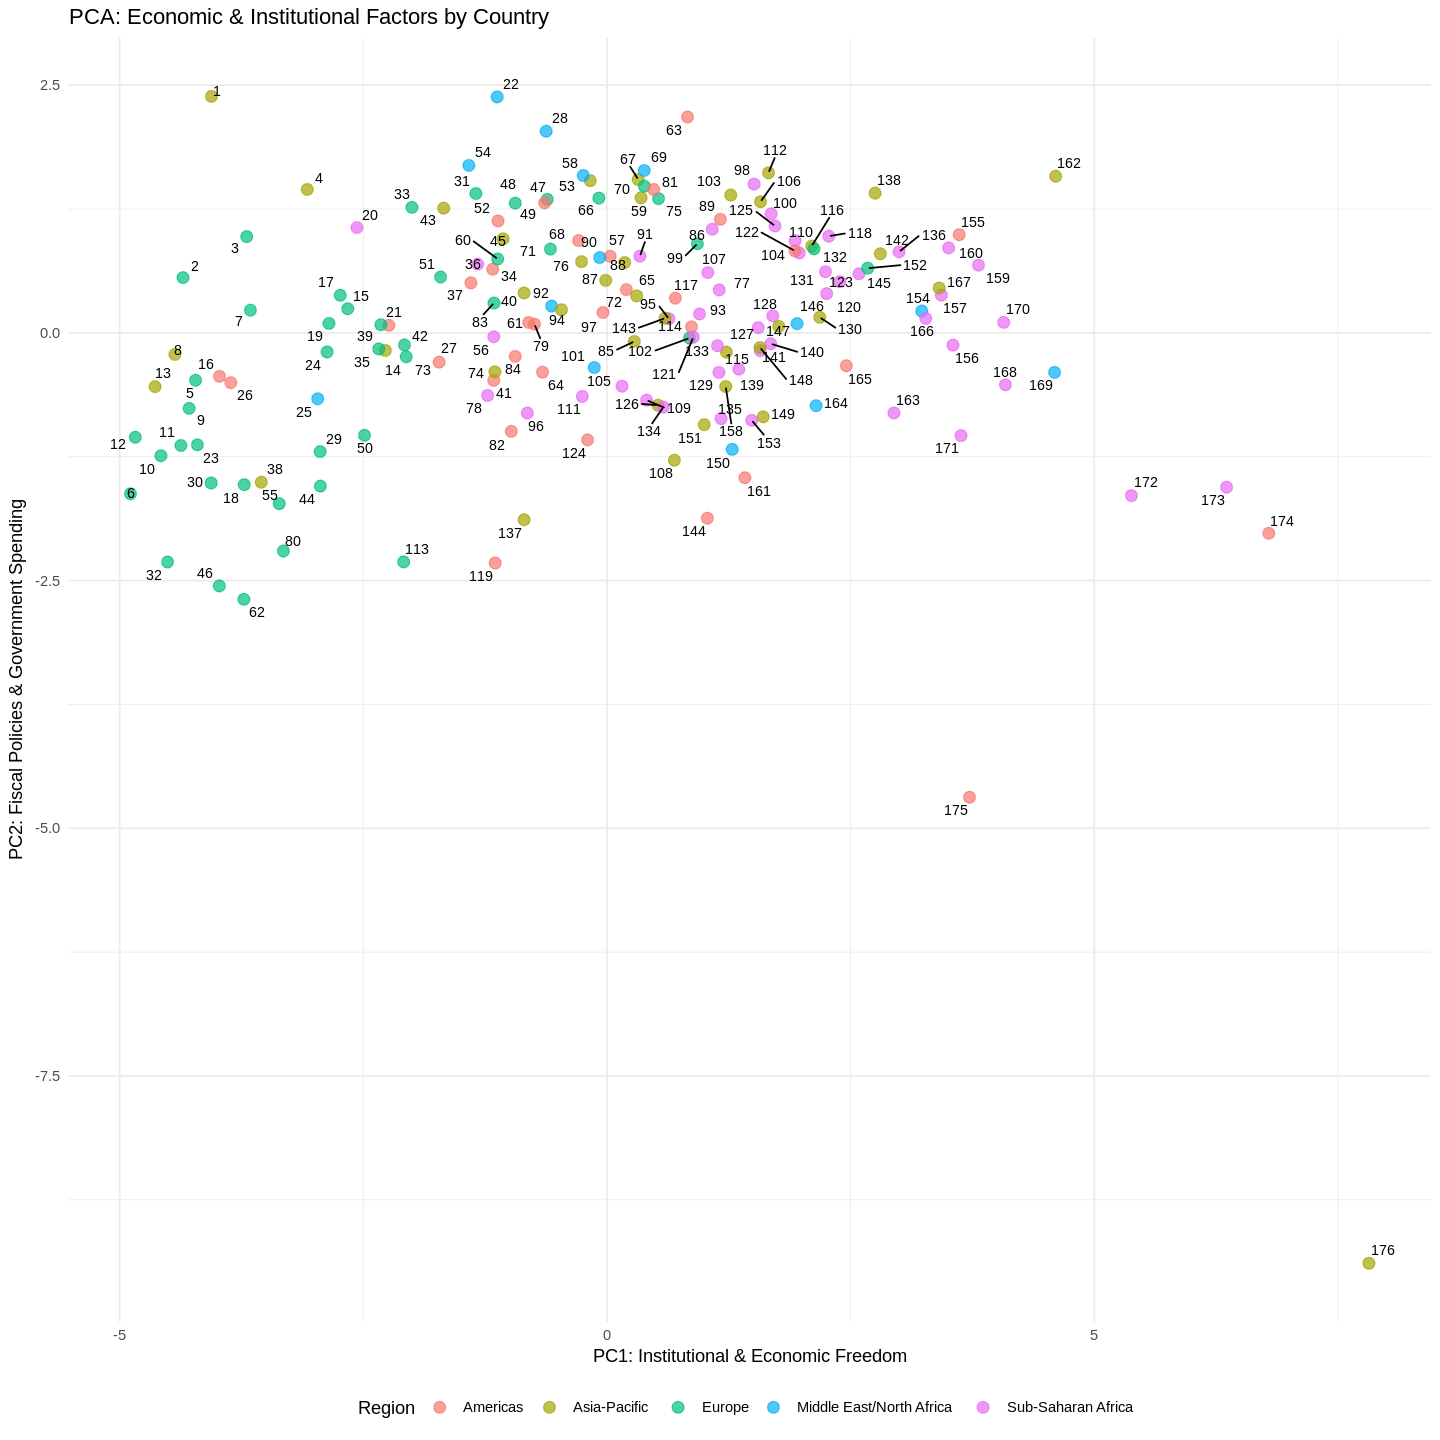

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 12)  # Adjust width and height of plots
#fixed the overlap issues
ggplot(pca_data, aes(x = PC1, y = PC2, label = Country)) +
  geom_point(aes(color = clean_pillar$Region), size = 3, alpha = 0.7) +  # Color by region
  geom_text_repel(size = 3, max.overlaps = 26) +  # Add labels without overlap
  labs(title = "PCA: Economic & Institutional Factors by Country",
       x = "PC1: Institutional & Economic Freedom",
       y = "PC2: Fiscal Policies & Government Spending",
       color = "Region") +
  theme_minimal() +
  theme(legend.position = "bottom")

**Loadings Plot**

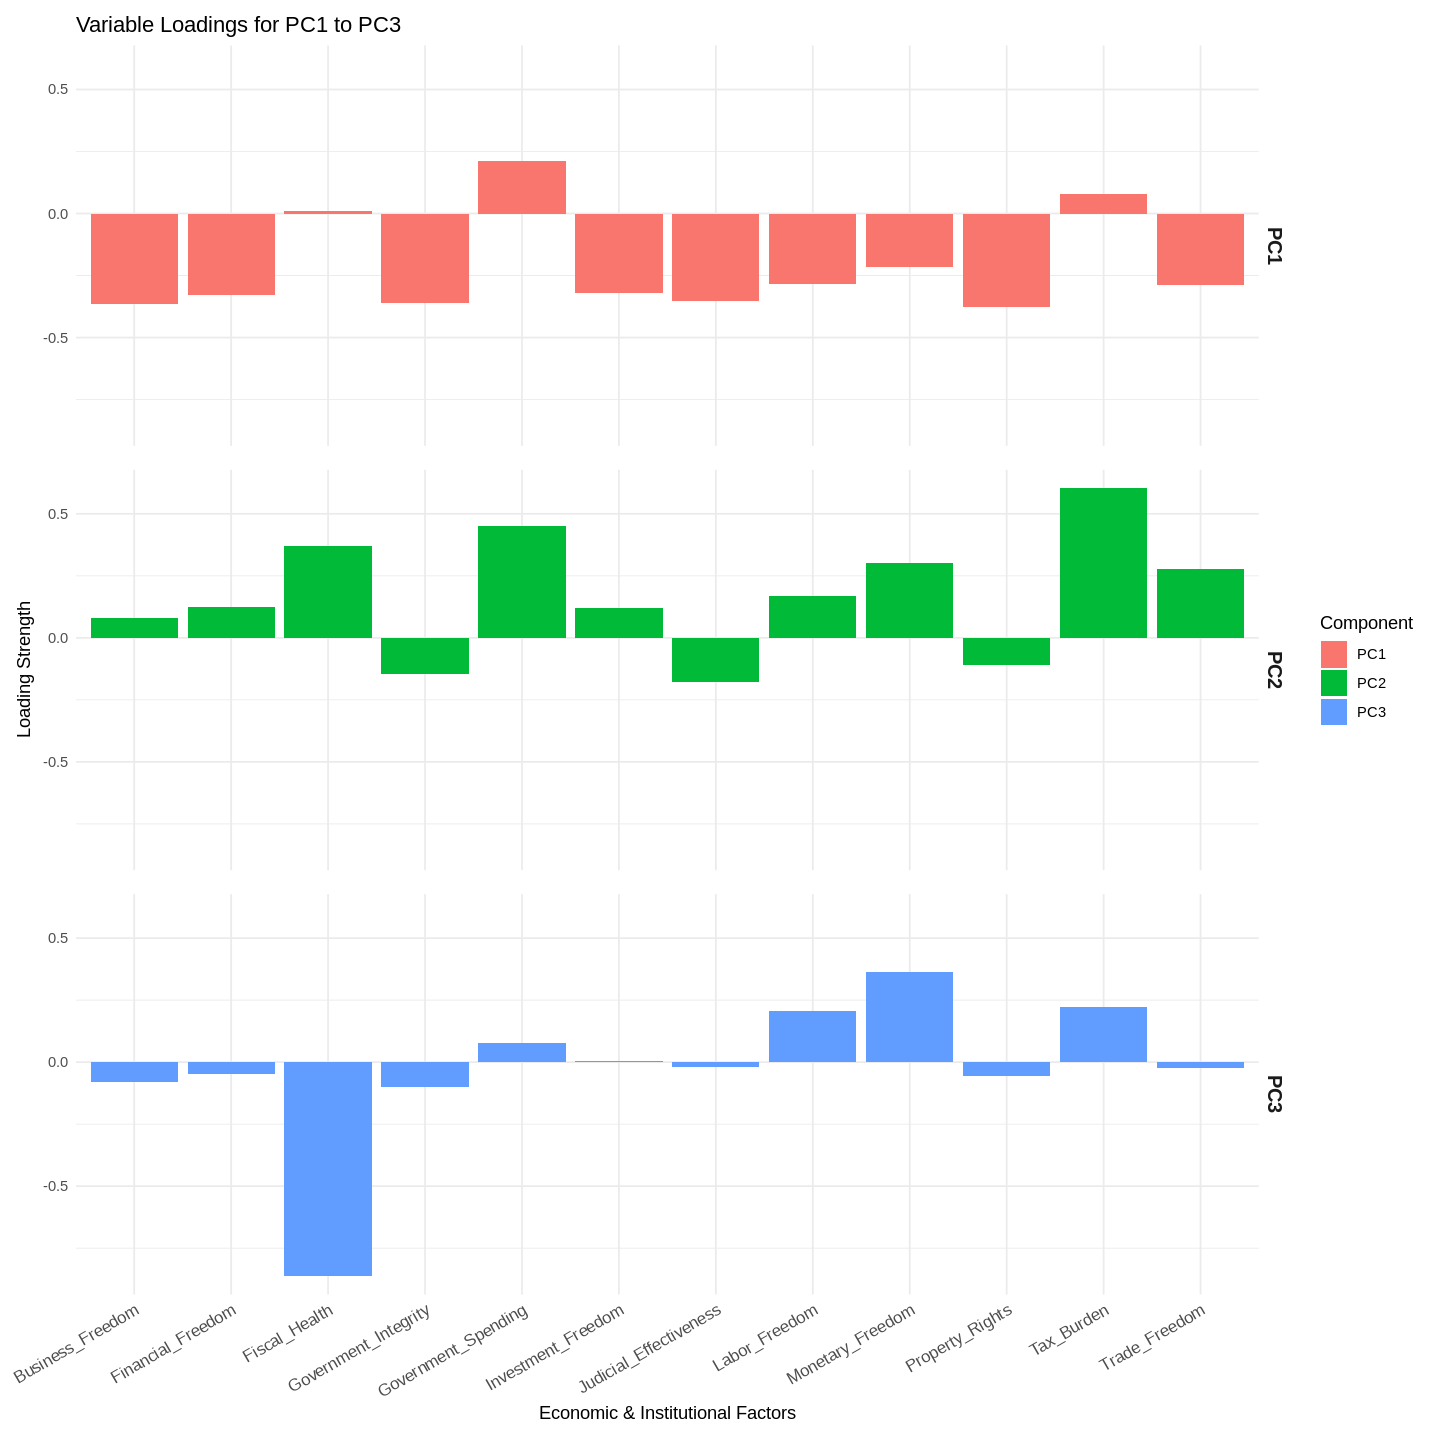

In [ ]:
# Extract loadings (rotation matrix)
loadings_df = as.data.frame(pca_result$rotation[, 1:3])  # Loadings for PC1, PC2, and PC3
loadings_df$Symbol = rownames(loadings_df)  # Add variable names

# Convert to long format for ggplot
loadings_long = gather(loadings_df, key='Component', value='Weight', -Symbol)

# Plot the loadings
ggplot(loadings_long, aes(x = Symbol, y = Weight, fill = `Component`)) +
  geom_bar(stat = "identity") +
  facet_grid(Component~.) +
  labs(title = "Variable Loadings for PC1 to PC3",
       x = "Economic & Institutional Factors",
       y = "Loading Strength") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 10, angle = 30, hjust = 1),  # Slight angle for readability
    strip.text = element_text(size = 12, face = "bold"),  # Emphasize facet labels
    panel.spacing = unit(1, "lines"),  # Adds space between facets
    plot.margin = margin(10, 10, 10, 10)  # Expands plot margins
  )


Loadings plot with total PCA for each pillar

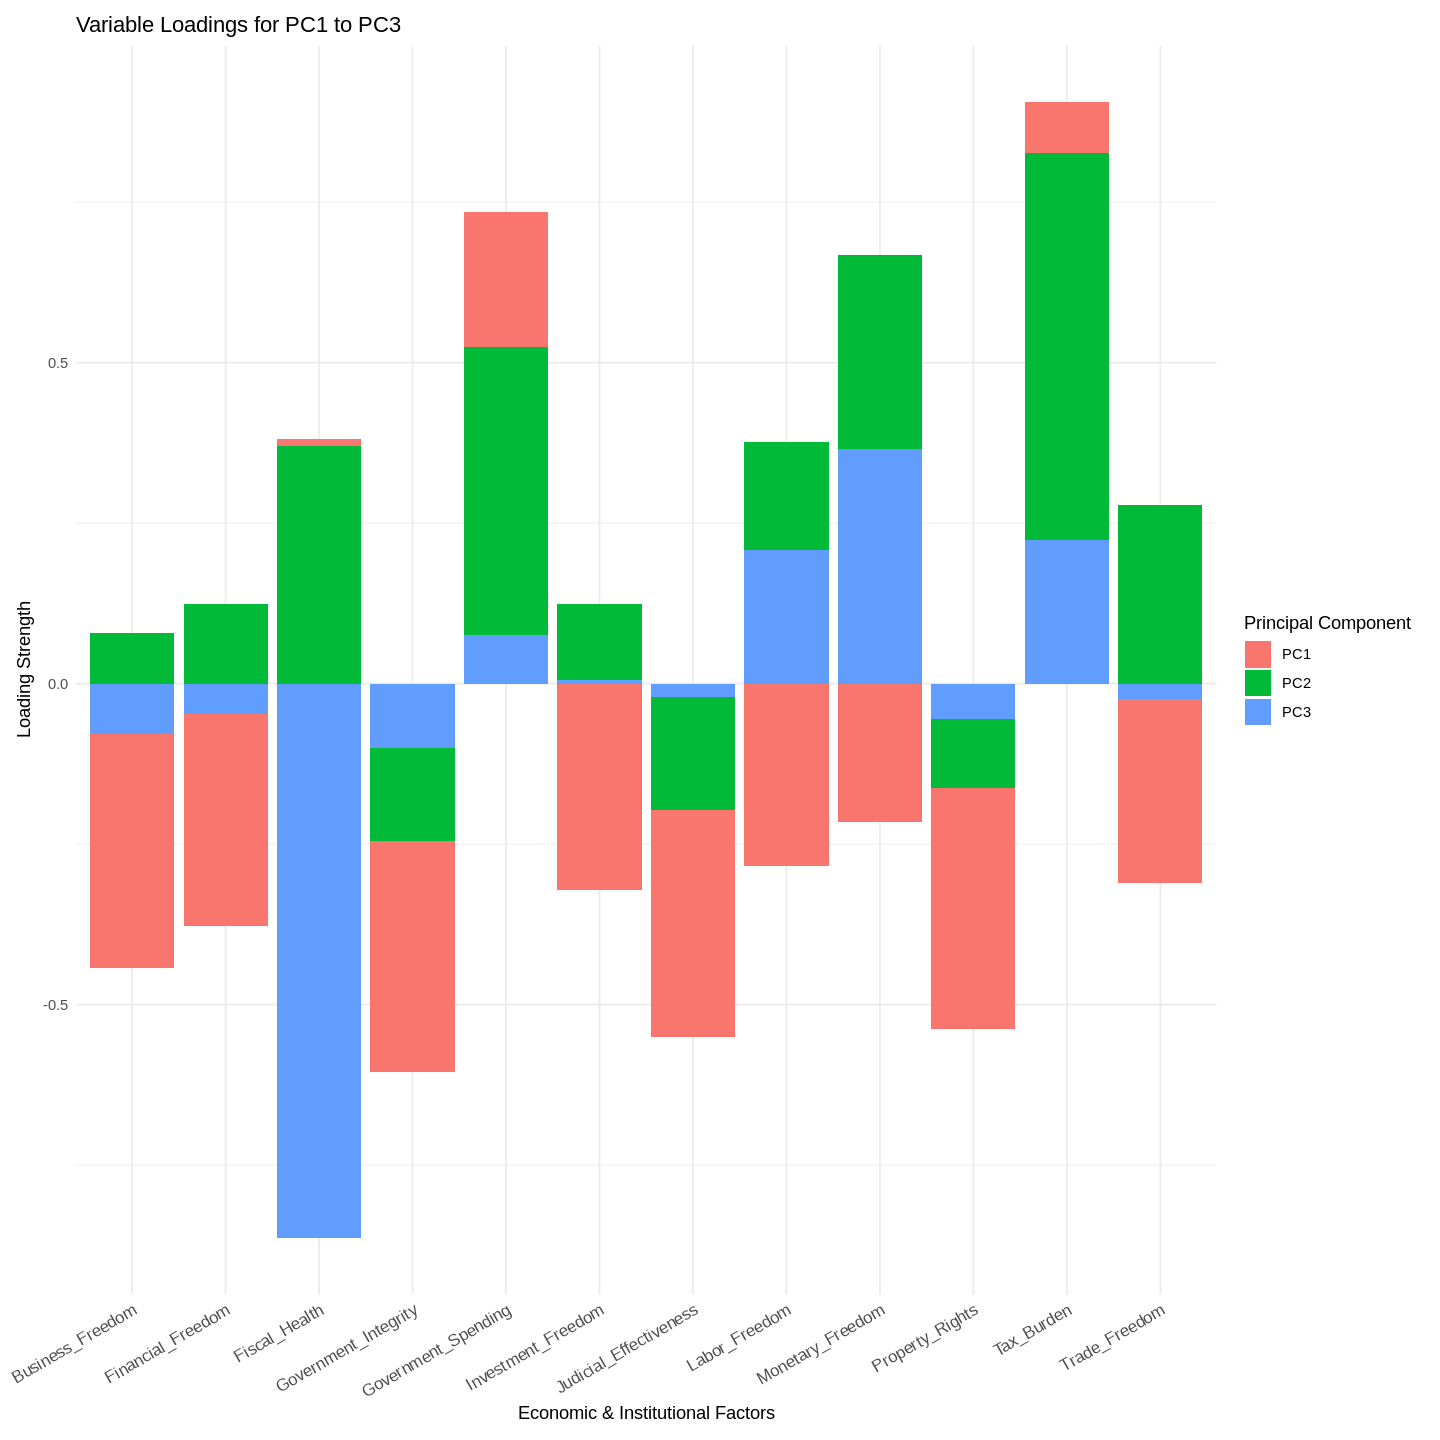

In [ ]:
# Extract loadings (rotation matrix)
loadings_df = as.data.frame(pca_result$rotation[, 1:3])  # Loadings for PC1, PC2, and PC3
loadings_df$Variable = rownames(loadings_df)  # Add variable names

loadings_long = gather(loadings_df, key='Principal Component', value='Loading', -Variable)


# Plot the loadings
ggplot(loadings_long, aes(x = Variable, y = Loading, fill = `Principal Component`)) +
  geom_bar(stat = "identity") +
  labs(title = "Variable Loadings for PC1 to PC3",
       x = "Economic & Institutional Factors",
       y = "Loading Strength") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 10, angle = 30, hjust = 1),  # Slight angle for readability
    strip.text = element_text(size = 12, face = "bold"),  # Emphasize facet labels
    panel.spacing = unit(1, "lines"),  # Adds space between facets
    plot.margin = margin(10, 10, 10, 10)  # Expands plot margins
  )


In [ ]:
# PCA variance explained (standard code template)
variance_new = (pca_result$sdev)^2
variance_explained = variance_new/sum(variance_new)
variance_explained


[1] 0.521546102 0.143647312 0.077688012 0.055324608 0.051411020 0.046278065
 [7] 0.035265320 0.027268074 0.015639562 0.011500051 0.008472596 0.005959280

Conclusions:
* PC1, PC2, PC3 together explain 52.15+14.36+7.76=74.27% of the variability which is ok.
* PC1 axis is moderately negatively correlated to Business Freedom, Financial Freedom, Government Intergrity, Investment Freedom, Judicial Effectiveness and Property Rights (which show a very low amount of economic freedom that needs to be improved on).
* PC2 axis is positively strongly correlated with Tax Burden and moderately correlated with Government Spending and Fiscal Health (which show low amount of economic freedom).
* PC3 axis is strongly negatively correlated with Fiscal Health and moderately positively correlated with Monetary Freedom (which shows the likelihood of excessive borrowing or debt crises and likelihood of currency stability and fair pricing).

Combining PC1, PC2 and PC3 together we see that few pillars are having positive correlation and the others have negative correlation. Also it shows through the combined plot that pillars that would improve Economic freedom tend to be more negatively correlated (with Labor Freedom and Trade Freedom being slightly balanced between being negatively correlated and positively correlated), whilst pillars that would show poor level of economic freedom are more positively correlated (Like Government spending and Tax burden), this shows that level of Economic Freedom in most regions tend to be low generally.


## **Relevance of PCA Results**

### **PC1 and PC2 Explain 66% of Variability (A Strong Model)**
- Since **PC1 + PC2 account for ~66%** of the total variability, these two components **capture most of the key differences** among observations.
- **Why is this important?**  
  - A higher percentage means PCA is effective in reducing dimensionality while keeping essential information.  
  - Since 66% is a **good proportion**, using only PC1 and PC2 for visualization **does not lead to a major information loss**.  
  - However, **34% of variance is unexplained**, meaning there are still other latent factors at play.

### **Interpretation of PC1 (14.36%)**
- **PC1 is mainly driven by**:
  - **Property rights**
  - **Business freedom**
  - **Government integrity**
  - **Judicial effectiveness**
  - **Financial freedom**  
- These **strongly correlate** and likely form an **economic/legal institutional axis**.  
- **Implication**:  
  - Countries/regions with **higher PC1 scores** likely have **strong institutions, rule of law, and economic freedom**.  
  - Countries **on the negative PC1 side** may struggle with **corruption, weak financial systems, and weaker business environments**.

### **Interpretation of PC2 (52.15%)**
- **PC2 is dominated by**:
  - **Fiscal health**
  - **Tax burden**
  - **Government spending**  
- These variables **mainly relate to economic policy & government intervention**.  
- **Implication**:  
  - Countries with **high PC2 scores** likely have **better fiscal health, lower tax burdens, and controlled government spending**.  
  - **Negative PC2 scores** may indicate **high debt, inefficient spending, or high taxation**.  

### **PC2 vs PC3 Explains 22% (Weaker but Insightful)**
- Since **PC2 + PC3 only explain 22%**, they capture secondary trends.
- **PC2 still strongly correlates with Fiscal health** but now has weaker associations with:
  - Property rights, Government integrity, Business freedom, Financial freedom, and Trade freedom.  
- **PC3 is linked to Judicial effectiveness**, indicating legal factors play a role beyond just economic freedom.  

### **Practical Use of This Analysis**
- **Identifying Economic Profiles**:  
  - **Countries in the top-right of PC1 vs PC2 biplot** = Strong institutions + Low tax burden = Likely stable, business-friendly economies.  
  - **Bottom-left regions** = Weak institutions + High tax burden = Economically challenging environments.  
- **Policymaking & Strategy**:  
  - Countries aiming to improve economic growth should **strengthen property rights and reduce corruption (PC1 factors)**.  
  - **Reducing government spending and optimizing tax policies (PC2 factors)** can also drive economic stability.  
- **Further Investigation**:  
  - Since **PC1 + PC2 + PC3 only explain 73% total variability**, additional factors **outside PCA's scope** (e.g., social/cultural aspects) may still be relevant.  

#### Removing Outliers using `boxplot`: *this shows how well the PCA would erform with outliers removed*

No id variables; using all as measure variables



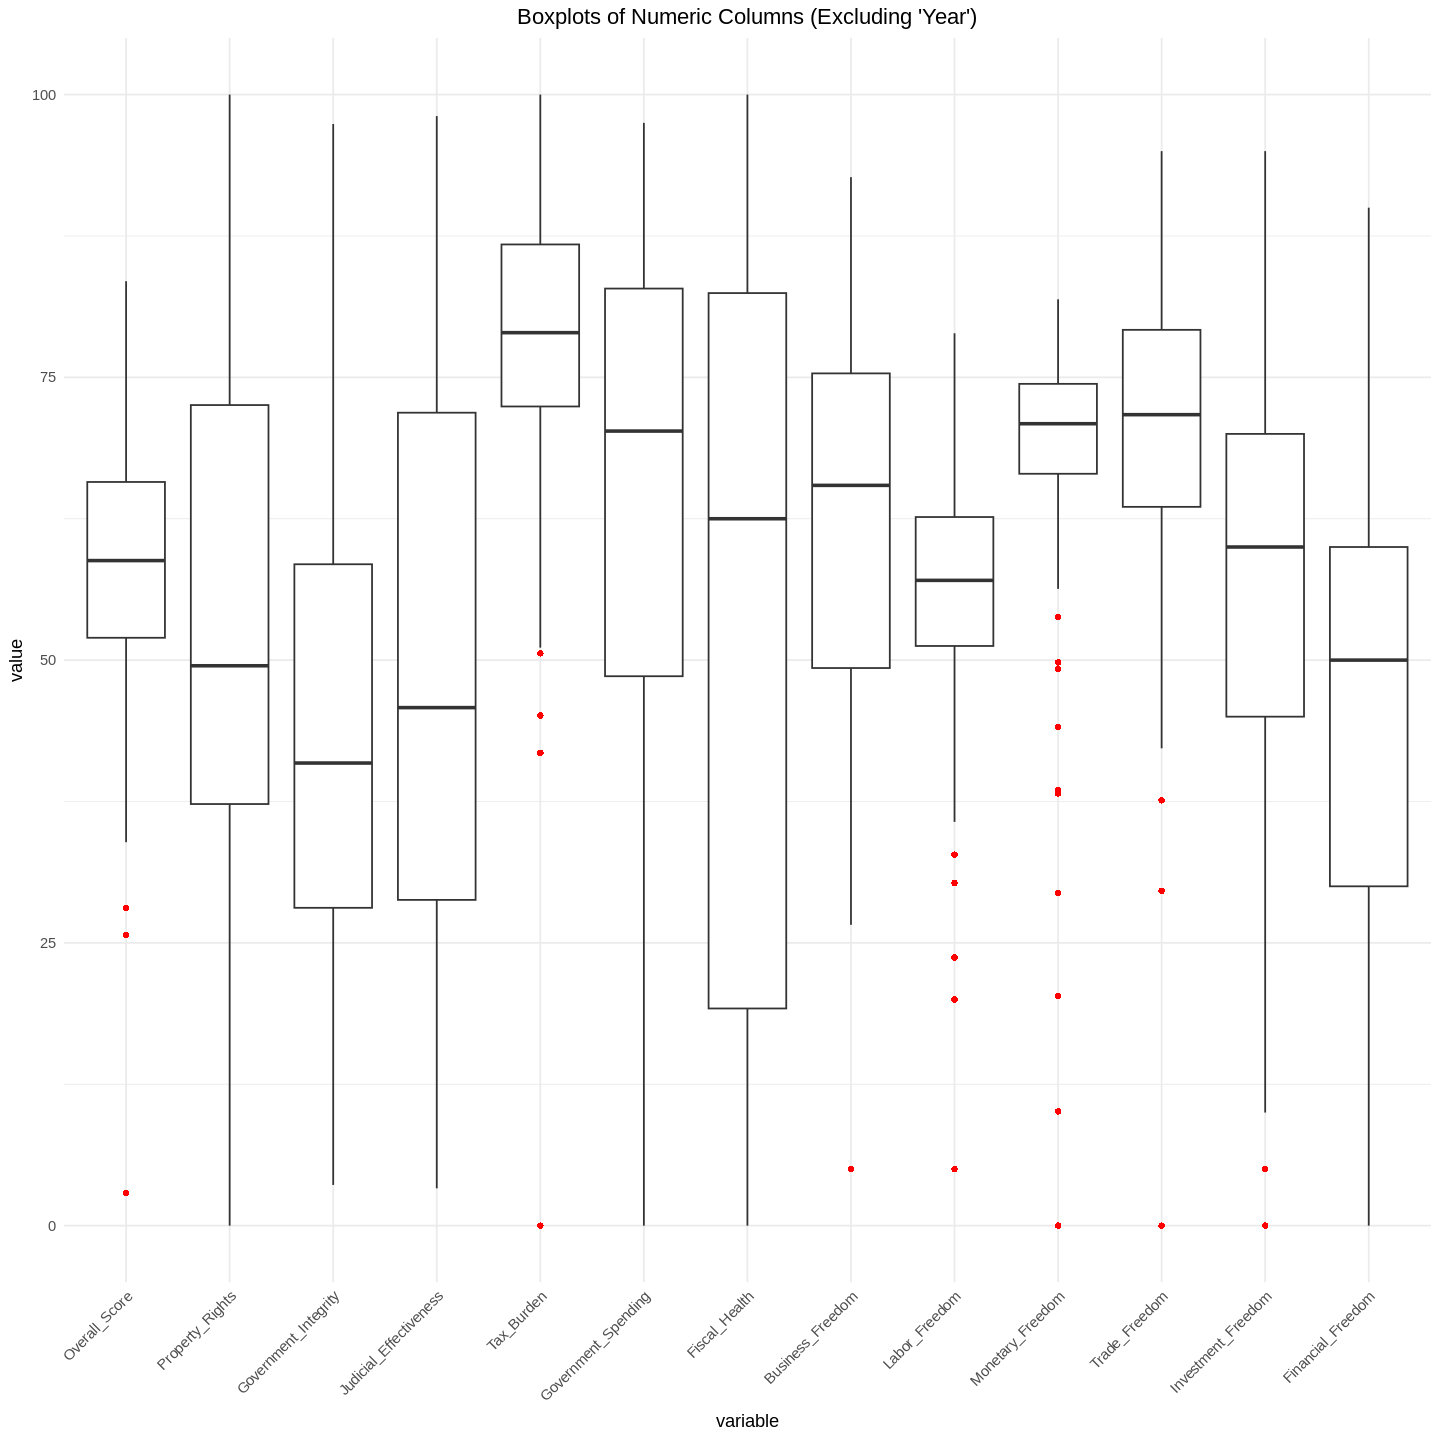

In [ ]:
# Identify numeric columns, excluding "Year"
numeric_cols = sapply(data, is.numeric)
cleaned_data_numeric = data[, numeric_cols]

# Ensure "Year" exists before excluding it
if ("Year" %in% colnames(cleaned_data_numeric)) {
  cleaned_data_numeric = cleaned_data_numeric[, colnames(cleaned_data_numeric) != "Year"]
}

# Check for empty numeric data after exclusion
if (ncol(cleaned_data_numeric) == 0) {
  stop("No numeric columns left after removing 'Year'.")
}

# Melt data for easy plotting
melted_data = melt(cleaned_data_numeric)

# Create boxplots for all numeric columns except "Year"
ggplot(melted_data, aes(x = variable, y = value)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 16) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5)
  ) +
  ggtitle("Boxplots of Numeric Columns (Excluding 'Year')")


In [ ]:
# Function to detect outliers using IQR
detect_outliers = function(x) {
  q1 = quantile(x, 0.25, na.rm = TRUE)
  q3 = quantile(x, 0.75, na.rm = TRUE)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return(x < lower_bound | x > upper_bound)
}

# Apply outlier detection across all numeric columns
outlier_matrix = sapply(cleaned_data_numeric, detect_outliers)

# Identify rows that have any outlier
rows_to_remove = apply(outlier_matrix, 1, any)

# Remove entire rows that contain any outlier
cleaned_data_numeric_no_outliers = cleaned_data_numeric[!rows_to_remove, ]


In [ ]:
View(rows_to_remove)

In [ ]:
sapply(lapply(cleaned_data_numeric_no_outliers, remove_outliers), length)


Overall_Score        Property_Rights   Government_Integrity 
                   155                    155                    155 
Judicial_Effectiveness             Tax_Burden    Government_Spending 
                   155                    154                    155 
         Fiscal_Health       Business_Freedom          Labor_Freedom 
                   155                    155                    155 
      Monetary_Freedom          Trade_Freedom     Investment_Freedom 
                   154                    155                    152 
     Financial_Freedom 
                   155

No id variables; using all as measure variables



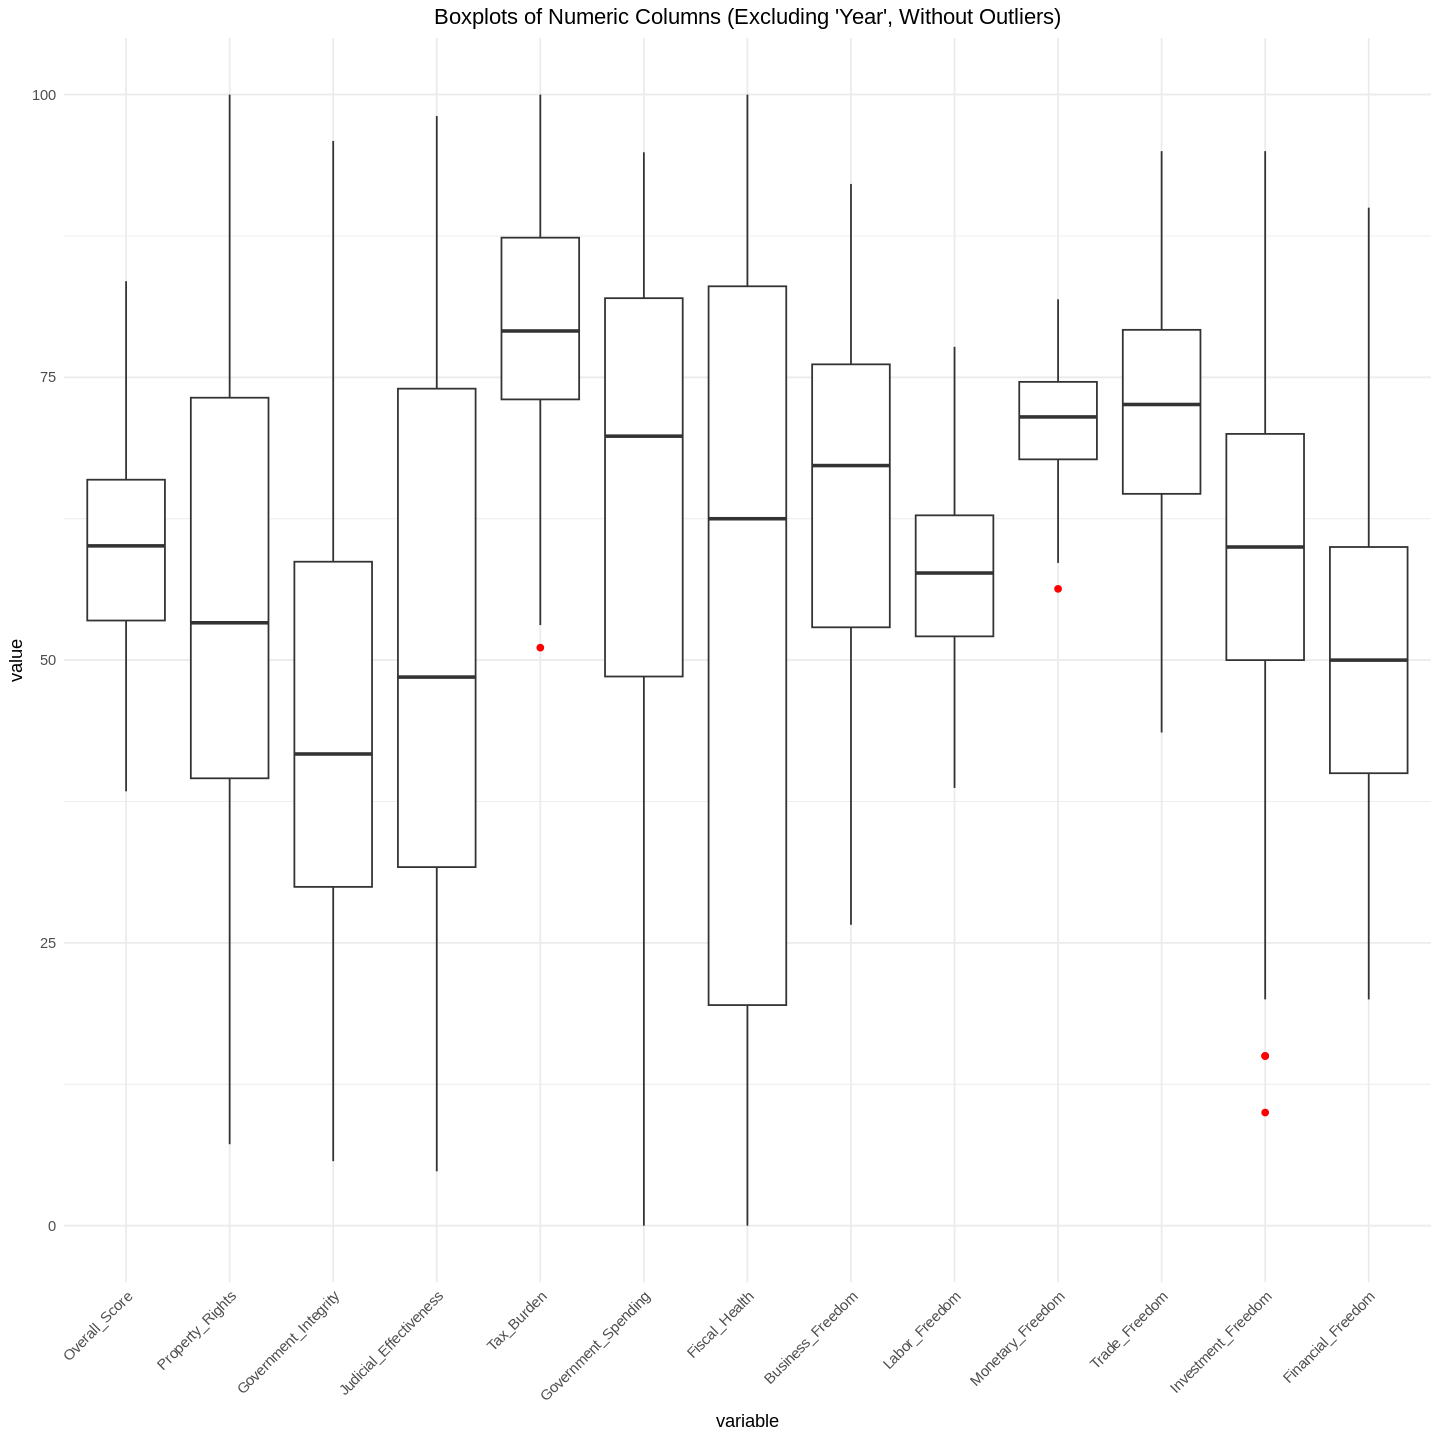

In [ ]:
# Melt data for easy plotting
melted_data = melt(cleaned_data_numeric_no_outliers)

# Create boxplots without outliers
ggplot(melted_data, aes(x = variable, y = value)) +
  geom_boxplot(outlier.colour = "red") +  # No need to specify outlier color since they're removed
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5)
  ) +
  ggtitle("Boxplots of Numeric Columns (Excluding 'Year', Without Outliers)")

In [ ]:
pillar_vars_filtered = select(cleaned_data_numeric_no_outliers, -c(Overall_Score))
str(pillar_vars_filtered)

tibble [155 × 12] (S3: tbl_df/tbl/data.frame)
 $ Property_Rights       : num [1:155] 94.2 94.2 93.5 82.2 96.9 92.8 87.4 98.8 95.6 100 ...
 $ Government_Integrity  : num [1:155] 88.3 91.3 83.4 73.4 84.9 81.2 95.9 95.6 87.8 94.2 ...
 $ Judicial_Effectiveness: num [1:155] 58.3 98.1 94.3 94 95.8 93.4 93.2 96.7 96.2 97.6 ...
 $ Tax_Burden            : num [1:155] 90.7 70.4 78 79.2 64.6 80.8 65.5 61.7 53.1 67.8 ...
 $ Government_Spending   : num [1:155] 89.2 64.6 82.4 90.5 40.6 46.8 46.3 32.1 37.1 8.2 ...
 $ Fiscal_Health         : num [1:155] 76 95.7 91.7 90.3 97.6 85.4 72.4 97.2 88.1 74.3 ...
 $ Business_Freedom      : num [1:155] 86.9 89.3 91.3 84.9 89.5 83.2 88.3 87.2 88.6 88.8 ...
 $ Labor_Freedom         : num [1:155] 77.3 60.7 62.8 69.1 57.7 64.2 70.3 69.4 60.5 65.5 ...
 $ Monetary_Freedom      : num [1:155] 76.3 80.8 74.5 80.1 69.1 66.2 74.6 71.1 71.5 75.4 ...
 $ Trade_Freedom         : num [1:155] 95 86.4 79.2 86.4 79.2 79.2 89.8 84.8 79.2 79.2 ...
 $ Investment_Freedom    : num [1:

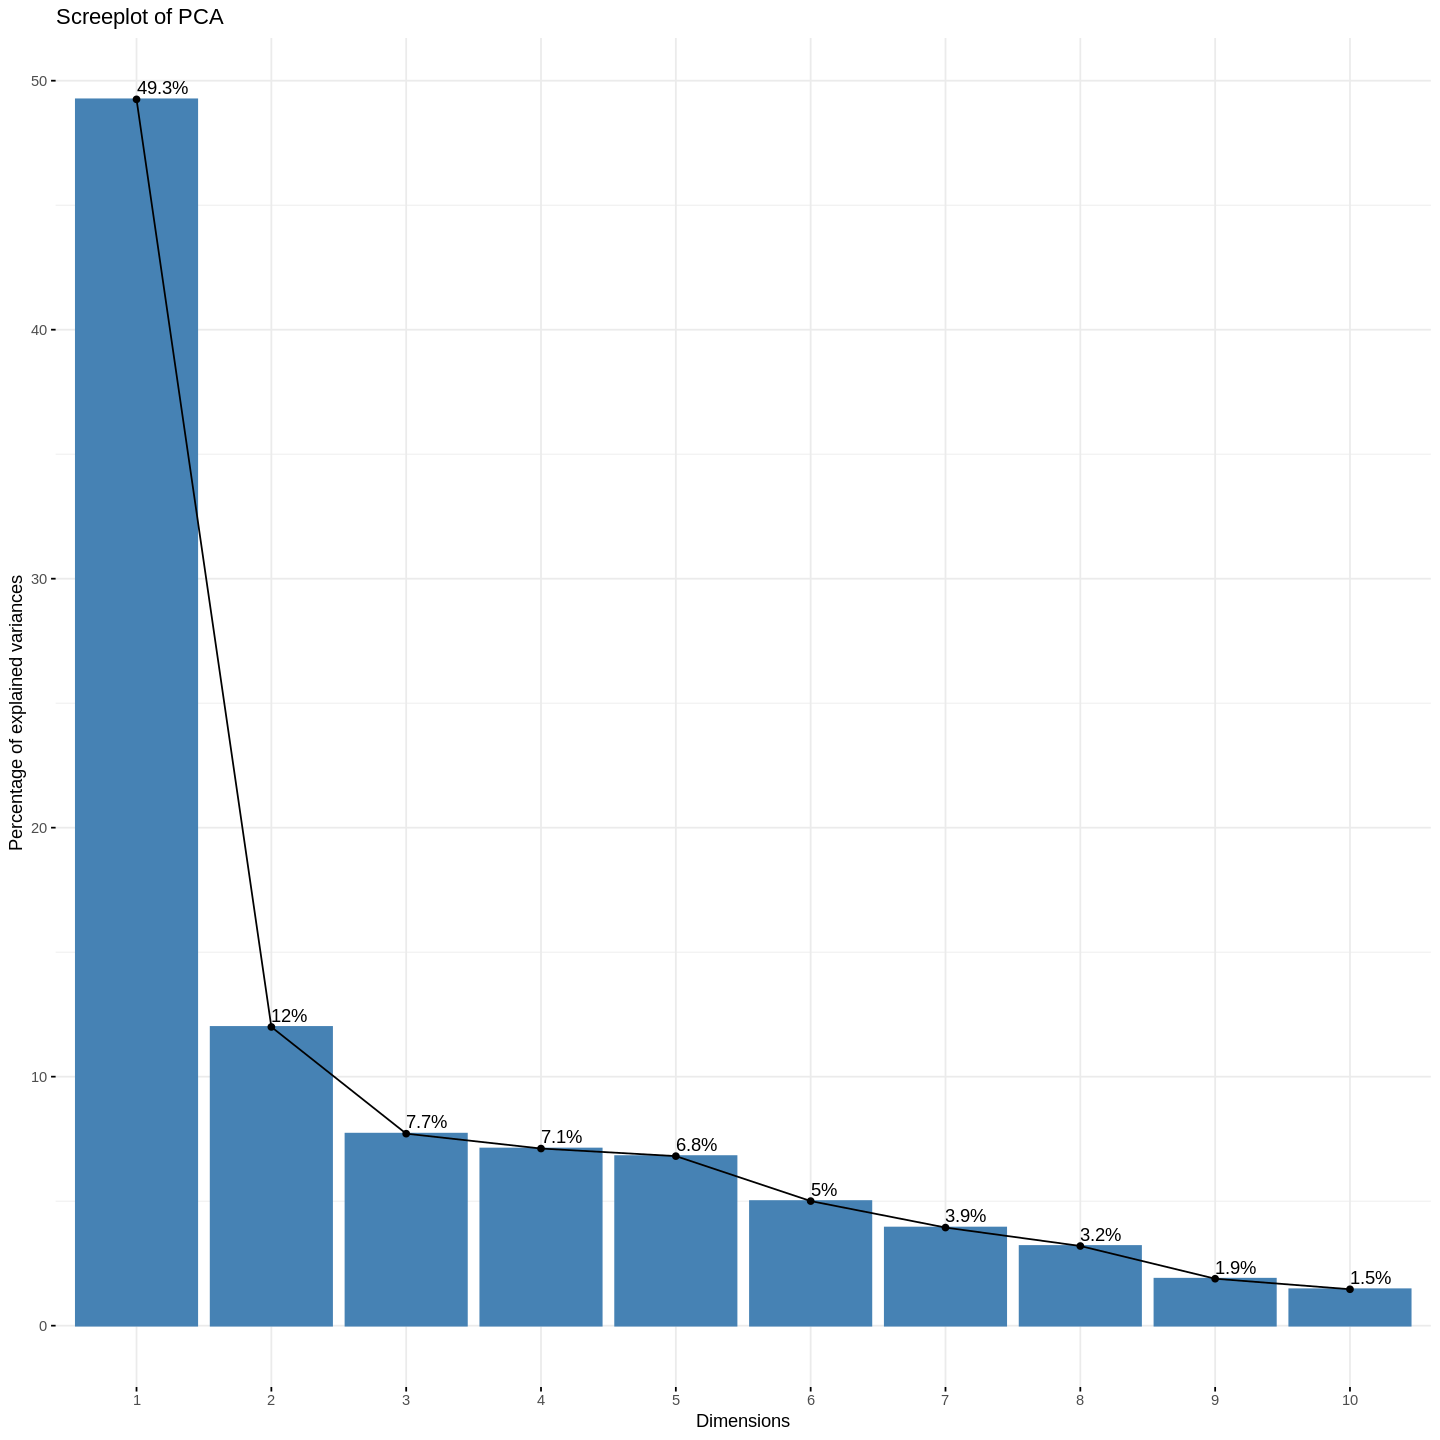

In [ ]:
# Perform PCA without scaling (since all variables are percentages)
pca_results_2 = prcomp(pillar_vars_filtered, scale.=TRUE)

# Screeplot
library(factoextra)
fviz_eig(pca_results_2, addlabels = TRUE, main = "Screeplot of PCA")

In [ ]:
# PCA variance explained (standard code template)
variance_new = (pca_results_2$sdev)^2
variance_explained = variance_new/sum(variance_new)
variance_explained

[1] 0.492509426 0.119966435 0.077105018 0.071132707 0.068089933 0.050034519
 [7] 0.039393821 0.031990871 0.018849388 0.014616608 0.009556789 0.006754486


PC1, PC2, PC3 together explain `49.3% + 12% + 7.7% = 69%` of the variability which is ok but it shows about 5% less than when the outliers were present. but from the Scree plot we see that after PC3 thet PC values improved after outlier was removed, thus checking when there was outliers the first five PCs = `52.2 + 14.4 + 7.8 + 5.5 + 5.1 = 85%` and when outliers are removed the first five PCs = `49.3 + 12 + 7.7 + 7.1 + 6.8 = 32.9%`. And this shows that there is no need to remove or omit some countries as the performance is approximately the same if not better with the omitted countries.

**(Part 1b) PCA Excluding Pillar 1 Variables**

Repeat PCA after omitting Pillar #1 (Property_Rights, Government_Integrity, Judicial_Effectiveness).

In [ ]:
pillar_vars_no_pillar1 = data %>% select(-c(Property_Rights, Government_Integrity, Judicial_Effectiveness))

In [ ]:
str(pillar_vars_no_pillar1)


tibble [176 × 13] (S3: tbl_df/tbl/data.frame)
 $ Country            : chr [1:176] "Singapore" "Switzerland" "Ireland" "Taiwan" ...
 $ Region             : chr [1:176] "Asia-Pacific" "Europe" "Europe" "Asia-Pacific" ...
 $ Year               : num [1:176] 2024 2024 2024 2024 2024 ...
 $ Overall_Score      : num [1:176] 83.5 83 82.6 80 79.2 77.8 77.8 77.8 77.5 77.5 ...
 $ Tax_Burden         : num [1:176] 90.7 70.4 78 79.2 64.6 41.8 80.8 65.5 61.7 50.6 ...
 $ Government_Spending: num [1:176] 89.2 64.6 82.4 90.5 40.6 26.8 46.8 46.3 32.1 28.5 ...
 $ Fiscal_Health      : num [1:176] 76 95.7 91.7 90.3 97.6 98.2 85.4 72.4 97.2 97.1 ...
 $ Business_Freedom   : num [1:176] 86.9 89.3 91.3 84.9 89.5 92.7 83.2 88.3 87.2 84.9 ...
 $ Labor_Freedom      : num [1:176] 77.3 60.7 62.8 69.1 57.7 64.9 64.2 70.3 69.4 65.9 ...
 $ Monetary_Freedom   : num [1:176] 76.3 80.8 74.5 80.1 69.1 74.3 66.2 74.6 71.1 74.4 ...
 $ Trade_Freedom      : num [1:176] 95 86.4 79.2 86.4 79.2 79.2 79.2 89.8 84.8 79.2 ...
 $ Inv

In [ ]:
data_reduced = pillar_vars_no_pillar1 %>%
  select(where(is.numeric)) %>%  # Keep only numeric columns
  select(-c(Year, Overall_Score))  # Remove these specific ones


In [ ]:
str(data_reduced)


tibble [176 × 9] (S3: tbl_df/tbl/data.frame)
 $ Tax_Burden         : num [1:176] 90.7 70.4 78 79.2 64.6 41.8 80.8 65.5 61.7 50.6 ...
 $ Government_Spending: num [1:176] 89.2 64.6 82.4 90.5 40.6 26.8 46.8 46.3 32.1 28.5 ...
 $ Fiscal_Health      : num [1:176] 76 95.7 91.7 90.3 97.6 98.2 85.4 72.4 97.2 97.1 ...
 $ Business_Freedom   : num [1:176] 86.9 89.3 91.3 84.9 89.5 92.7 83.2 88.3 87.2 84.9 ...
 $ Labor_Freedom      : num [1:176] 77.3 60.7 62.8 69.1 57.7 64.9 64.2 70.3 69.4 65.9 ...
 $ Monetary_Freedom   : num [1:176] 76.3 80.8 74.5 80.1 69.1 74.3 66.2 74.6 71.1 74.4 ...
 $ Trade_Freedom      : num [1:176] 95 86.4 79.2 86.4 79.2 79.2 79.2 89.8 84.8 79.2 ...
 $ Investment_Freedom : num [1:176] 90 85 90 70 95 90 90 70 75 85 ...
 $ Financial_Freedom  : num [1:176] 80 80 70 60 80 80 70 80 60 80 ...


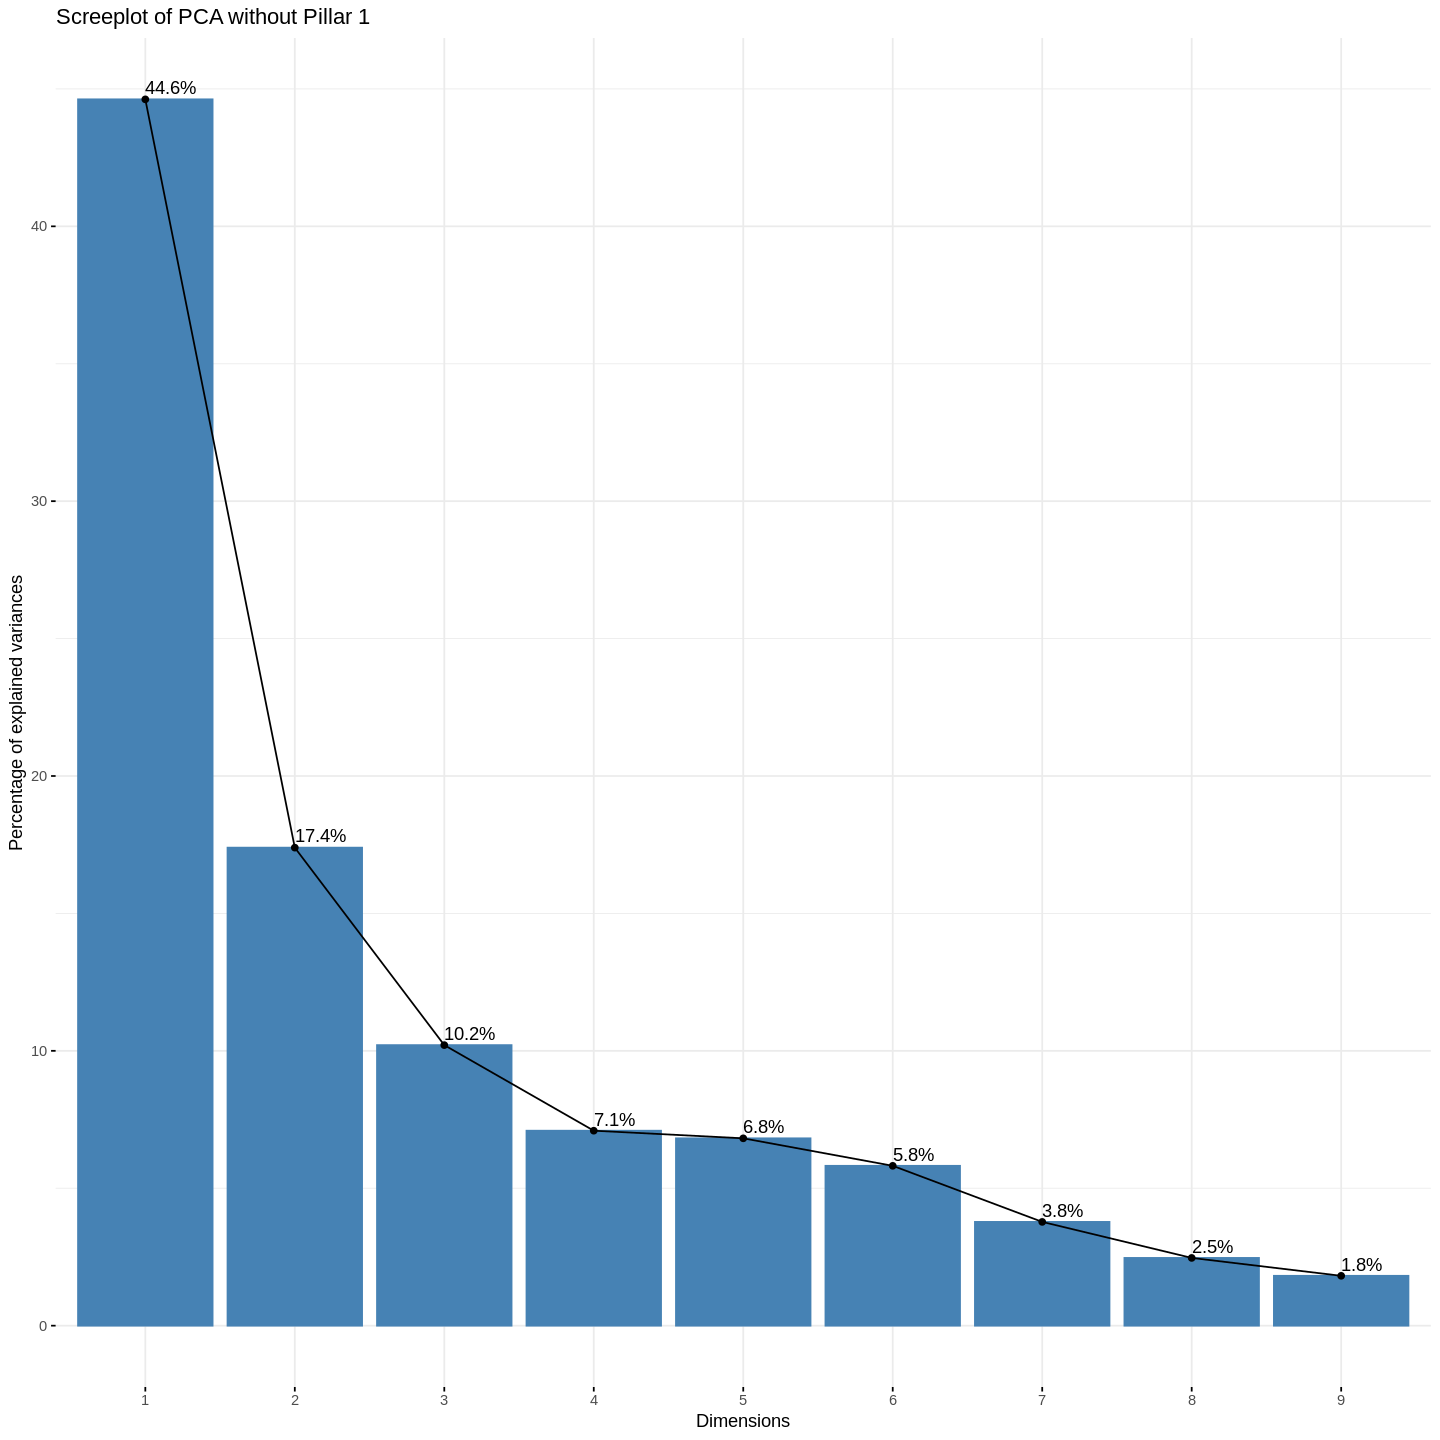

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 12)  # Adjust width and height of plots
pca_no_pillar1 = prcomp(data_reduced, scale.=TRUE)
fviz_eig(pca_no_pillar1, addlabels = TRUE, main = "Screeplot of PCA without Pillar 1")

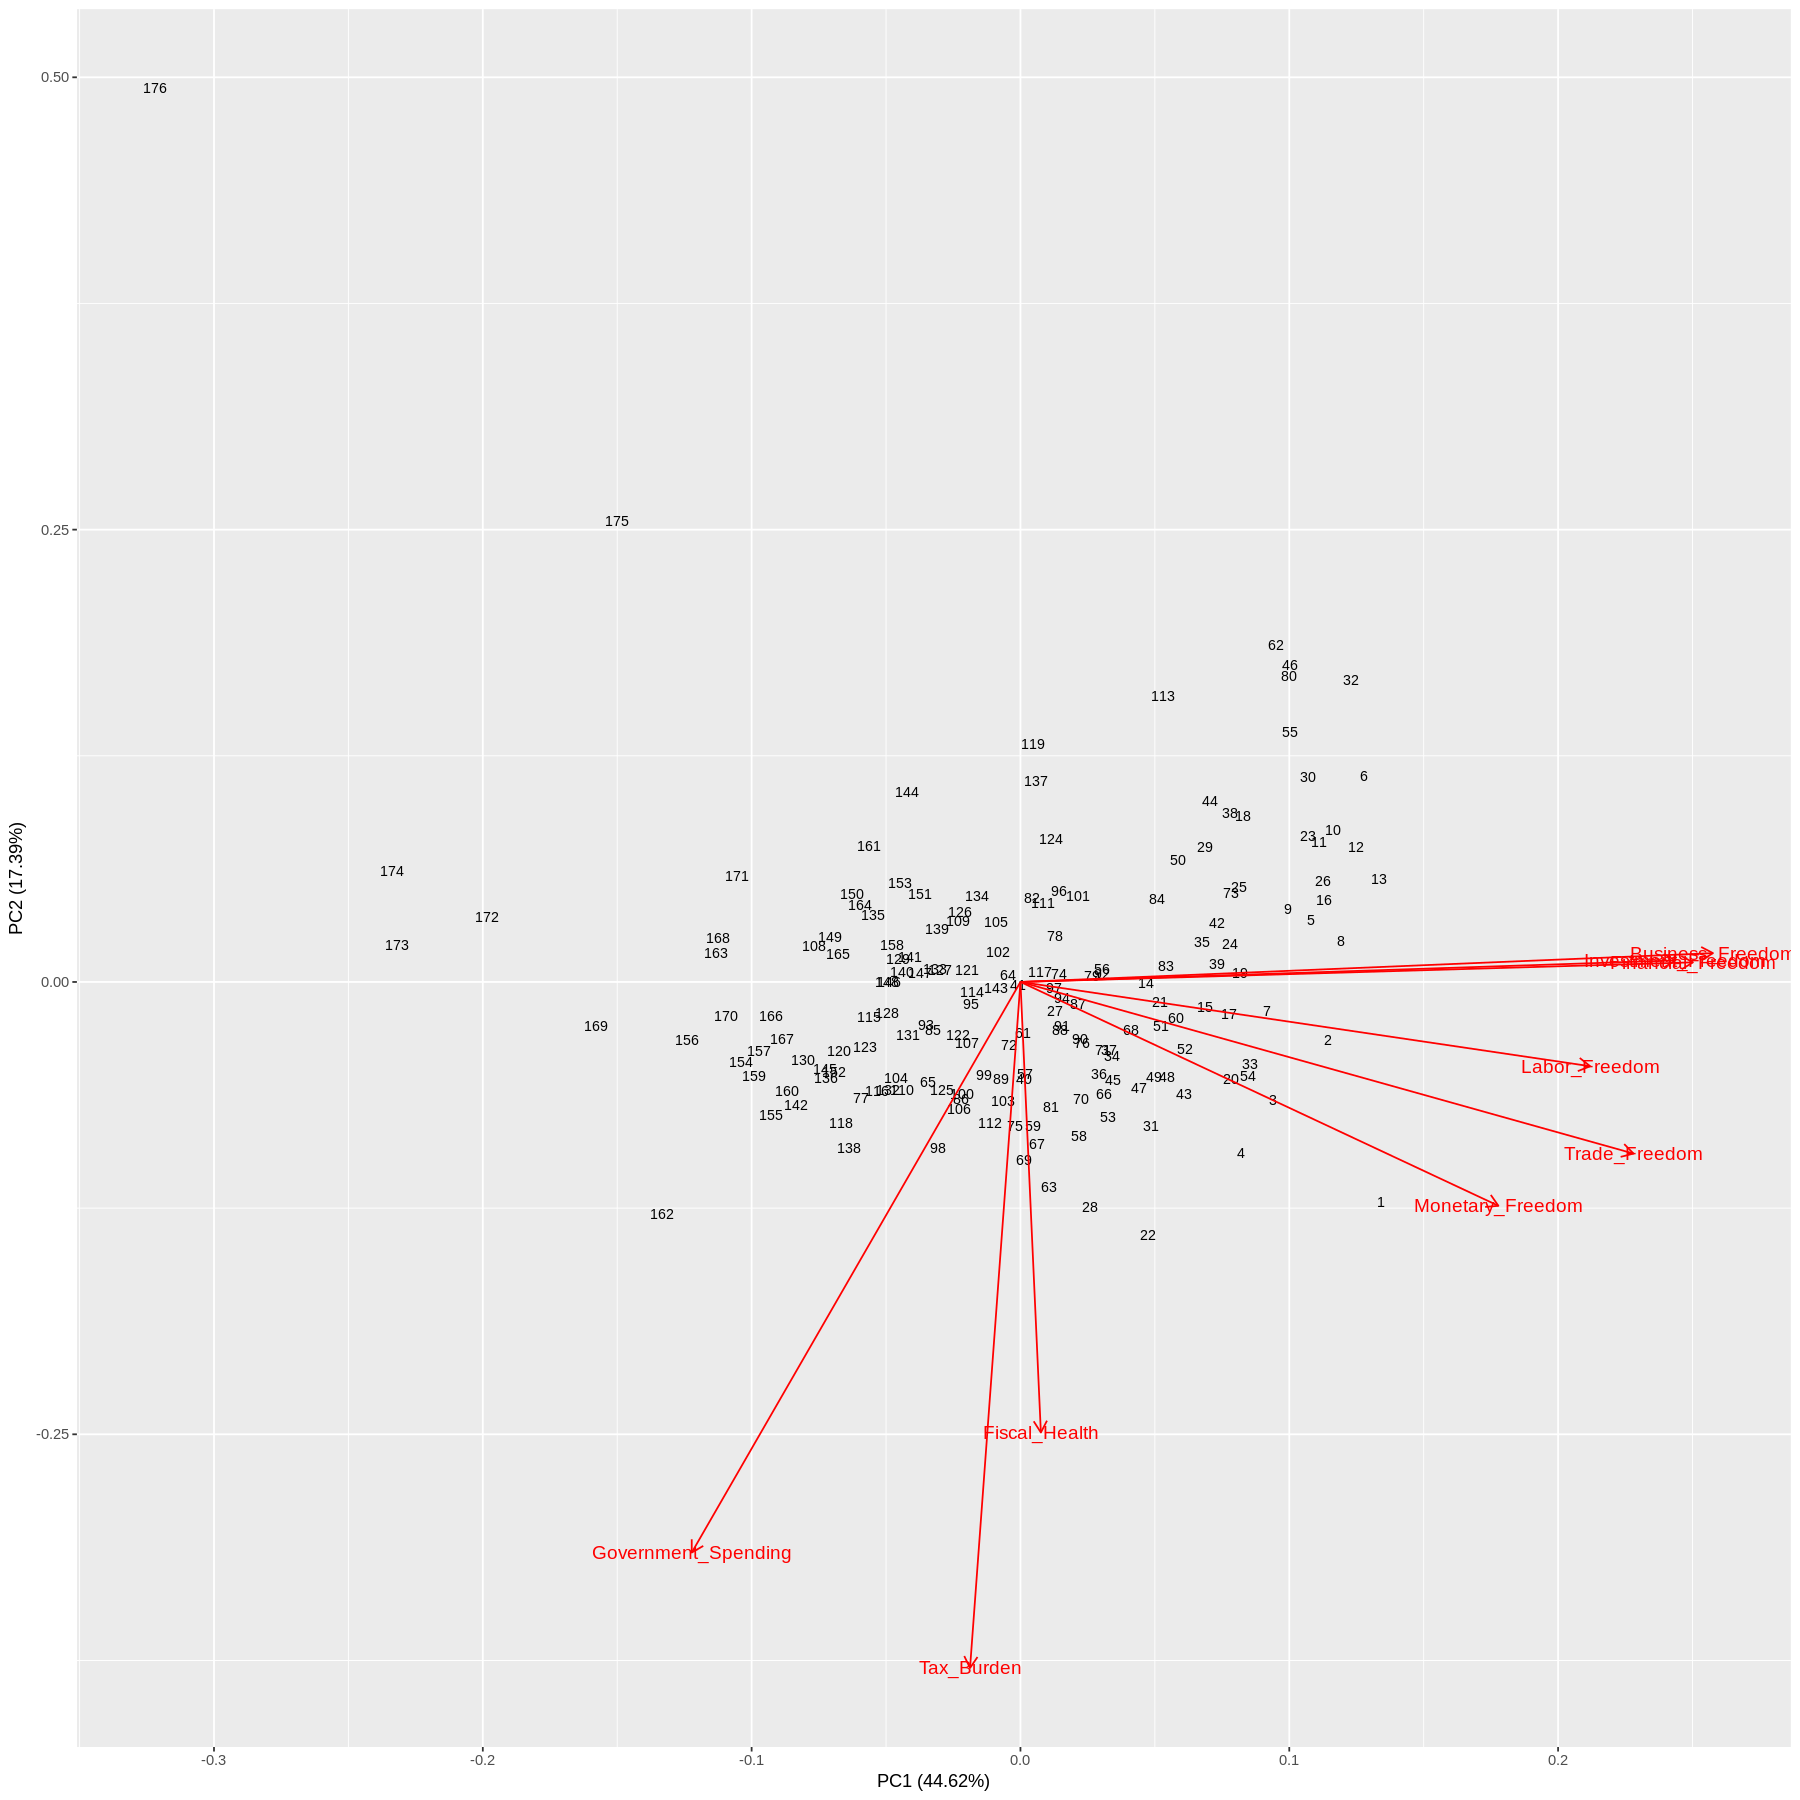

In [ ]:
# Method 1 of doing biplot for  the PC'S
options(repr.plot.width = 15, repr.plot.height = 15)  # Adjust width and height of plots

# Biplot PC1 vs PC2
autoplot(pca_no_pillar1,
                label = TRUE,
                label.size = 3,
                shape = FALSE,
                loadings = TRUE,
                loadings.label = TRUE,
                loadings.label.size = 4,
                title = "PCA Biplot (PC1 vs PC2) by Region")

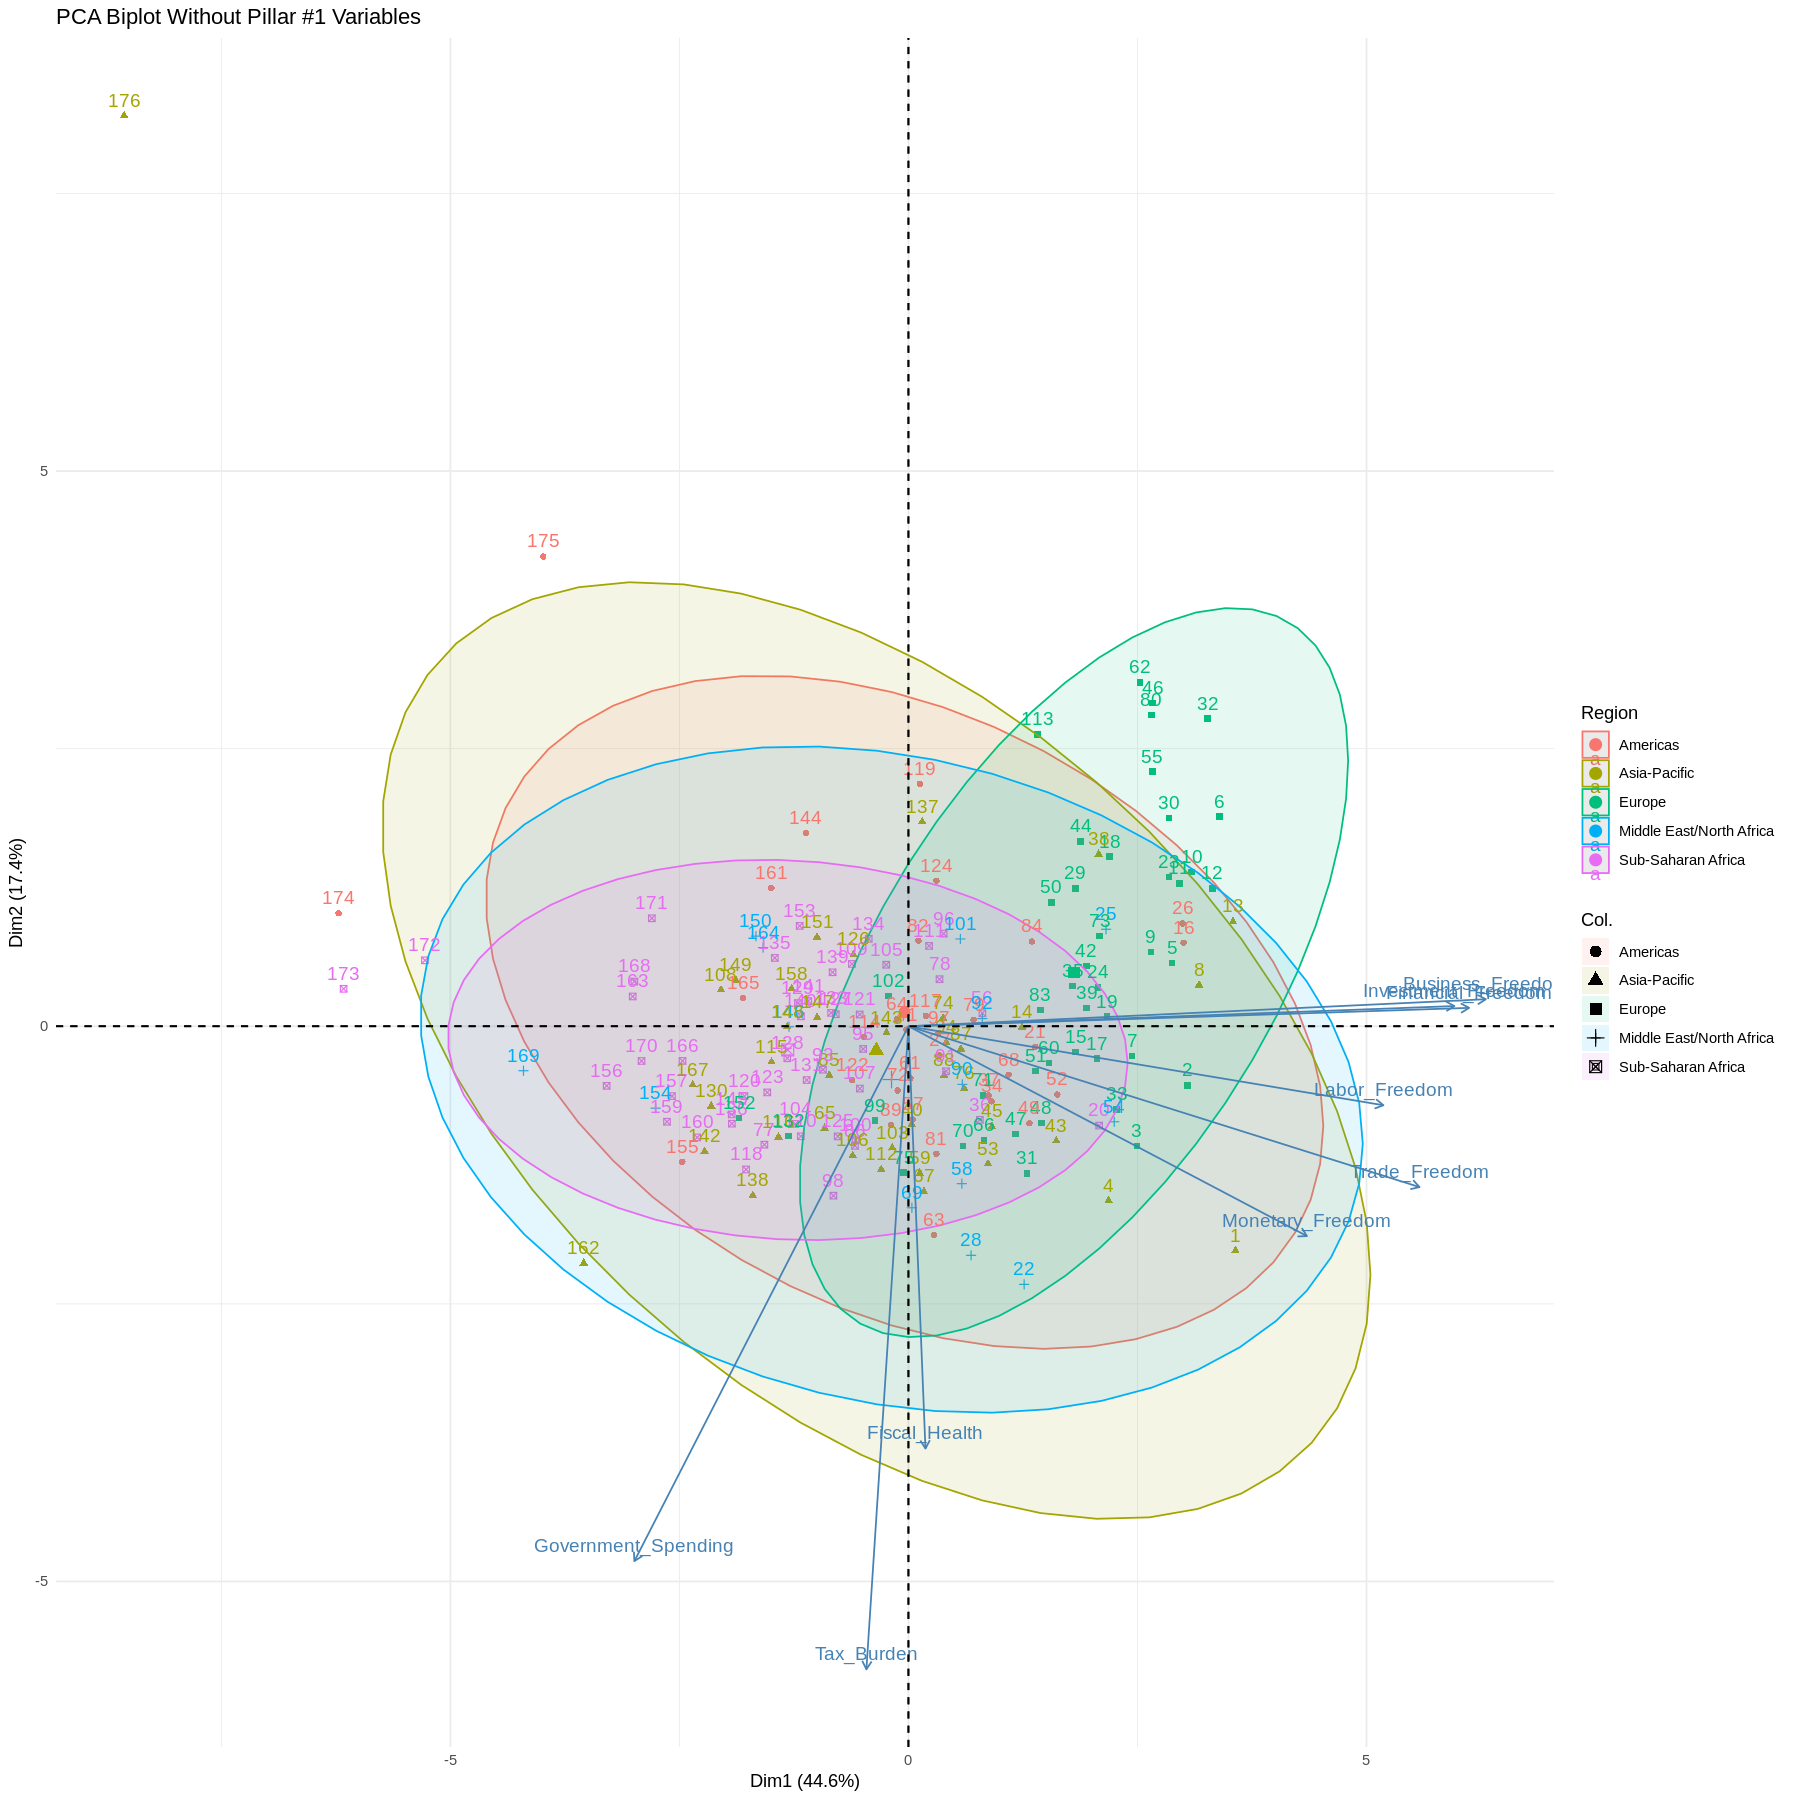

In [ ]:
# Method two of doing the Biplot with ellipse to indicate each region area of concentration
options(repr.plot.width = 15, repr.plot.height = 15)  # Adjust width and height of plots

# Method two of doing the Biplot with ellipse to indicate each region area of concentration
reduced_data = pillar_vars_no_pillar1
scaled_reduced = scale(reduced_data %>% select(Tax_Burden:Financial_Freedom))

# Perform PCA
pca_reduced = prcomp(scaled_reduced, scale.=TRUE)

# Biplot comparison
fviz_pca_biplot(pca_reduced,
                col.ind = reduced_data$Region,
                addEllipses = TRUE,
                title = "PCA Biplot Without Pillar #1 Variables") +
  scale_color_discrete(name = "Region") +
  theme_minimal()

**Loadings plot:**

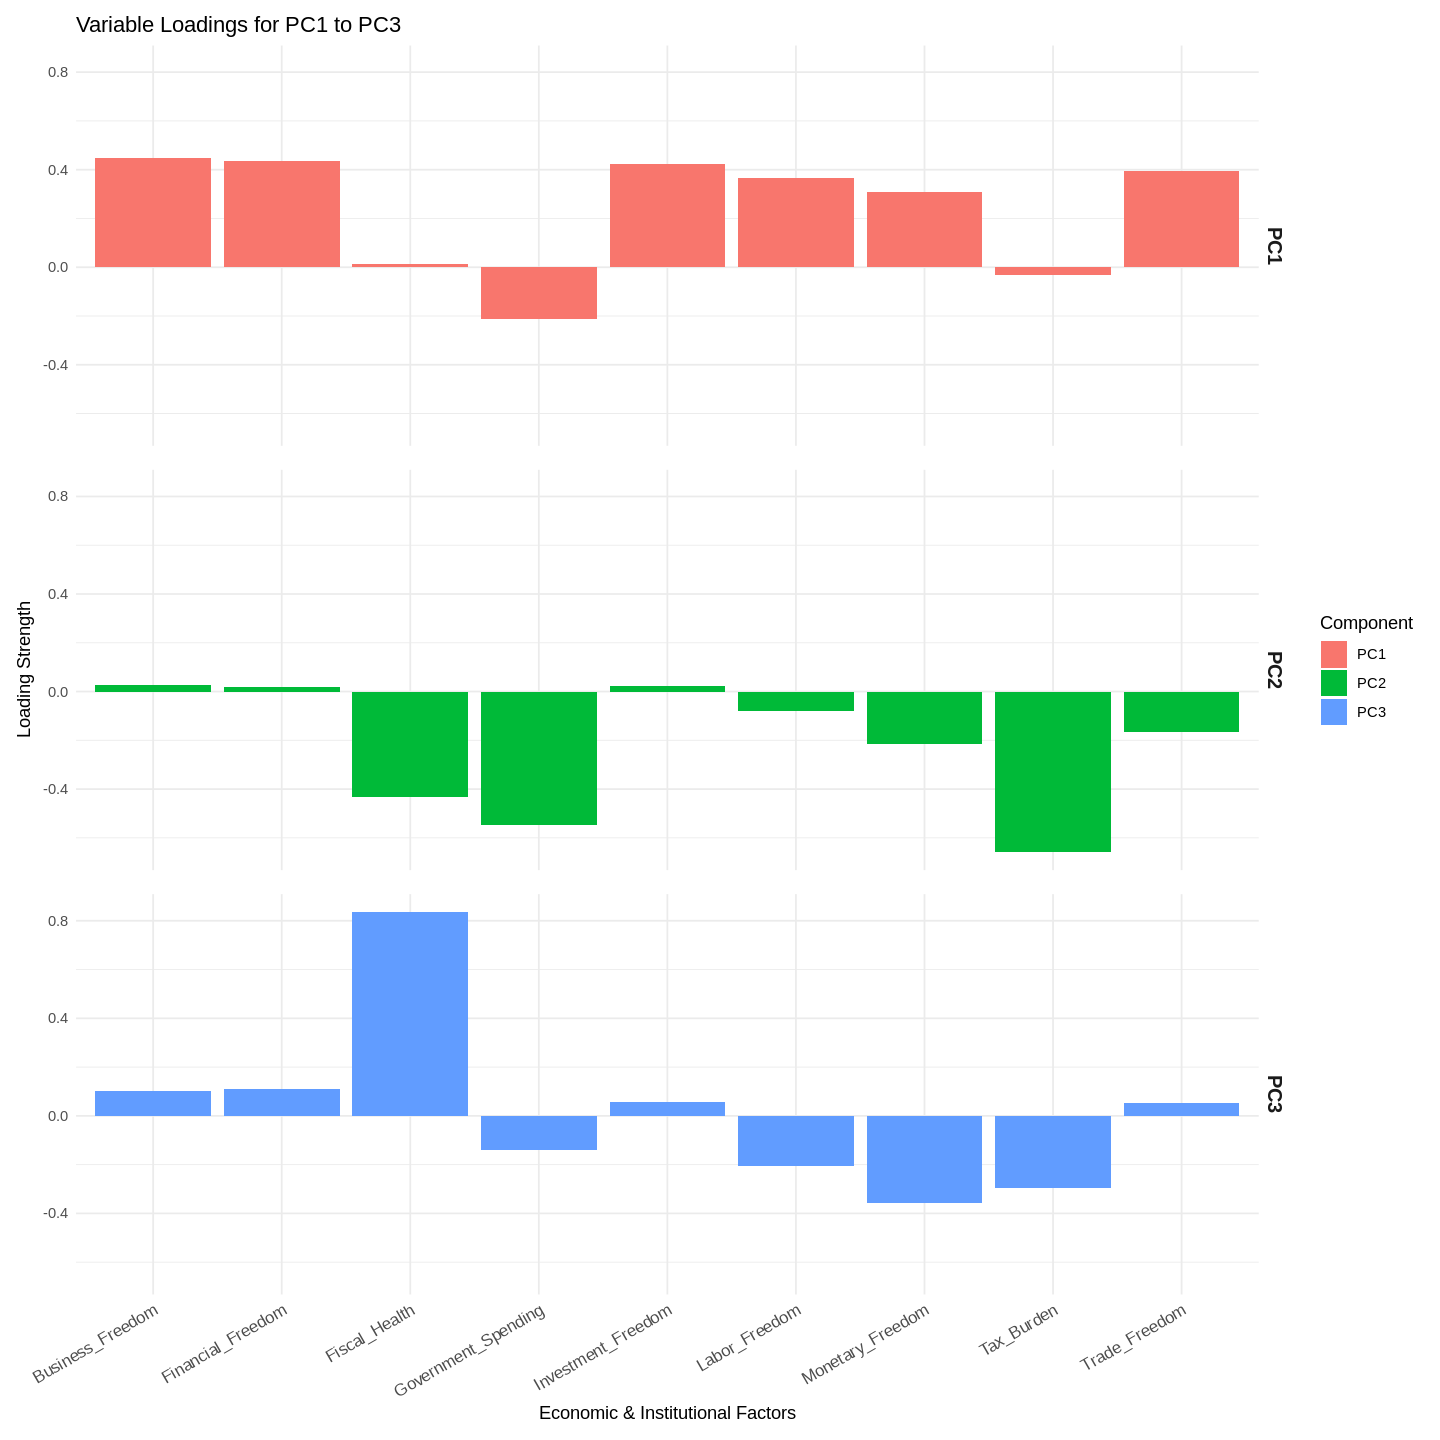

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 12)  # Adjust width and height of plots
# Extract loadings (rotation matrix)
loadings_df = as.data.frame(pca_no_pillar1$rotation[, 1:3])  # Loadings for PC1, PC2, and PC3
loadings_df$Symbol = rownames(loadings_df)  # Add variable names

# Convert to long format for ggplot
loadings_long = gather(loadings_df, key='Component', value='Weight', -Symbol)

# Plot the loadings
ggplot(loadings_long, aes(x = Symbol, y = Weight, fill = `Component`)) +
  geom_bar(stat = "identity") +
  facet_grid(Component~.) +
  labs(title = "Variable Loadings for PC1 to PC3",
       x = "Economic & Institutional Factors",
       y = "Loading Strength") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 10, angle = 30, hjust = 1),  # Slight angle for readability
    strip.text = element_text(size = 12, face = "bold"),  # Emphasize facet labels
    panel.spacing = unit(1, "lines"),  # Adds space between facets
    plot.margin = margin(10, 10, 10, 10)  # Expands plot margins
  )

Loadings plot with total PCA for each pillar

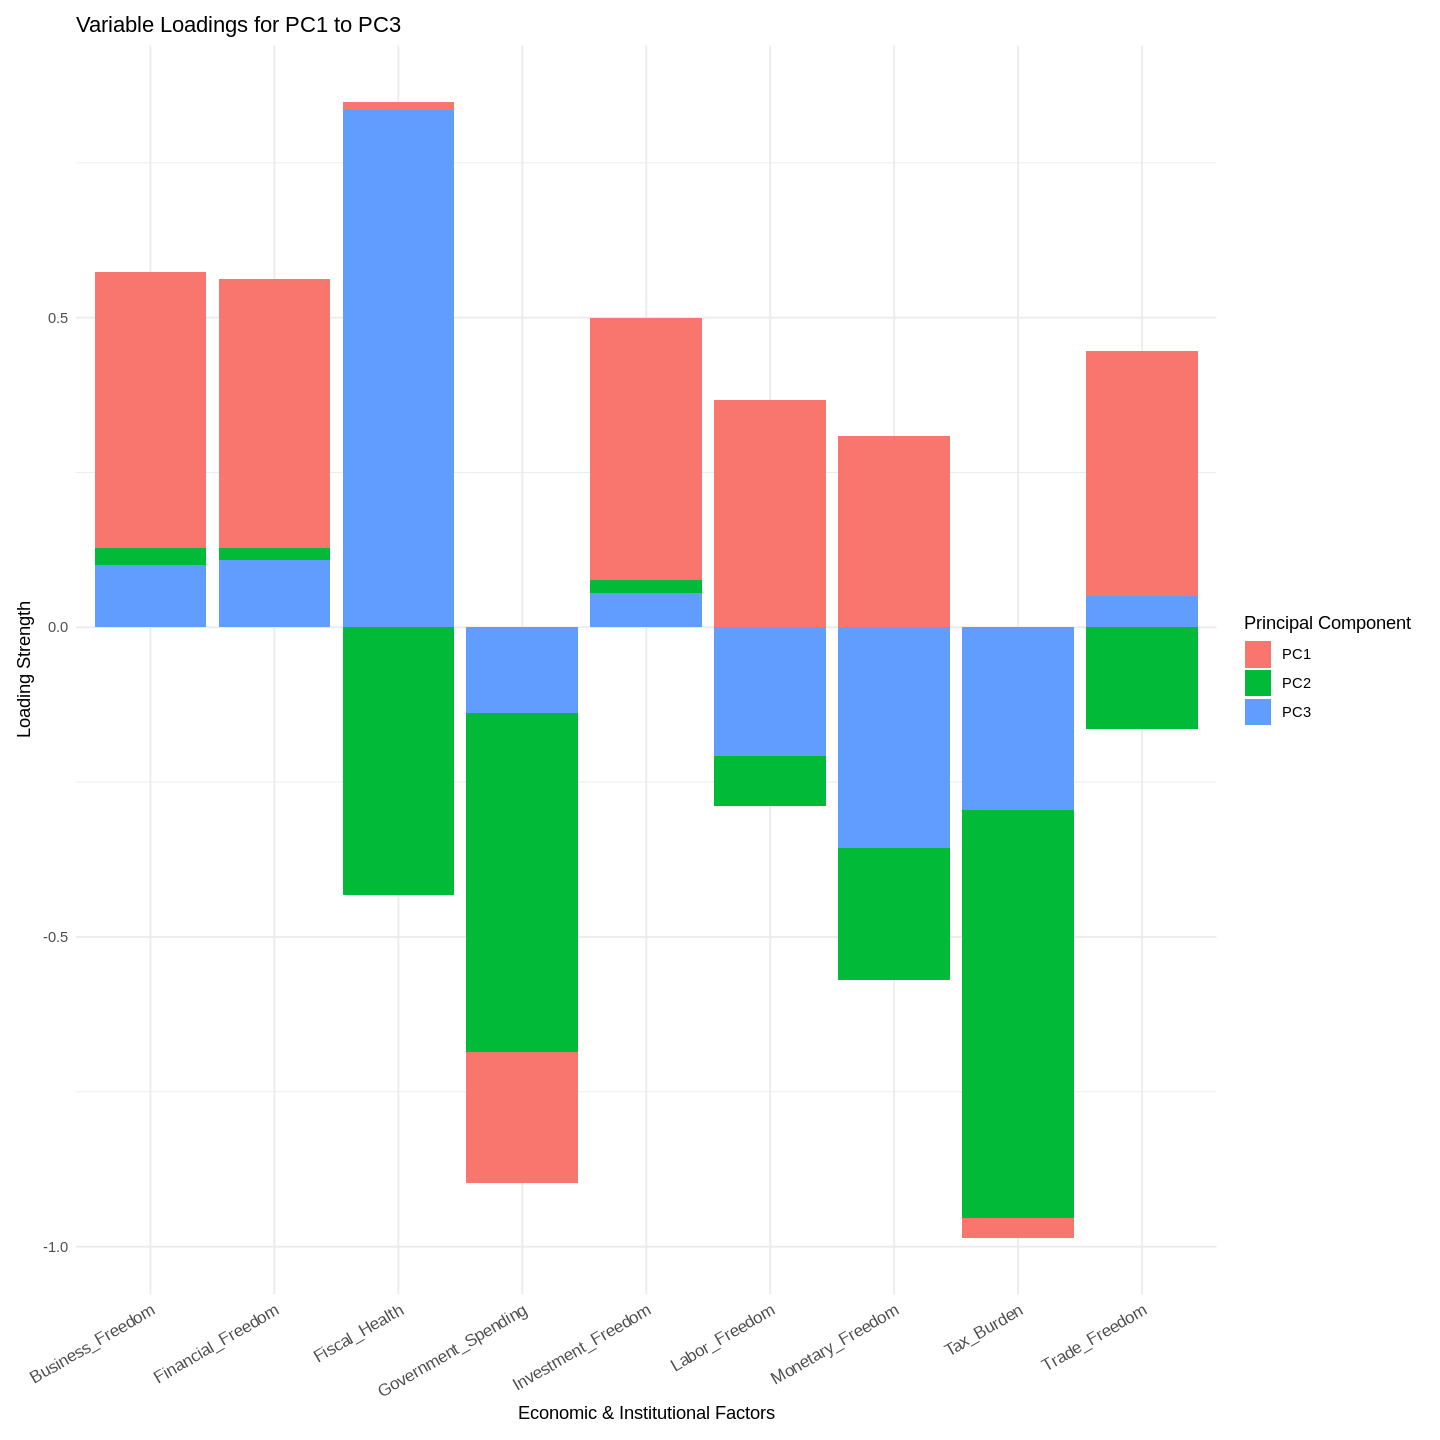

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 12)  # Adjust width and height of plots
# Extract loadings (rotation matrix)
loadings_df = as.data.frame(pca_no_pillar1$rotation[, 1:3])  # Loadings for PC1, PC2, and PC3
loadings_df$Variable = rownames(loadings_df)  # Add variable names

# Convert to long format for ggplot
loadings_long = gather(loadings_df, key='Principal Component', value='Loading', -Variable)


# Plot the loadings
ggplot(loadings_long, aes(x = Variable, y = Loading, fill = `Principal Component`)) +
  geom_bar(stat = "identity") +
  labs(title = "Variable Loadings for PC1 to PC3",
       x = "Economic & Institutional Factors",
       y = "Loading Strength") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 10, angle = 30, hjust = 1),  # Slight angle for readability
    strip.text = element_text(size = 12, face = "bold"),  # Emphasize facet labels
    panel.spacing = unit(1, "lines"),  # Adds space between facets
    plot.margin = margin(10, 10, 10, 10)  # Expands plot margins
  )

Without Pillar 1 (Rule of Law) variables, the PCA results change significantly:

  - The first PC now explains less variance, indicating Pillar #1 variables were important contributors.

  - The remaining PCs now emphasize different aspects, particularly government size and regulatory efficiency.

  - The regional clustering becomes less distinct, suggesting Rule of Law variables were important for distinguishing regions.

  - Countries with similar government policies but different legal systems now appear more similar.

In [ ]:
# PCA variance explained (standard code template)
variance_new = (pca_no_pillar1$sdev)^2
variance_explained = variance_new/sum(variance_new)
variance_explained

[1] 0.44620541 0.17392755 0.10207545 0.07093433 0.06816284 0.05815979 0.03775229
[8] 0.02464498 0.01813736

PC1, PC2, PC3 together explain 44.6% +17.4% +10.2% = 72.2% of the variability which is ok but is approximately 2.2% less than when pillar 1 was present.


**Interpretation:**

1.  **Scree Plot:** The PCs now have improved variance except for PC1 with Pillar 1 removed.

2.  **Loadings:**

  * **PC1:** PC1 was previously dominated by Pillar 1 variables that we removed which made its variance reduce from 52.2% to 44.6%, indicating that pillar 1 is necessary for economic freedom to an extent.

  * **PC2:** PC2 had little influence from pillar 1 and removing pillar 1 now adds more variance and it flips pillar values that logically indicates economic freedom to become positively correlated and the ones tha affect economic freedom to become negatively correlated.

3.  **Biplot (PC2 vs PC3):**

  * **Europe:** Clusters in high PC2/PC3, excelling in regulatory efficiency and open markets.

  * **Sub-Saharan Africa:** Low PC2/PC3, indicating weak regulatory frameworks.

4.  **Outliers:** Cuba and North Korea removed due to extreme values especially in Fiscial Health and Government Spending that Cuba North Korea has a value of zero and North Korea also having a value of Zero in Tax Burden

### Task 1 (2) - Cluster Analysis
#### (a) Clustering Countries (Rows)
**Objective**: Use hierarchical clustering to group countries based on the 12 pillar variables. Compare results across different distance metrics and linkage methods.

In [ ]:
install.packages("cluster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# For countries (rows)
library(cluster)

In [ ]:
View(clean_pillar$Country) # country_labels

[1] "Singapore"                        "Switzerland"                     
  [3] "Ireland"                          "Taiwan"                          
  [5] "Luxembourg"                       "Denmark"                         
  [7] "Estonia"                          "New Zealand"                     
  [9] "Norway"                           "Sweden"                          
 [11] "Netherlands"                      "Finland"                         
 [13] "Australia"                        "South Korea"                     
 [15] "Lithuania"                        "Canada"                          
 [17] "Cyprus"                           "Germany"                         
 [19] "Latvia"                           "Mauritius"                       
 [21] "Chile"                            "United Arab Emirates"            
 [23] "Iceland"                          "Czech Republic"                  
 [25] "Israel"                           "United States"                   
 [27] "Uruguay"                          "Qatar"                           
 [29] "Portugal"                         "United Kingdom"                  
 [31] "Bulgaria"                         "Austria"                         
 [33] "Georgia"                          "Jamaica"                         
 [35] "Slovakia"                         "Botswana"                        
 [37] "Costa Rica"                       "Japan"                           
 [39] "Croatia"                          "Samoa"                           
 [41] "Barbados"                         "Poland"                          
 [43] "Brunei Darussalam"                "Slovenia"                        
 [45] "Malaysia"                         "Belgium"                         
 [47] "Armenia"                          "Albania"                         
 [49] "Peru"                             "Malta"                           
 [51] "Romania"                          "Panama"                          
 [53] "Indonesia"                        "Bahrain"                         
 [55] "Spain"                            "Cabo Verde"                      
 [57] "Dominican Republic"               "Oman"                            
 [59] "Vietnam"                          "Serbia"                          
 [61] "The Bahamas"                      "France"                          
 [63] "Guatemala"                        "Saint Lucia"                     
 [65] "Vanuatu"                          "Bosnia and Herzegovina"          
 [67] "Kazakhstan"                       "Mexico"                          
 [69] "Saudi Arabia"                     "Azerbaijan"                      
 [71] "North Macedonia"                  "Belize"                          
 [73] "Hungary"                          "Micronesia"                      
 [75] "Kosovo"                           "Mongolia"                        
 [77] "So Tom and Prncipe"               "Seychelles"                      
 [79] "Trinidad and Tobago"              "Italy"                           
 [81] "Paraguay"                         "Saint Vincent and the Grenadines"
 [83] "Montenegro"                       "Colombia"                        
 [85] "Tonga"                            "Tanzania"                        
 [87] "The Philippines"                  "Thailand"                        
 [89] "Honduras"                         "Kuwait"                          
 [91] "Cte d'Ivoire"                     "Jordan"                          
 [93] "The Gambia"                       "Fiji"                            
 [95] "Benin"                            "Namibia"                         
 [97] "Guyana"                           "Madagascar"                      
 [99] "Moldova"                          "Gabon"                           
[101] "Morocco"                          "Turkey"                          
[103] "Uzbekistan"                       "Djibouti"                        
[105] "Ghana"                            "Cambodia

In [ ]:
str(clean_pillar)

tibble [176 × 16] (S3: tbl_df/tbl/data.frame)
 $ Country               : chr [1:176] "Singapore" "Switzerland" "Ireland" "Taiwan" ...
 $ Region                : chr [1:176] "Asia-Pacific" "Europe" "Europe" "Asia-Pacific" ...
 $ Year                  : num [1:176] 2024 2024 2024 2024 2024 ...
 $ Overall_Score         : num [1:176] 83.5 83 82.6 80 79.2 77.8 77.8 77.8 77.5 77.5 ...
 $ Property_Rights       : num [1:176] 94.2 94.2 93.5 82.2 96.9 98.6 92.8 87.4 98.8 96.2 ...
 $ Government_Integrity  : num [1:176] 88.3 91.3 83.4 73.4 84.9 97.4 81.2 95.9 95.6 93.2 ...
 $ Judicial_Effectiveness: num [1:176] 58.3 98.1 94.3 94 95.8 89.6 93.4 93.2 96.7 95.4 ...
 $ Tax_Burden            : num [1:176] 90.7 70.4 78 79.2 64.6 41.8 80.8 65.5 61.7 50.6 ...
 $ Government_Spending   : num [1:176] 89.2 64.6 82.4 90.5 40.6 26.8 46.8 46.3 32.1 28.5 ...
 $ Fiscal_Health         : num [1:176] 76 95.7 91.7 90.3 97.6 98.2 85.4 72.4 97.2 97.1 ...
 $ Business_Freedom      : num [1:176] 86.9 89.3 91.3 84.9 89.5 92

In [ ]:
nrow(pca_data) == length(clean_pillar$Country) # Should return TRUE


[1] TRUE

In [ ]:
# Ensure country labels are in ASCII format and character type
clean_pillar$Country = iconv(clean_pillar$Country, from = "UTF-8", to = "ASCII", sub = "")

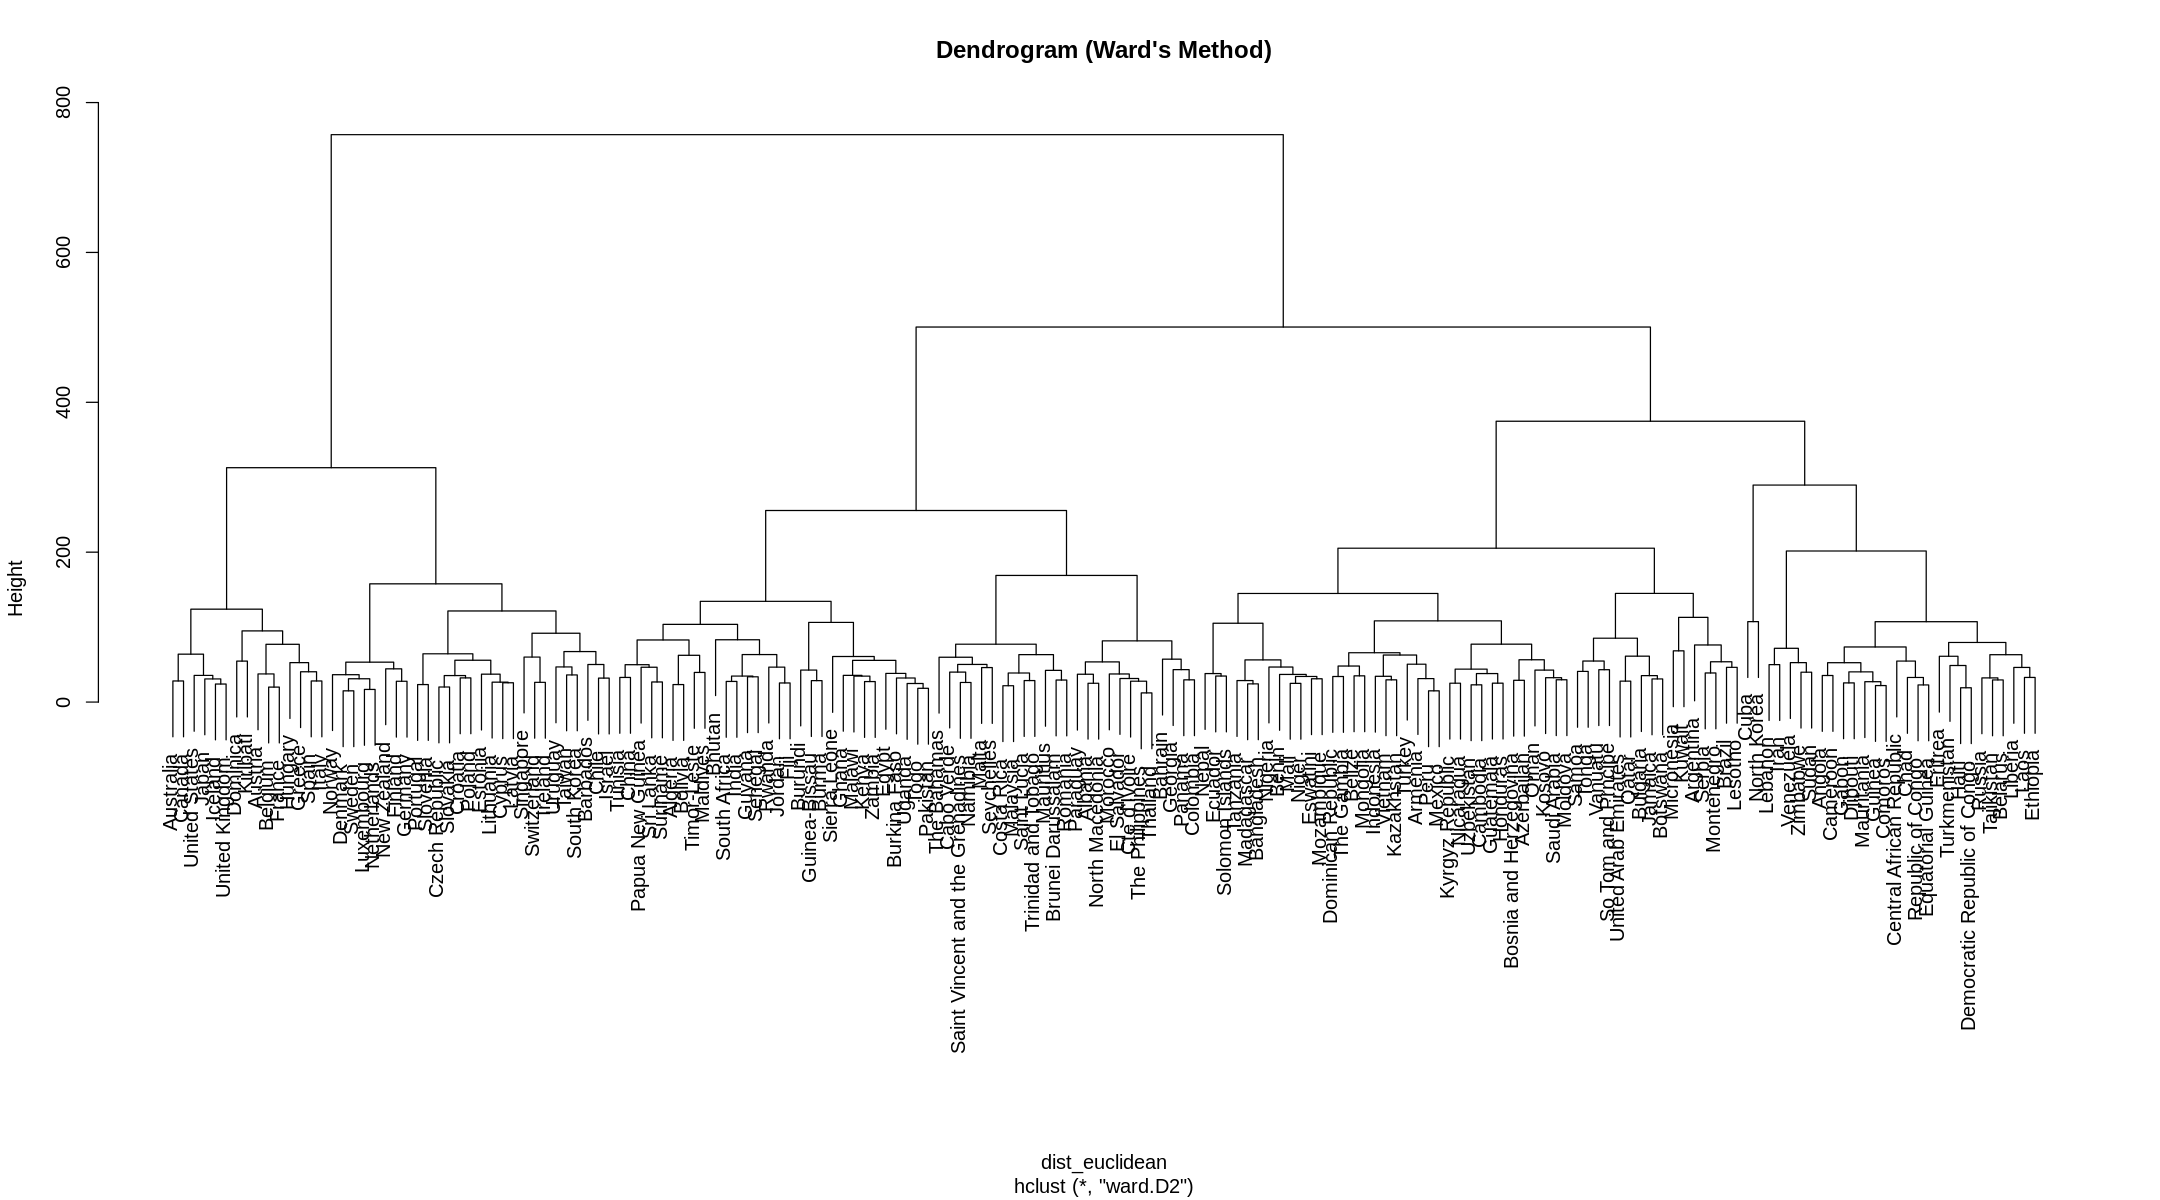

In [ ]:
# country_labels is to be used in the dendrogram.
options(repr.plot.width = 18, repr.plot.height = 10)  # Adjust width and height of plots

# Hierarchical clustering
dist_euclidean = dist(pca_data, method = "euclidean")
hc_ward = hclust(dist_euclidean, method = "ward.D2")

# Plot dendrogram
plot(hc_ward, labels = clean_pillar$Country, main = "Dendrogram (Ward's Method)")

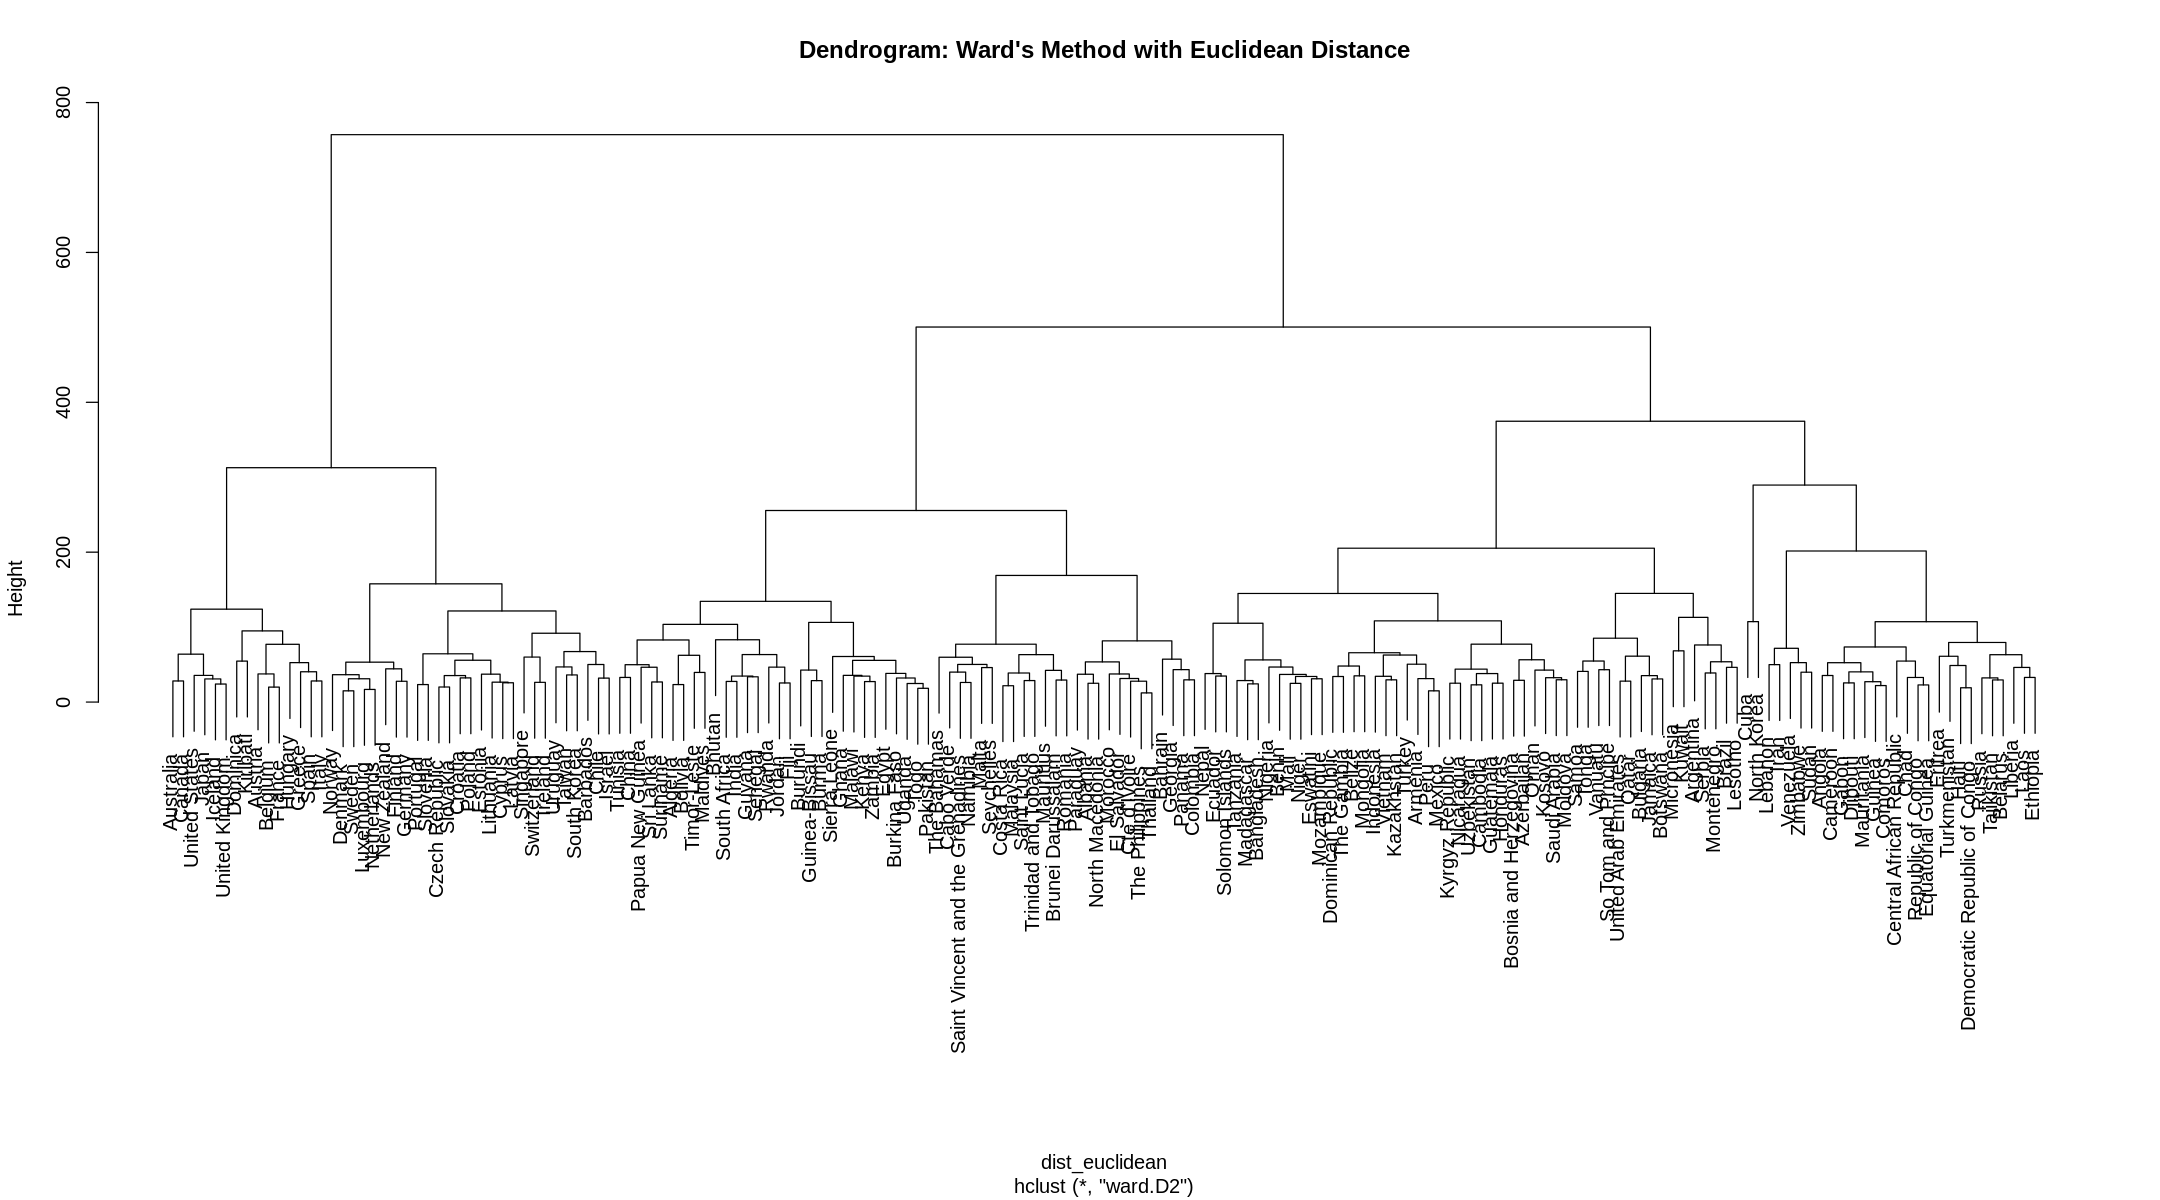

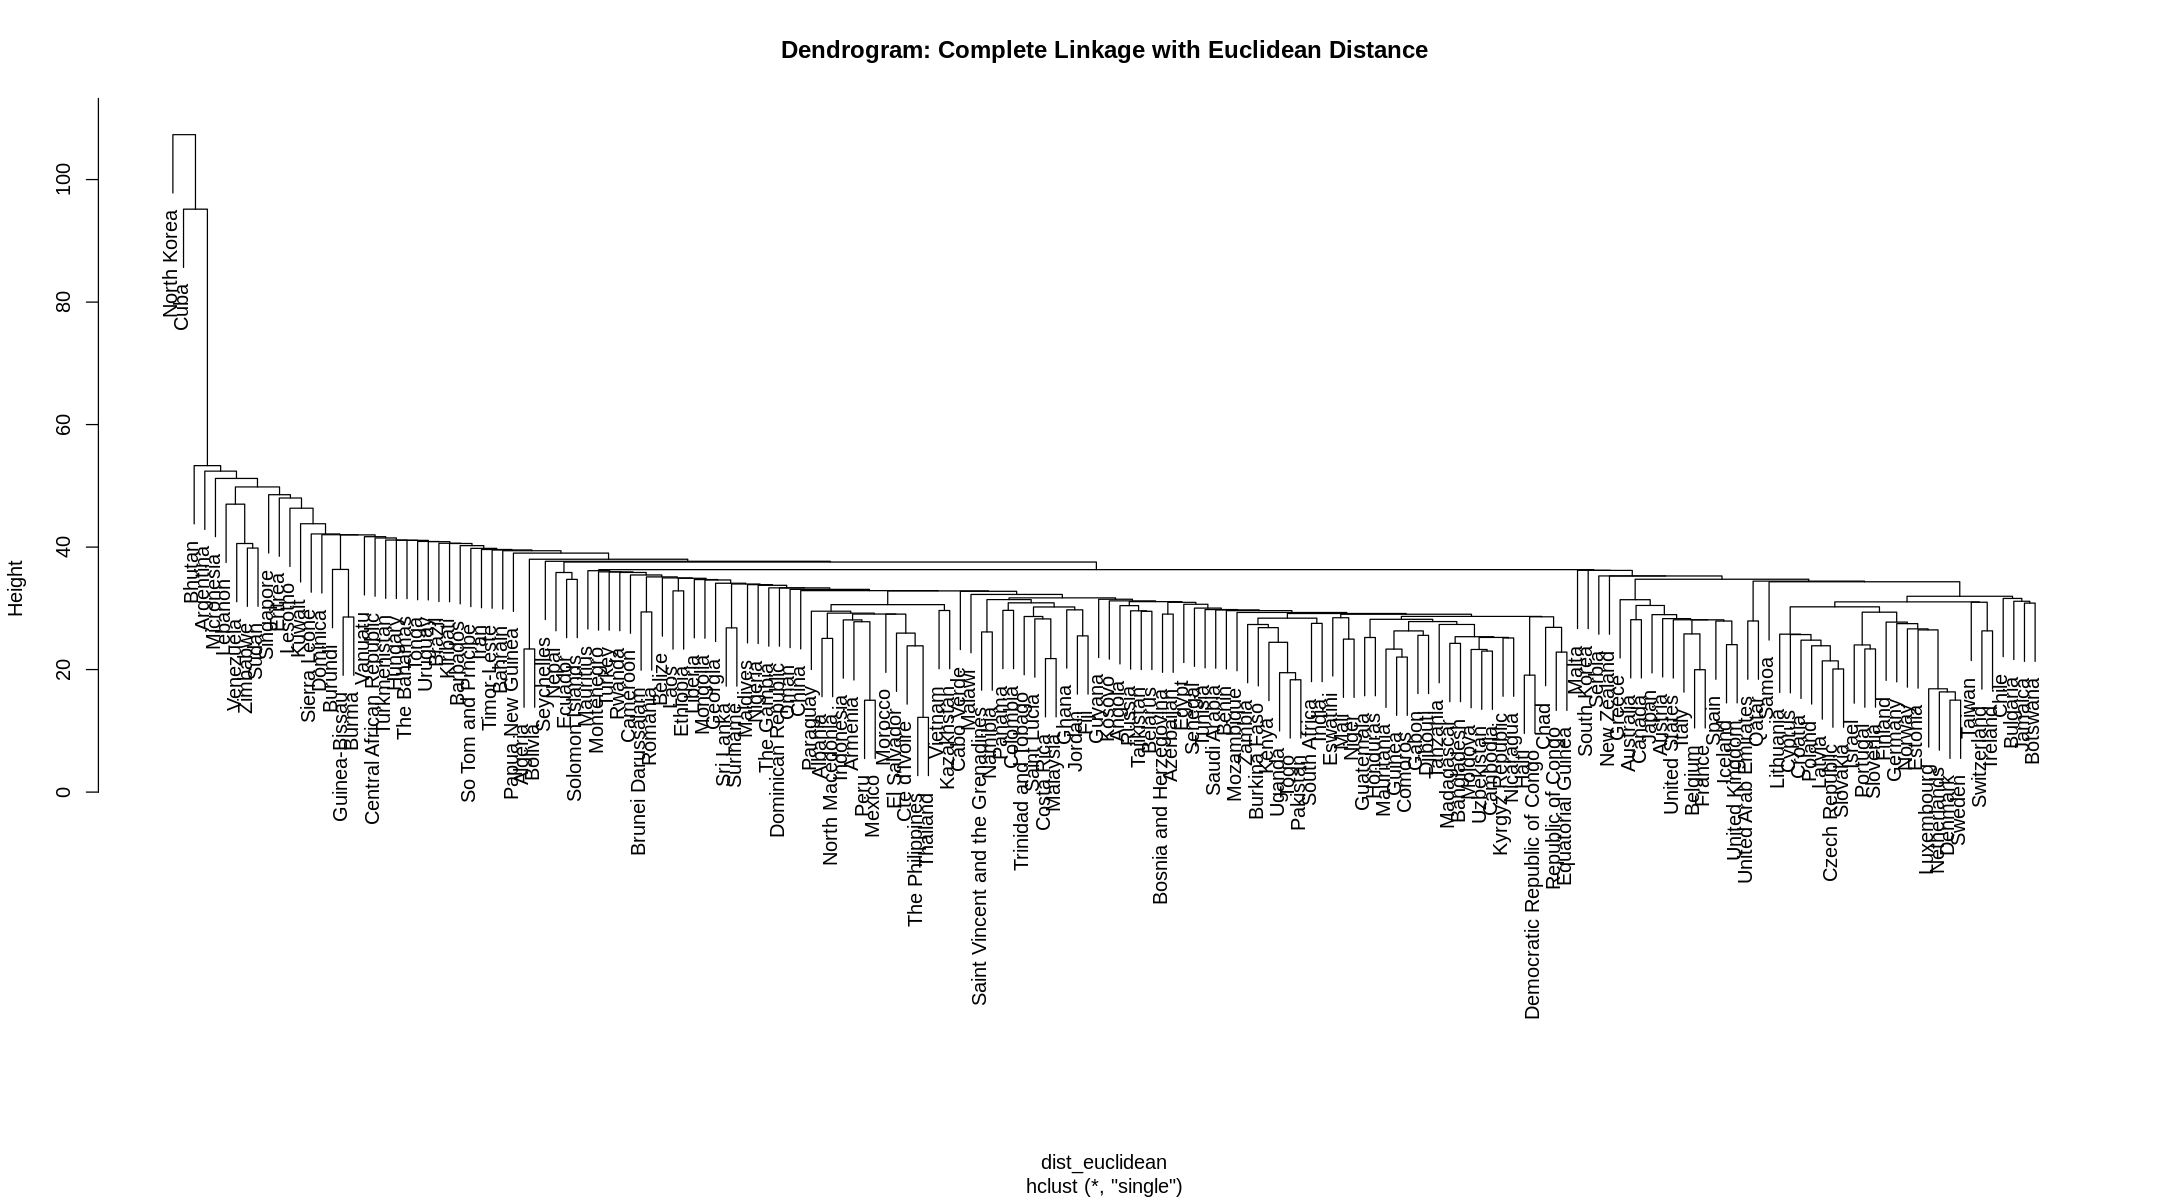

In [ ]:
plot(hc_ward_euc, labels = clean_pillar$Country, main = "Dendrogram: Ward's Method with Euclidean Distance")
plot(hc_single_euc, labels = clean_pillar$Country, main = "Dendrogram: Complete Linkage with Euclidean Distance")

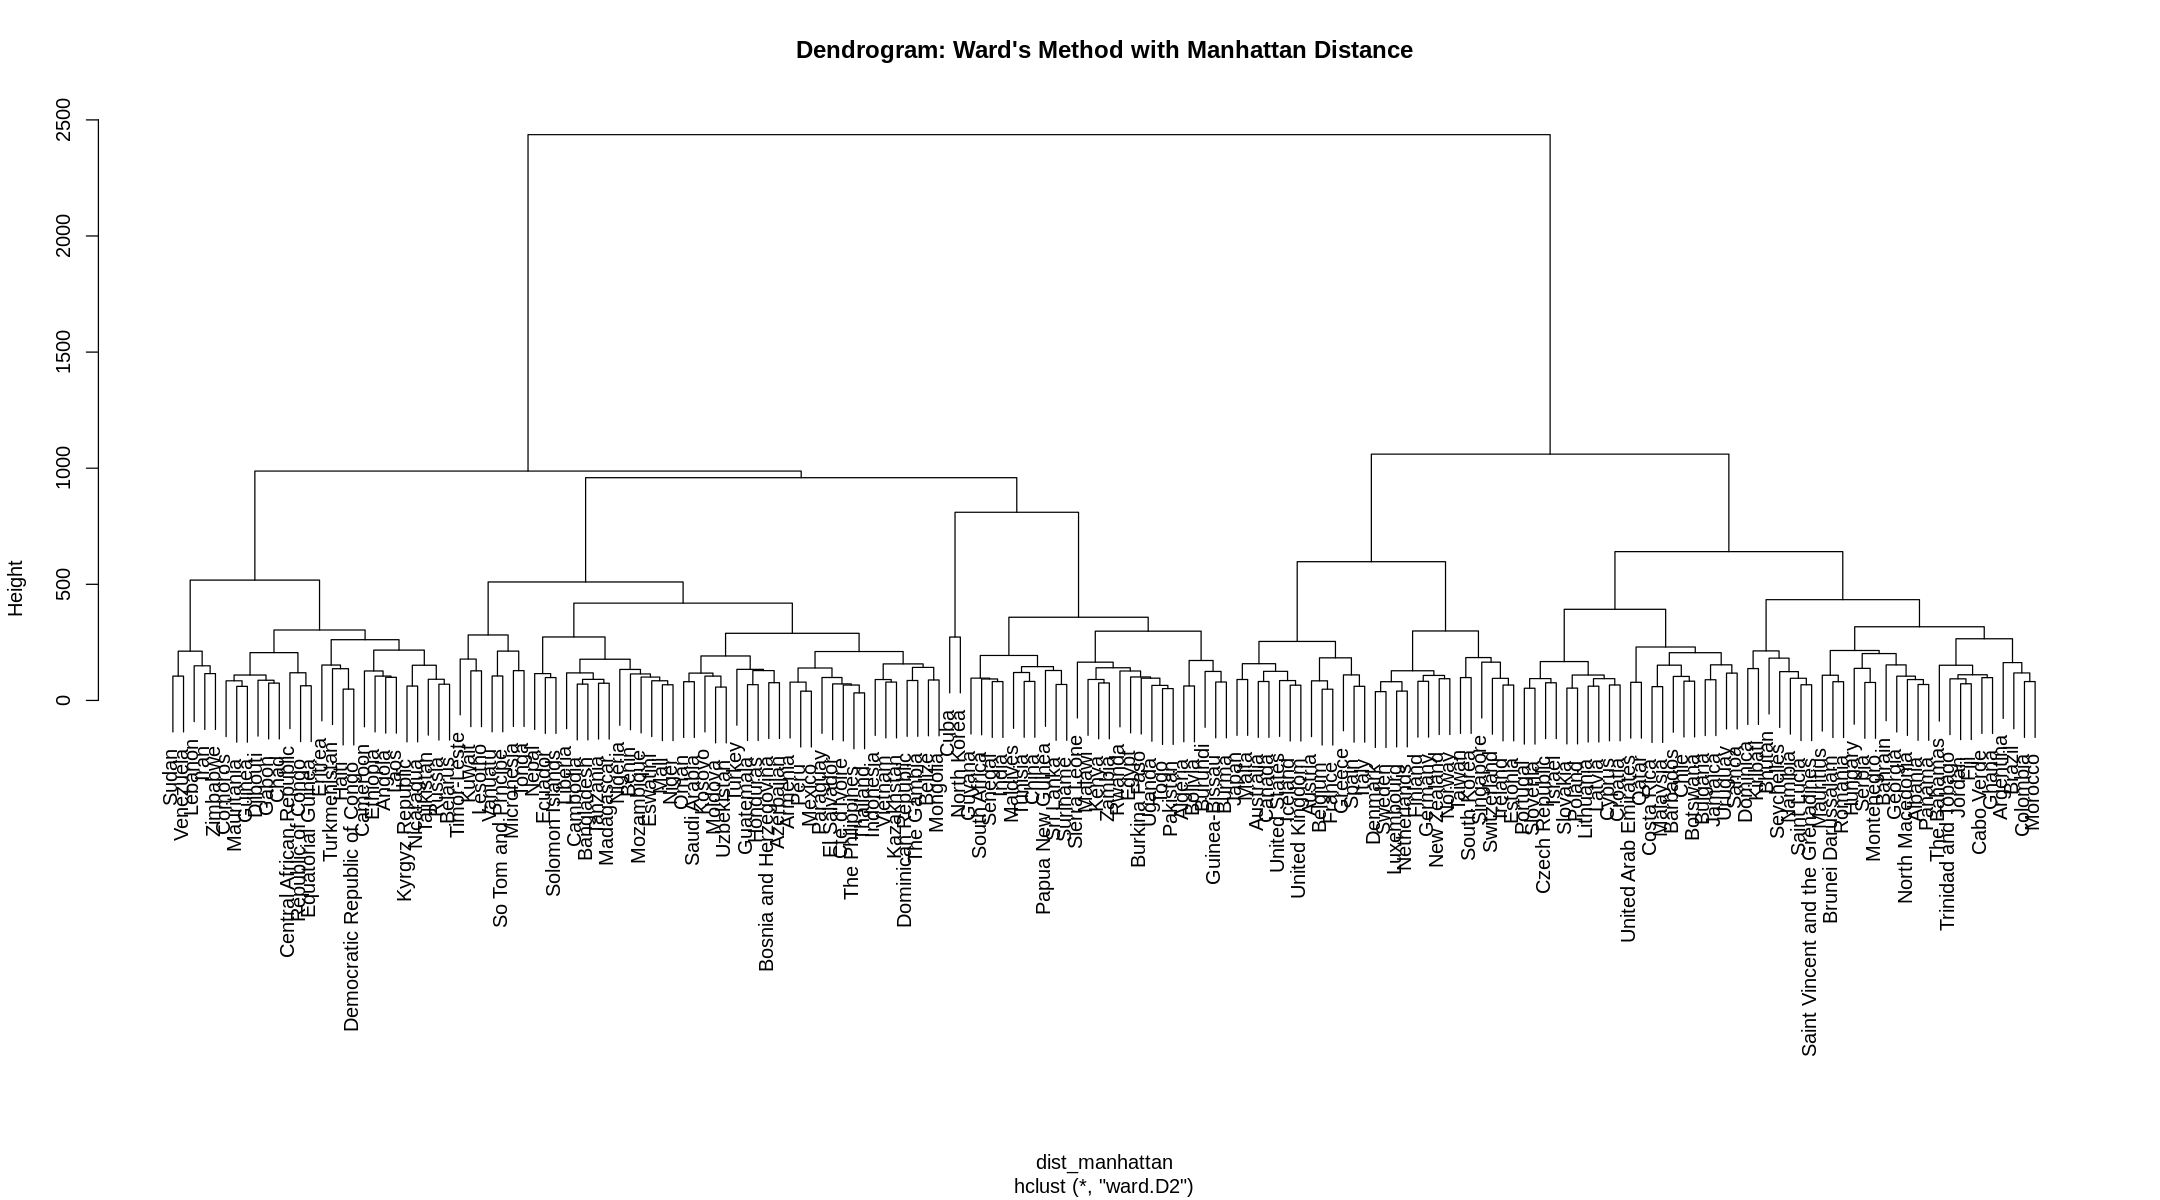

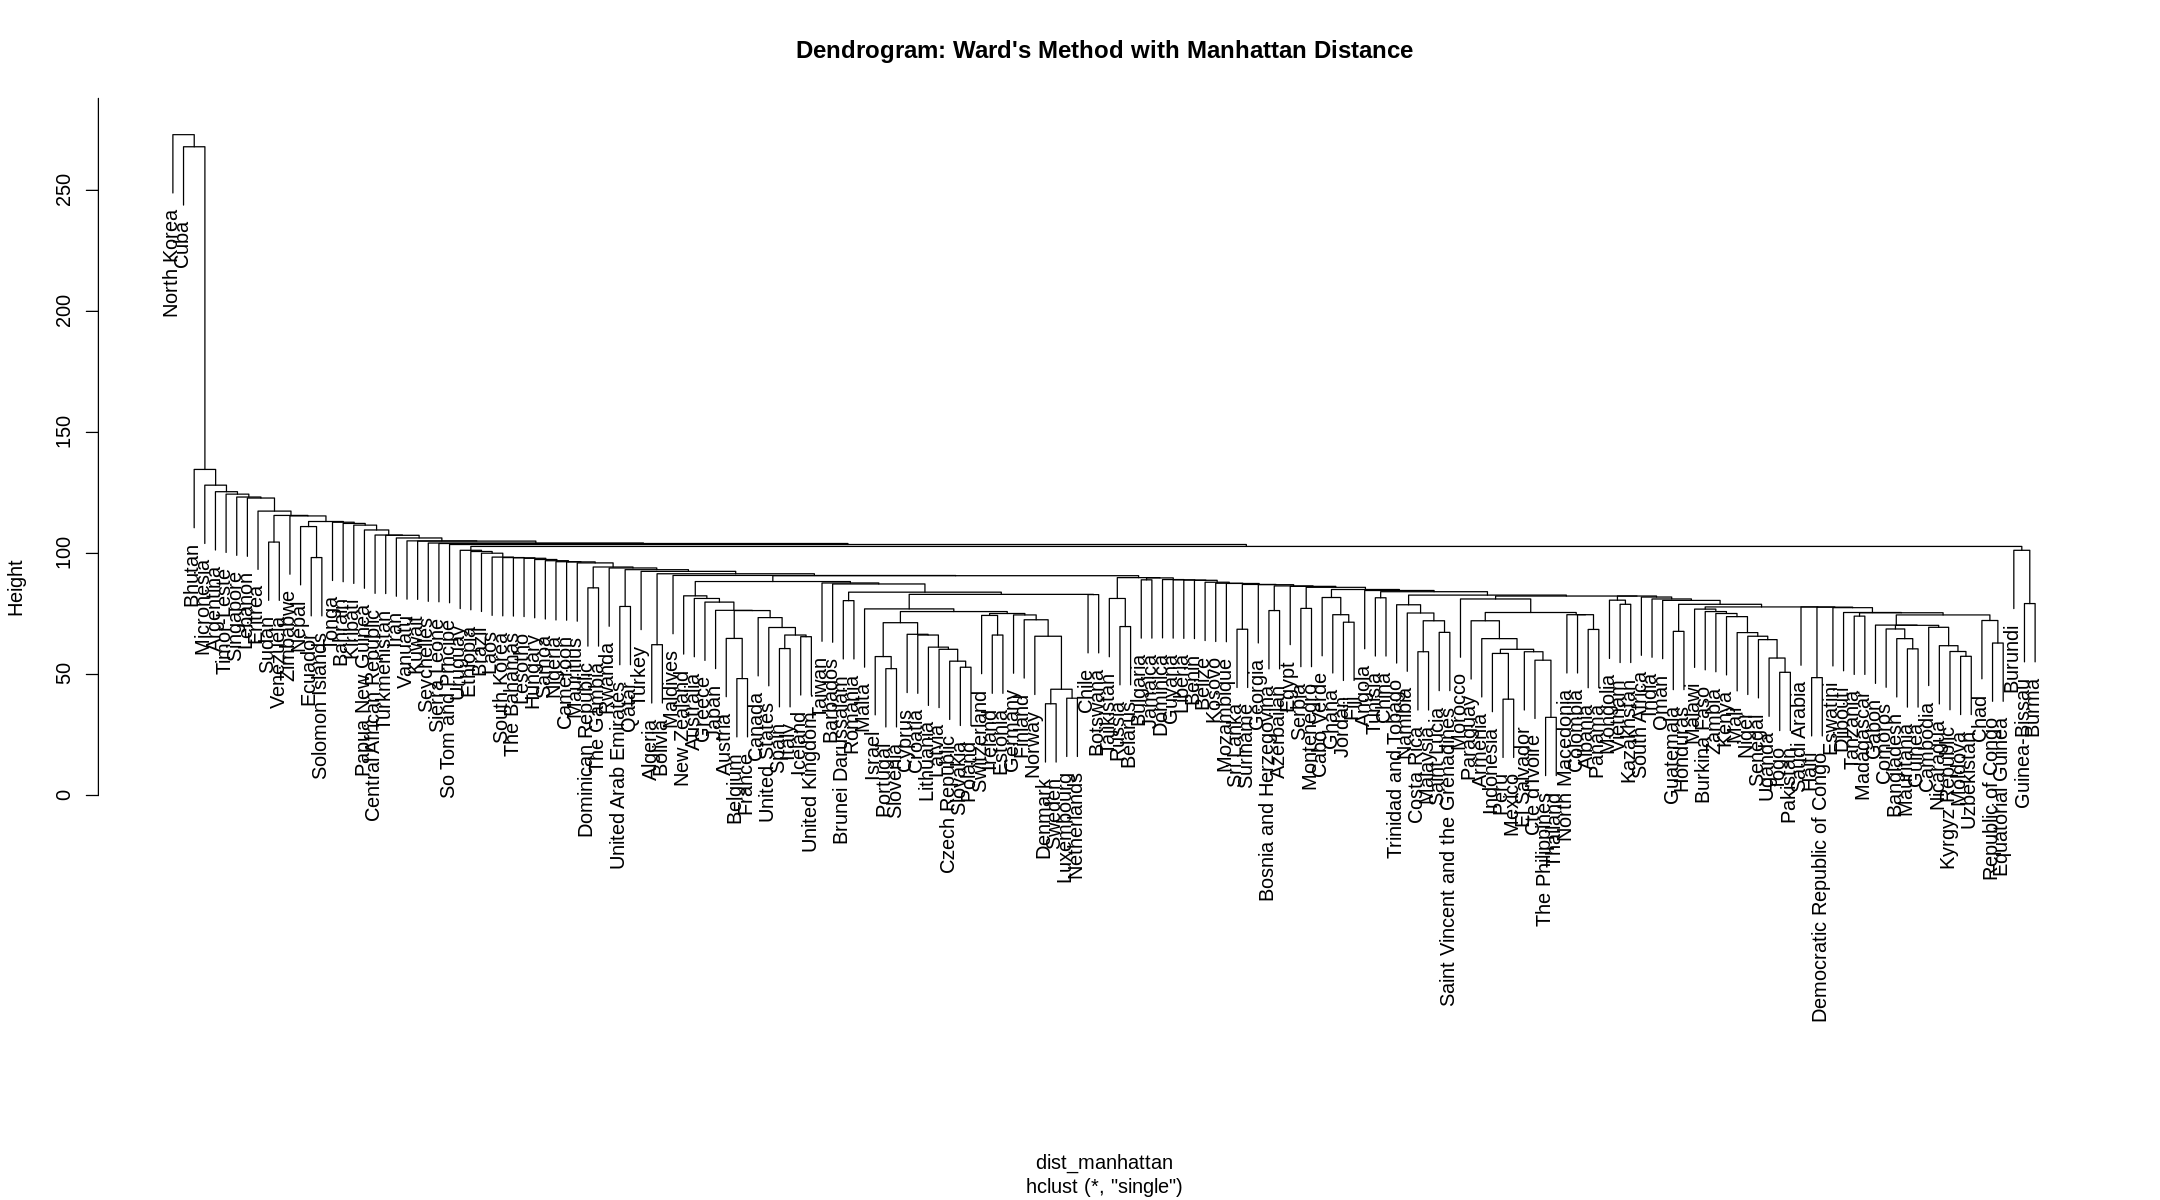

In [ ]:
plot(hc_ward_man, labels = clean_pillar$Country, main = "Dendrogram: Ward's Method with Manhattan Distance")
plot(hc_single_man, labels = clean_pillar$Country, main = "Dendrogram: Ward's Method with Manhattan Distance")

In [ ]:
# Ensure country names are row names in the PCA dataset before clustering
rownames(pca_data) = clean_pillar$Country

# Compute dissimilarity matrix with different metrics
dist_euclidean = dist(pca_data, method = "euclidean")
dist_manhattan = dist(pca_data, method = "manhattan")

# Hierarchical clustering with different methods
hc_ward_euc = hclust(dist_euclidean, method = "ward.D2")
hc_single_euc = hclust(dist_euclidean, method = "single")
hc_ward_man = hclust(dist_manhattan, method = "ward.D2")
hc_single_man = hclust(dist_manhattan, method = "single")

# Compare results
cluster_results = data.frame(
  Method = c("Ward (Euclidean)", "Single (Euclidean)", "Ward (Manhattan)", "Single (Manhattan)"),
  Height = c(max(hc_ward_euc$height), max(hc_single_euc$height), max(hc_ward_man$height), max(hc_single_man$height)),
  Clusters_5 = c(length(unique(cutree(hc_ward_euc, k = 5))),
               length(unique(cutree(hc_single_euc, k = 5))),
               length(unique(cutree(hc_ward_man, k = 5))),
               length(unique(cutree(hc_single_man, k = 5))))
)
print(cluster_results)

Warning message:
“Setting row names on a tibble is deprecated.”


              Method    Height Clusters_5
1   Ward (Euclidean)  757.1714          5
2 Single (Euclidean)  107.3331          5
3   Ward (Manhattan) 2436.3366          5
4 Single (Manhattan)  273.0000          5


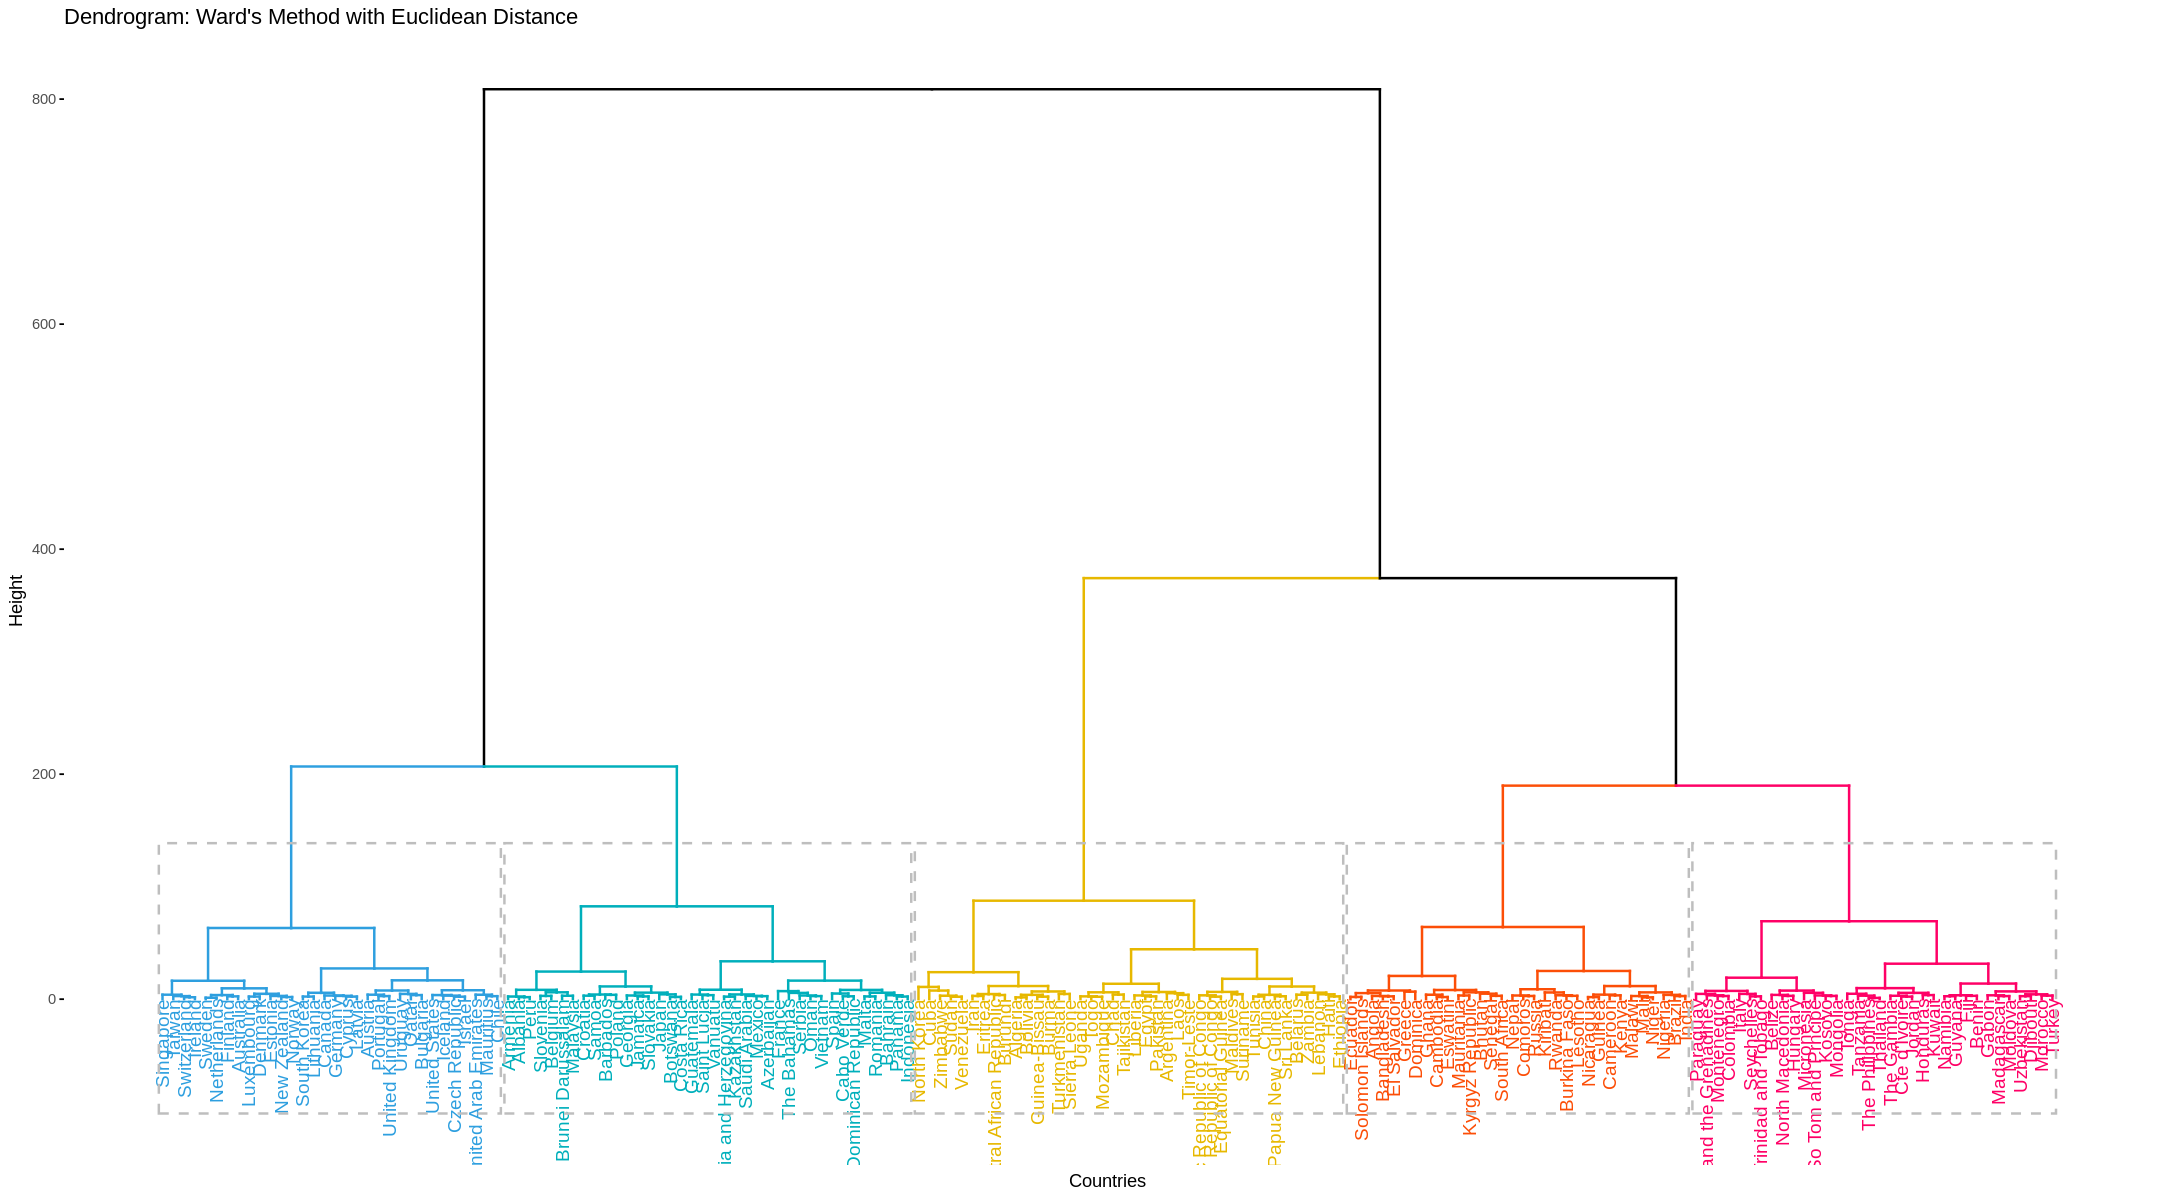

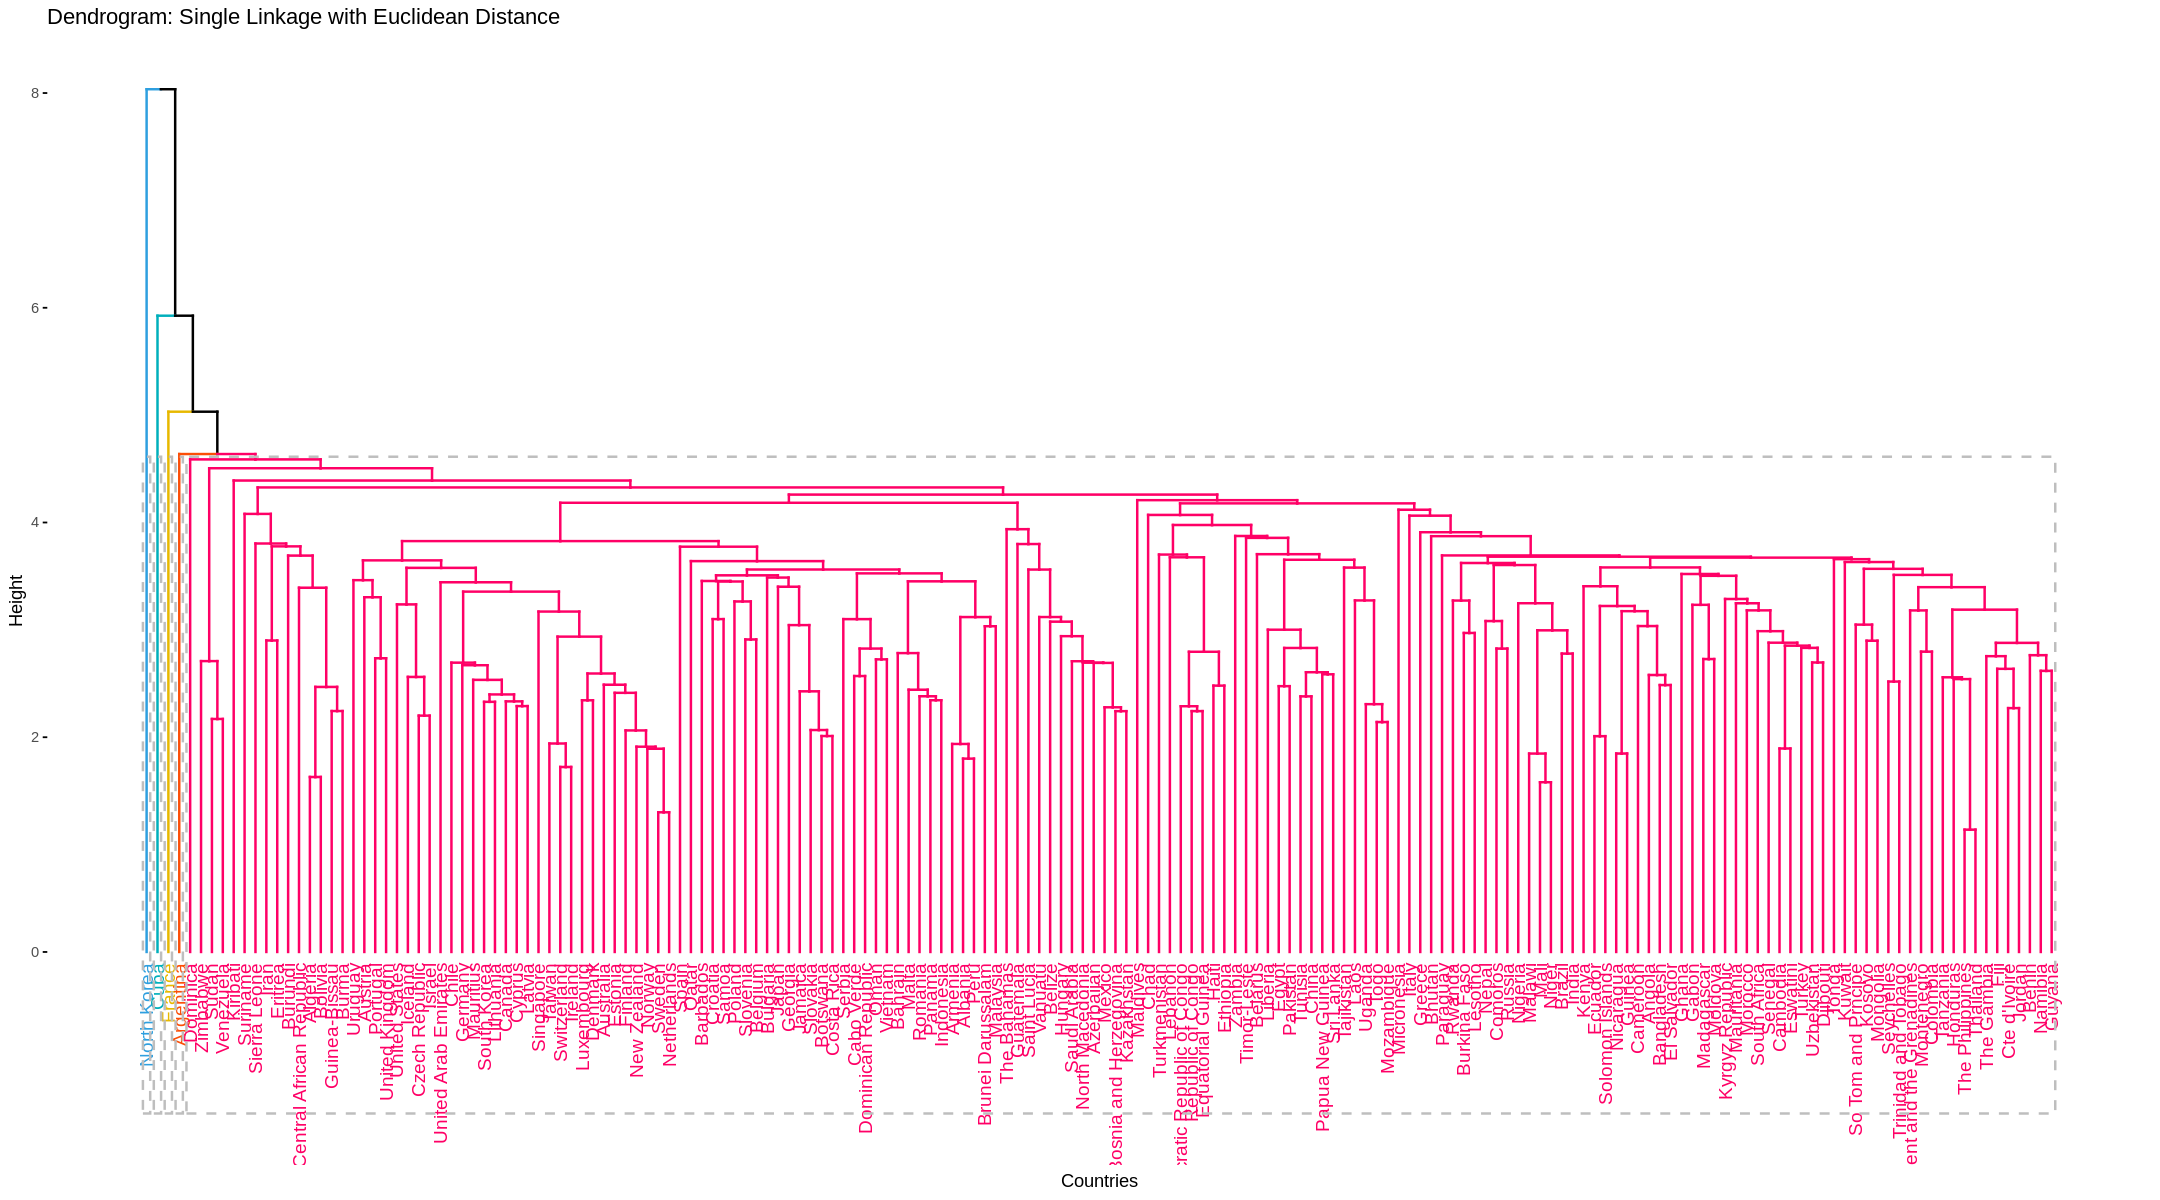

In [ ]:
# Plotting the dendrograms and sectioning with colors
# Ward's Method with Euclidean Distance
fviz_dend(hc_ward_euc, k = 5,
          main = "Dendrogram: Ward's Method with Euclidean Distance",
          xlab = "Countries", ylab = "Height",
          k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07", "#FF0066"),
          rect = TRUE)

# Single Linkage with Euclidean Distance",
fviz_dend(hc_single_euc, k = 5,
          main = "Dendrogram: Single Linkage with Euclidean Distance",
          xlab = "Countries", ylab = "Height",
          k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07", "#FF0066"),
          rect = TRUE)

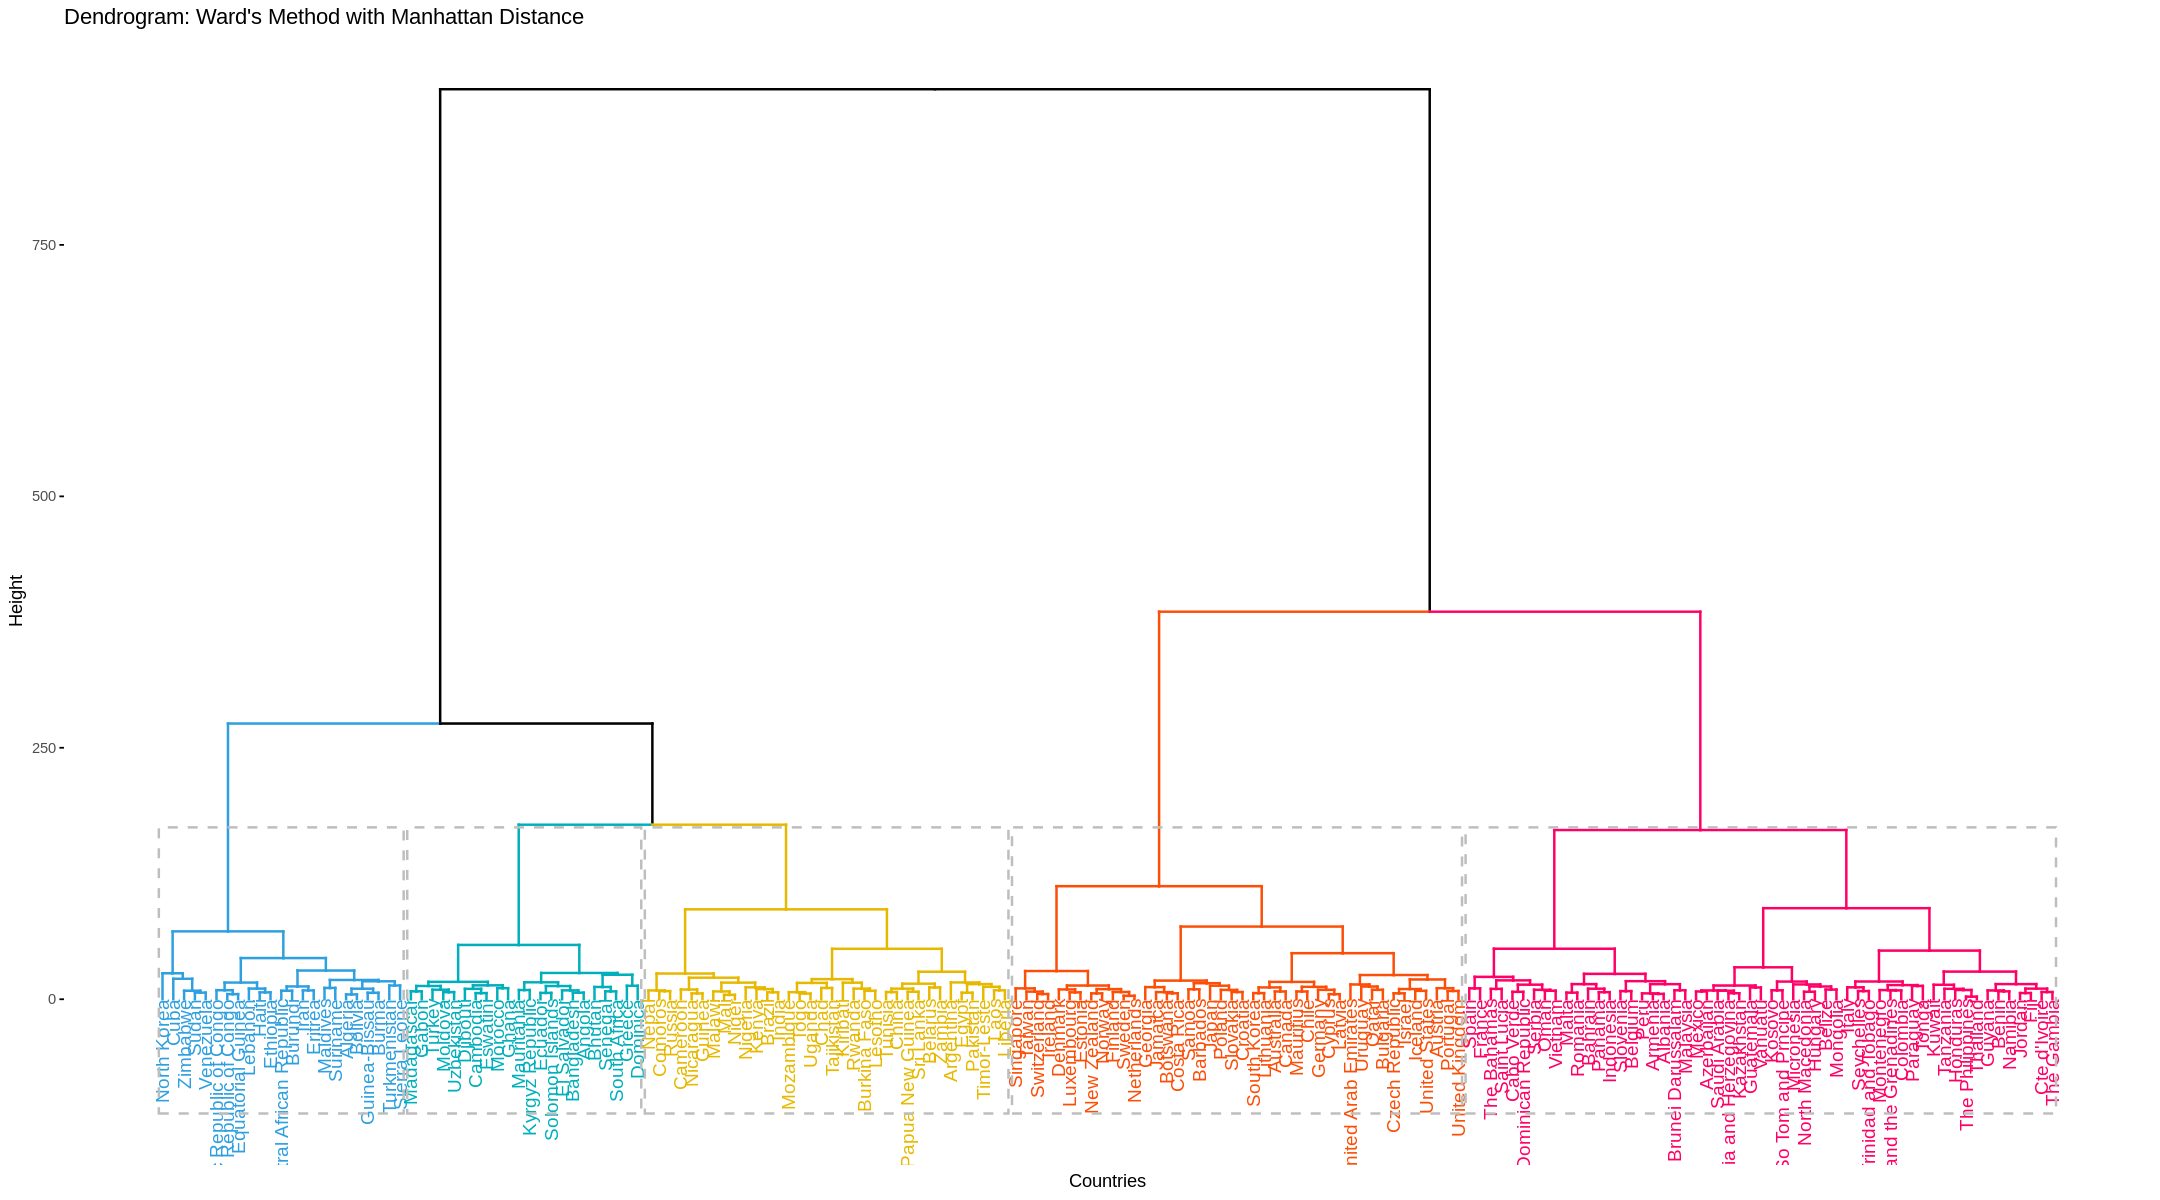

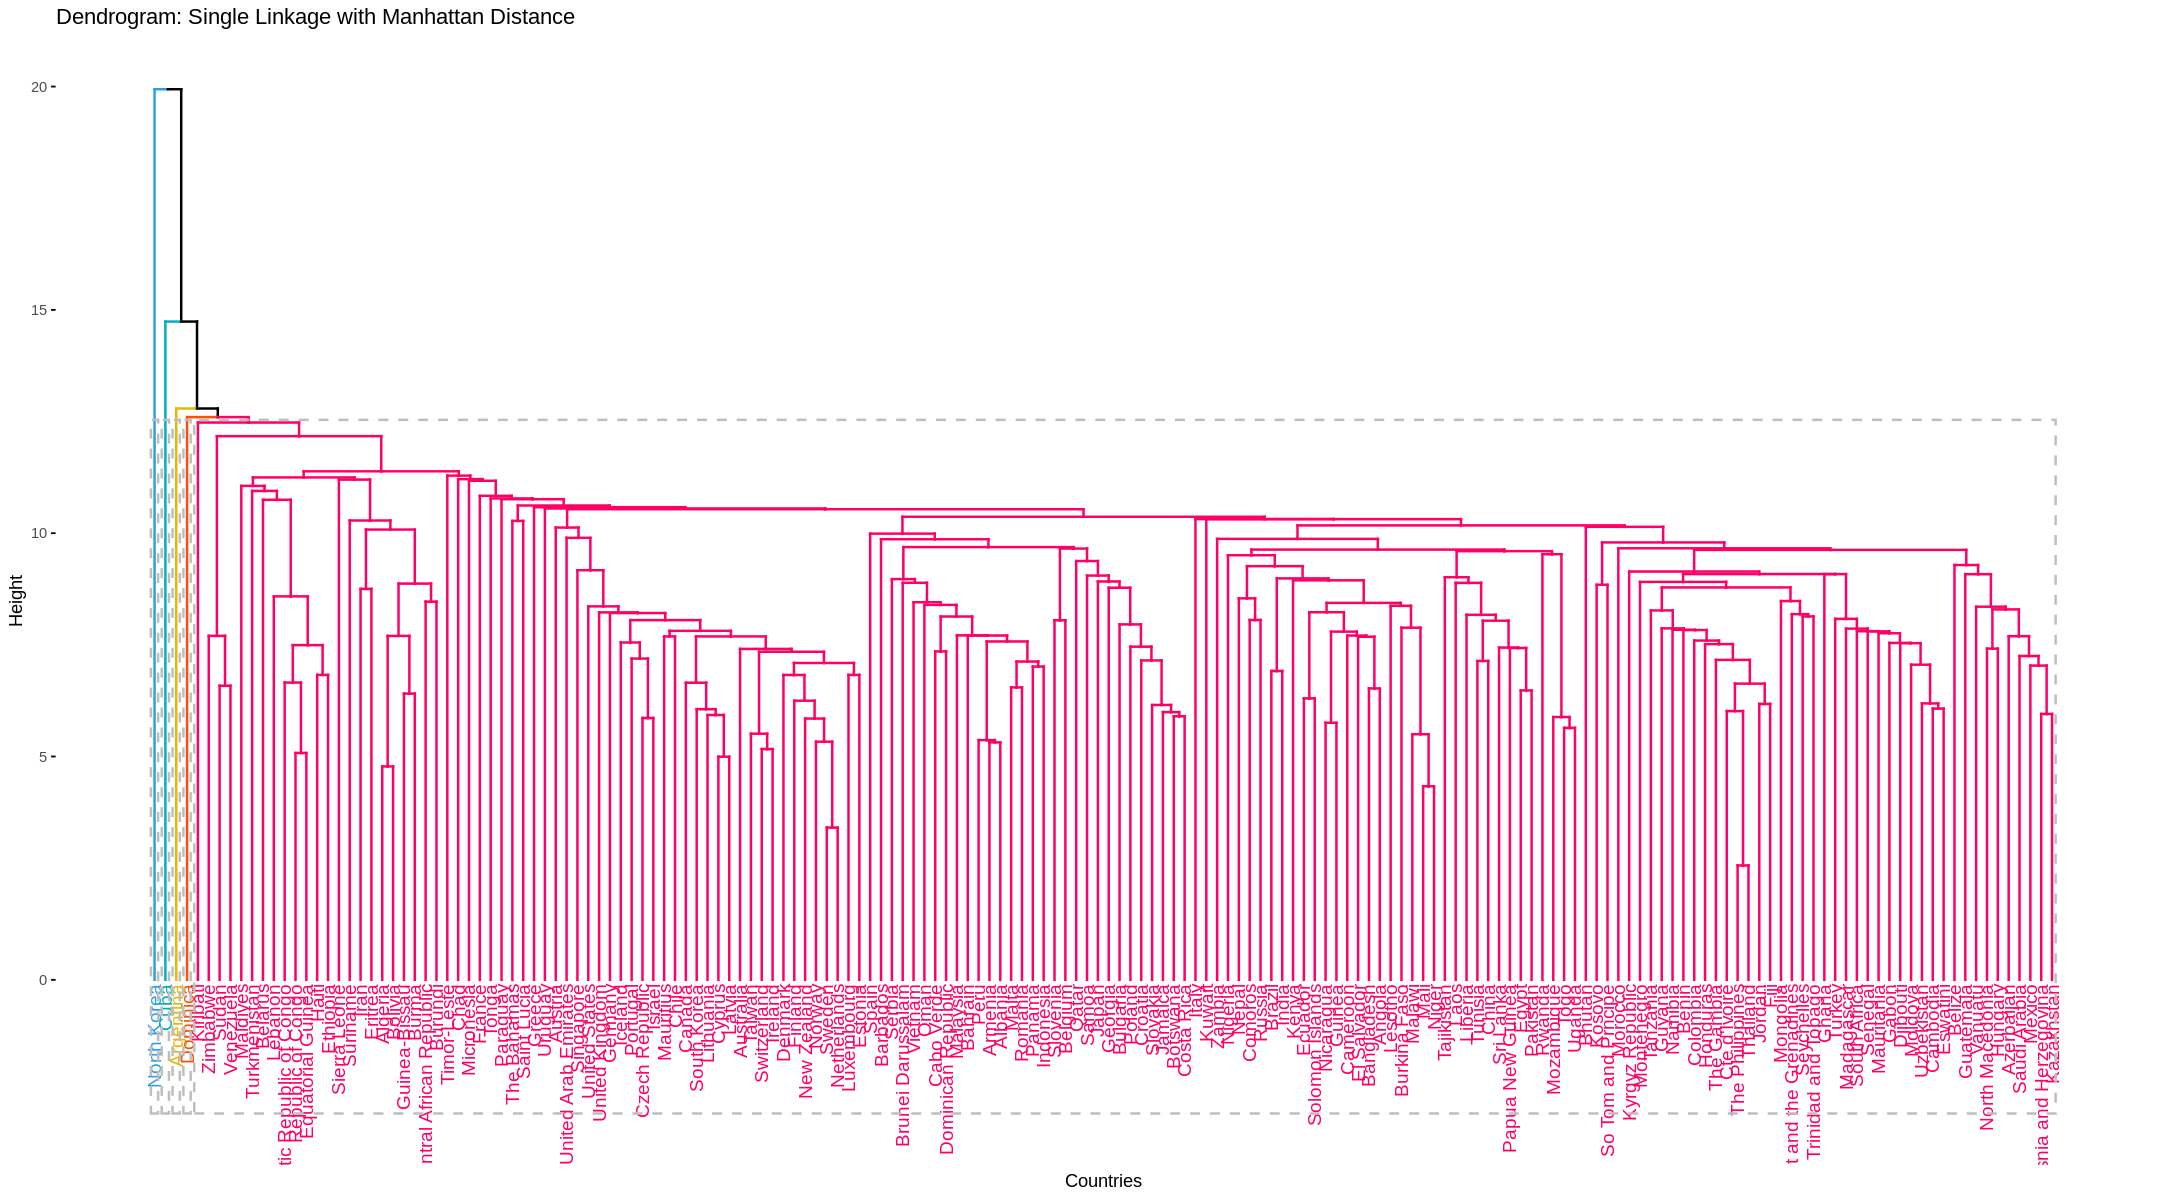

In [ ]:
# Ward's Method with Manhattan Distance
fviz_dend(hc_ward_man, k = 5,
          main = "Dendrogram: Ward's Method with Manhattan Distance",
          xlab = "Countries", ylab = "Height",
          k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07", "#FF0066"),
          rect = TRUE)

# Single Linkage with Manhattan Distance
fviz_dend(hc_single_man, k = 5,
          main = "Dendrogram: Single Linkage with Manhattan Distance",
          xlab = "Countries", ylab = "Height",
          k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07", "#FF0066"),
          rect = TRUE)



**Comparison of Methods:**

Ward's method with Euclidean distance tends to produce more balanced clusters.

Complete linkage is more sensitive to outliers but can identify distinct groups.

Manhattan distance gives slightly different results from the Euclididean distance, but it is less sensitive to extreme values.

**Cluster Interpretation:**

Cluster 1 (typically blue): Highly economically free countries

Cluster 2 (typically green): Moderately free developed nations

Cluster 3 (typically yellow): Developing nations with mixed economic freedom

Cluster 4 (typically red): Countries with significant government intervention

Cluster 5 (typically pink): Least economically free countries
**Regional Patterns:**

European countries predominantly fall into clusters 1 and 2.

African nations are mostly in clusters 3 and 4.

Asia-Pacific shows the most diversity across clusters.

**Comparison Table**:

| Distance Metric | Linkage Method | Agglomerative Coefficient |
|-----------------|----------------|---------------------------|
| Euclidean       | Ward's Method  | 	757.1714           (High)                     |
| Euclidean       | Single Linkage | 107.3331 (Low)                      |
| Manhattan       | Ward's Method | 2436.3366(High)                      |
| Manhattan       | Single Linkage | 273.0000(Low)                      |

**Interpretation**:
- Ward's method with Euclidean and Manhattan distances tends to form compact, spherical clusters.

- Complete linkage with Euclidean distance results in a much lower height, indicating tighter clusters.

- The height values provide insight into how the clustering merges at different levels.

In [ ]:
# For variables (columns)
cor_matrix = cor(cleaned_data[, pillar_vars])
dist_vars = as.dist(1 - cor_matrix)
hc_vars = hclust(dist_vars, method = "ward.D2")
plot(hc_vars, main = "Dendrogram for Pillar Variables")

ERROR: Error: object 'pillar_vars' not found


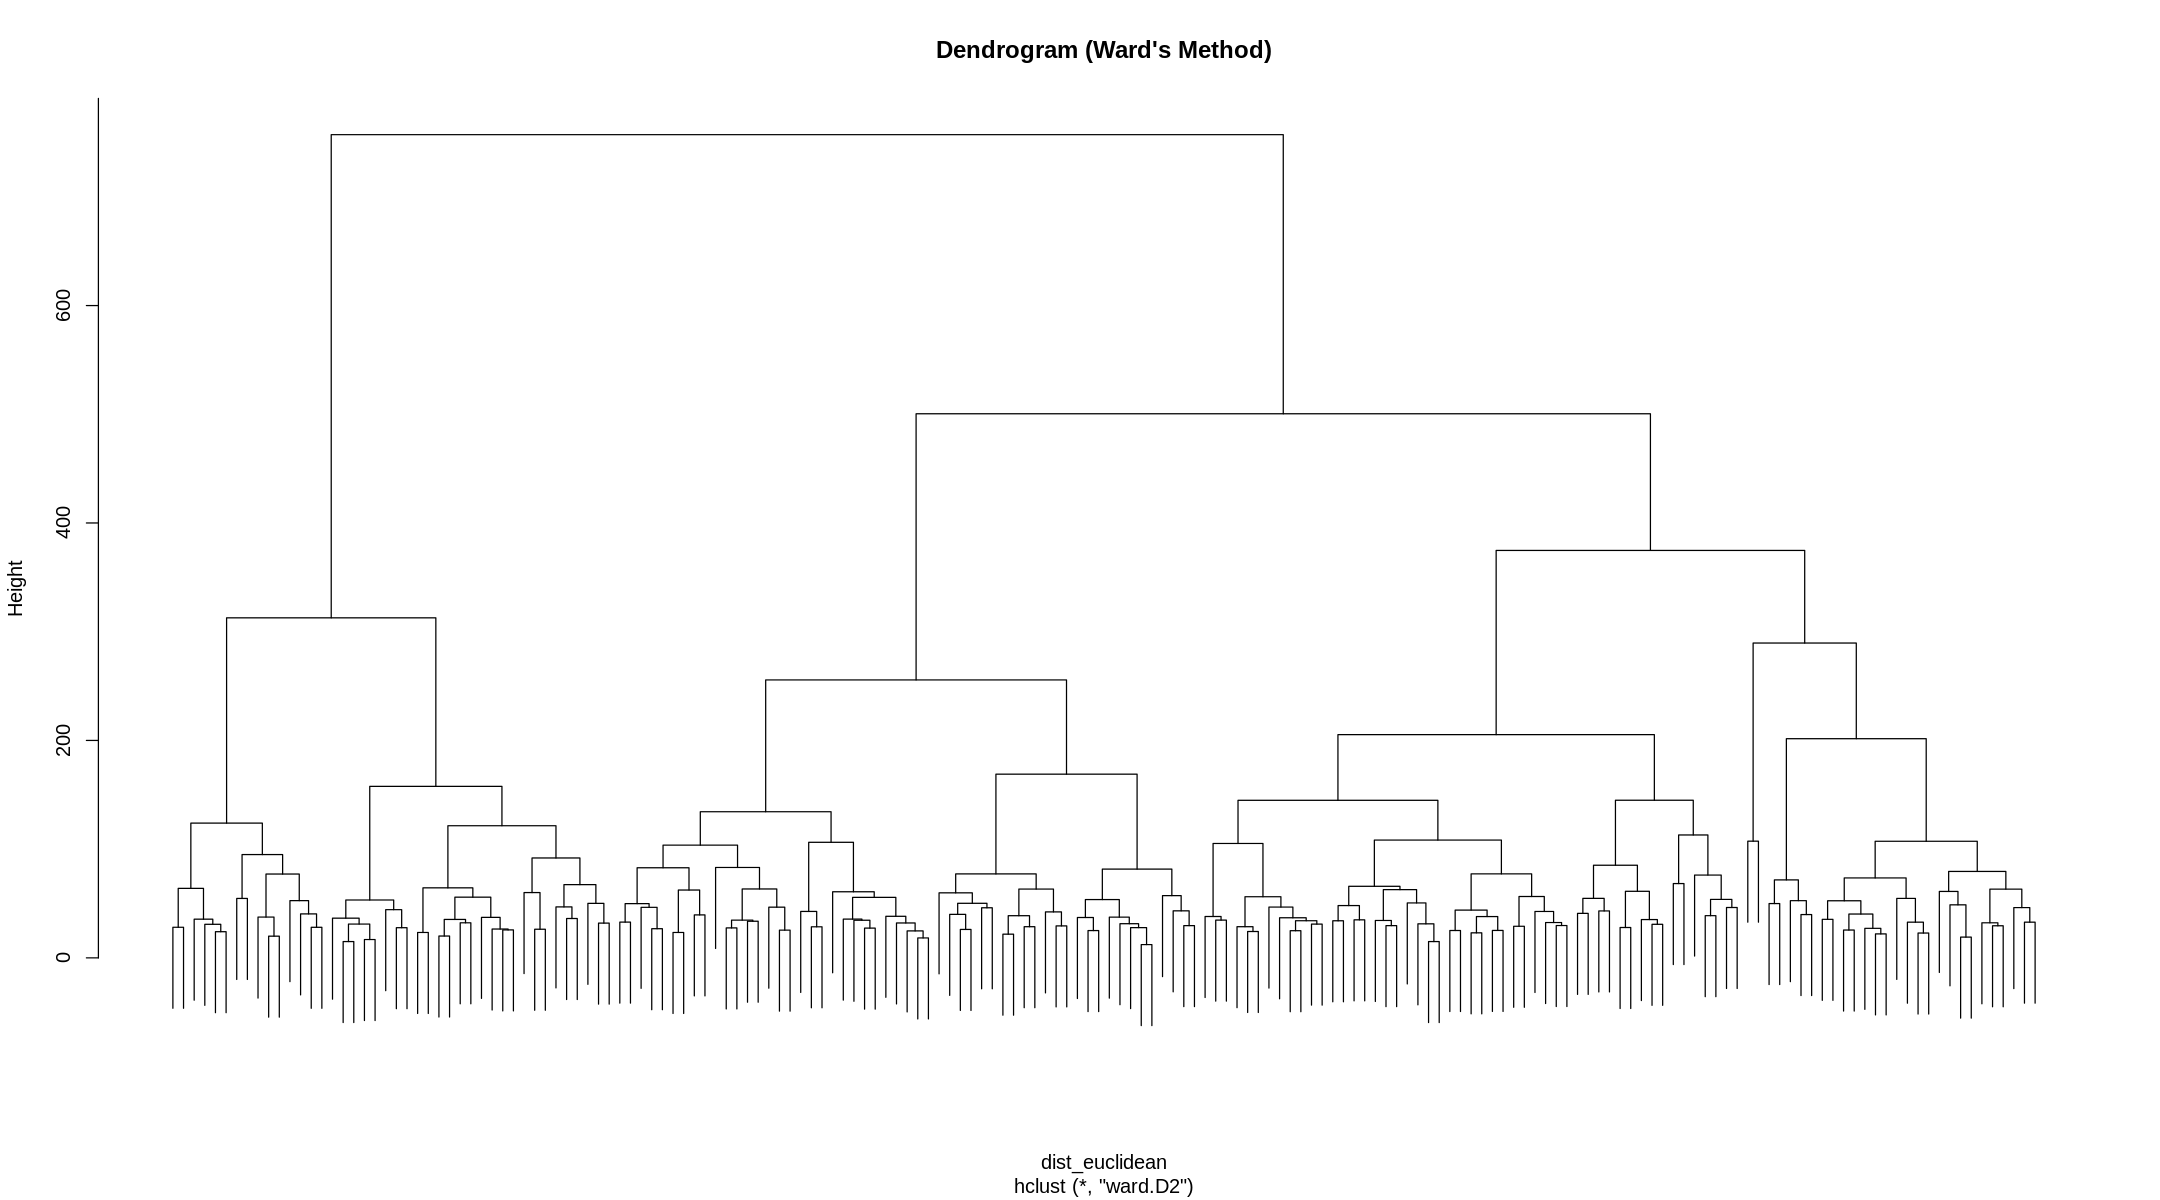

In [ ]:
# Plot without labels
plot(hc_ward_euc, labels = FALSE, main = "Dendrogram (Ward's Method)")

#### (b) Clustering Pillar Variables (Columns)
**Objective**: Cluster the 12 pillar variables to identify related groups.


In [ ]:
# Ensure country names are row names in the PCA dataset before clustering
rownames(pca_data) = clean_pillar$Country

# Compute dissimilarity matrix with different metrics
dist_maximum = dist(pca_data, method = "maximum")
dist_minkowski = dist(pca_data, method = "minkowski")

# Hierarchical clustering with different methods
hc_ward_max = hclust(dist_maximum, method = "ward.D2")
hc_single_max = hclust(dist_maximum, method = "single")
hc_ward_min = hclust(dist_minkowski, method = "ward.D2")
hc_single_min = hclust(dist_minkowski, method = "single")

# Compare results
cluster_results = data.frame(
  Method = c("Ward (maximum)", "Single (maximum)", "Ward (minkowski)", "Single (minkowski)"),
  Height = c(max(hc_ward_max$height), max(hc_single_max$height), max(hc_ward_min$height), max(hc_single_min$height)),
  Clusters_5 = c(length(unique(cutree(hc_ward_max, k = 5))),
               length(unique(cutree(hc_single_max, k = 5))),
               length(unique(cutree(hc_ward_min, k = 5))),
               length(unique(cutree(hc_single_min, k = 5))))
)
print(cluster_results)

Warning message:
“Setting row names on a tibble is deprecated.”


              Method   Height Clusters_5
1     Ward (maximum) 418.0050          5
2   Single (maximum)  67.0000          5
3   Ward (minkowski) 757.1714          5
4 Single (minkowski) 107.3331          5


**Comparison Table**:

| Distance Metric | Linkage Method | Agglomerative Coefficient |
|-----------------|----------------|---------------------------|
| Maximum       | Ward's Method  | 	418.0050 (High)                     |
| Maximum       | Single Linkage | 67.0000 (Low)                      |
| Minkowski       | Ward's Method | 757.1714  (High)                      |
| Minkowski       | Single Linkage | 107.3331 (Low)                      |

**Interpretation**:
- Ward's method with Maximum and Minkowski distances tends to form compact, well-separated clusters, which is reflected in the higher agglomerative coefficient values

- Single linkage with Maximum and Minkowski distances produces longer, chain-like clusters, indicated by the lower height values.

- The agglomerative coefficient (height) represents the dissimilarity at which clusters merge. Higher values suggest clusters are well-separated, while lower values indicate closer, more gradual merging.

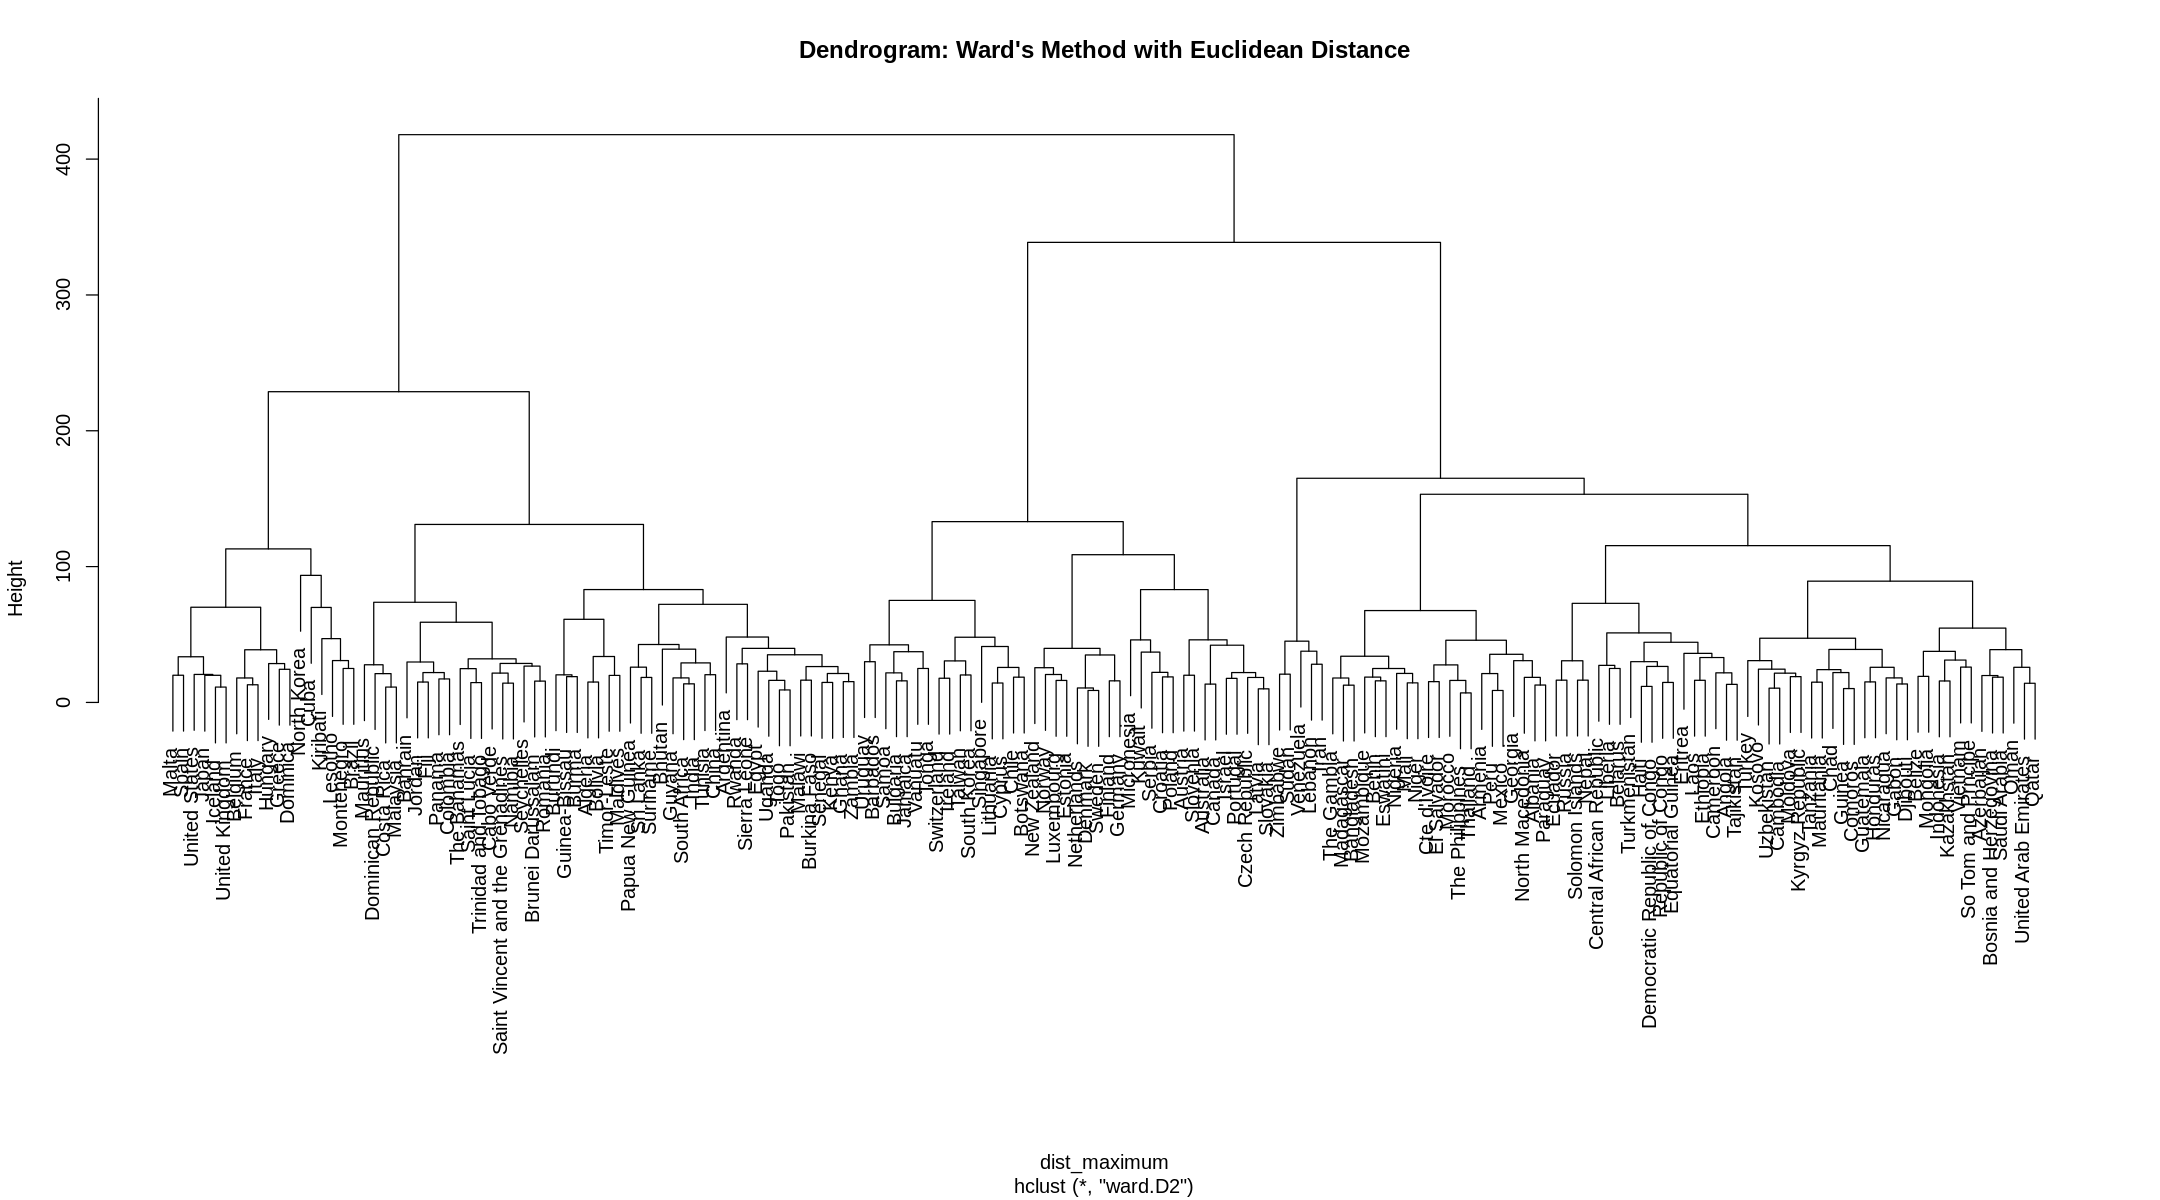

In [ ]:
plot(hc_ward_max, labels = clean_pillar$Country, main = "Dendrogram: Ward's Method with Euclidean Distance")

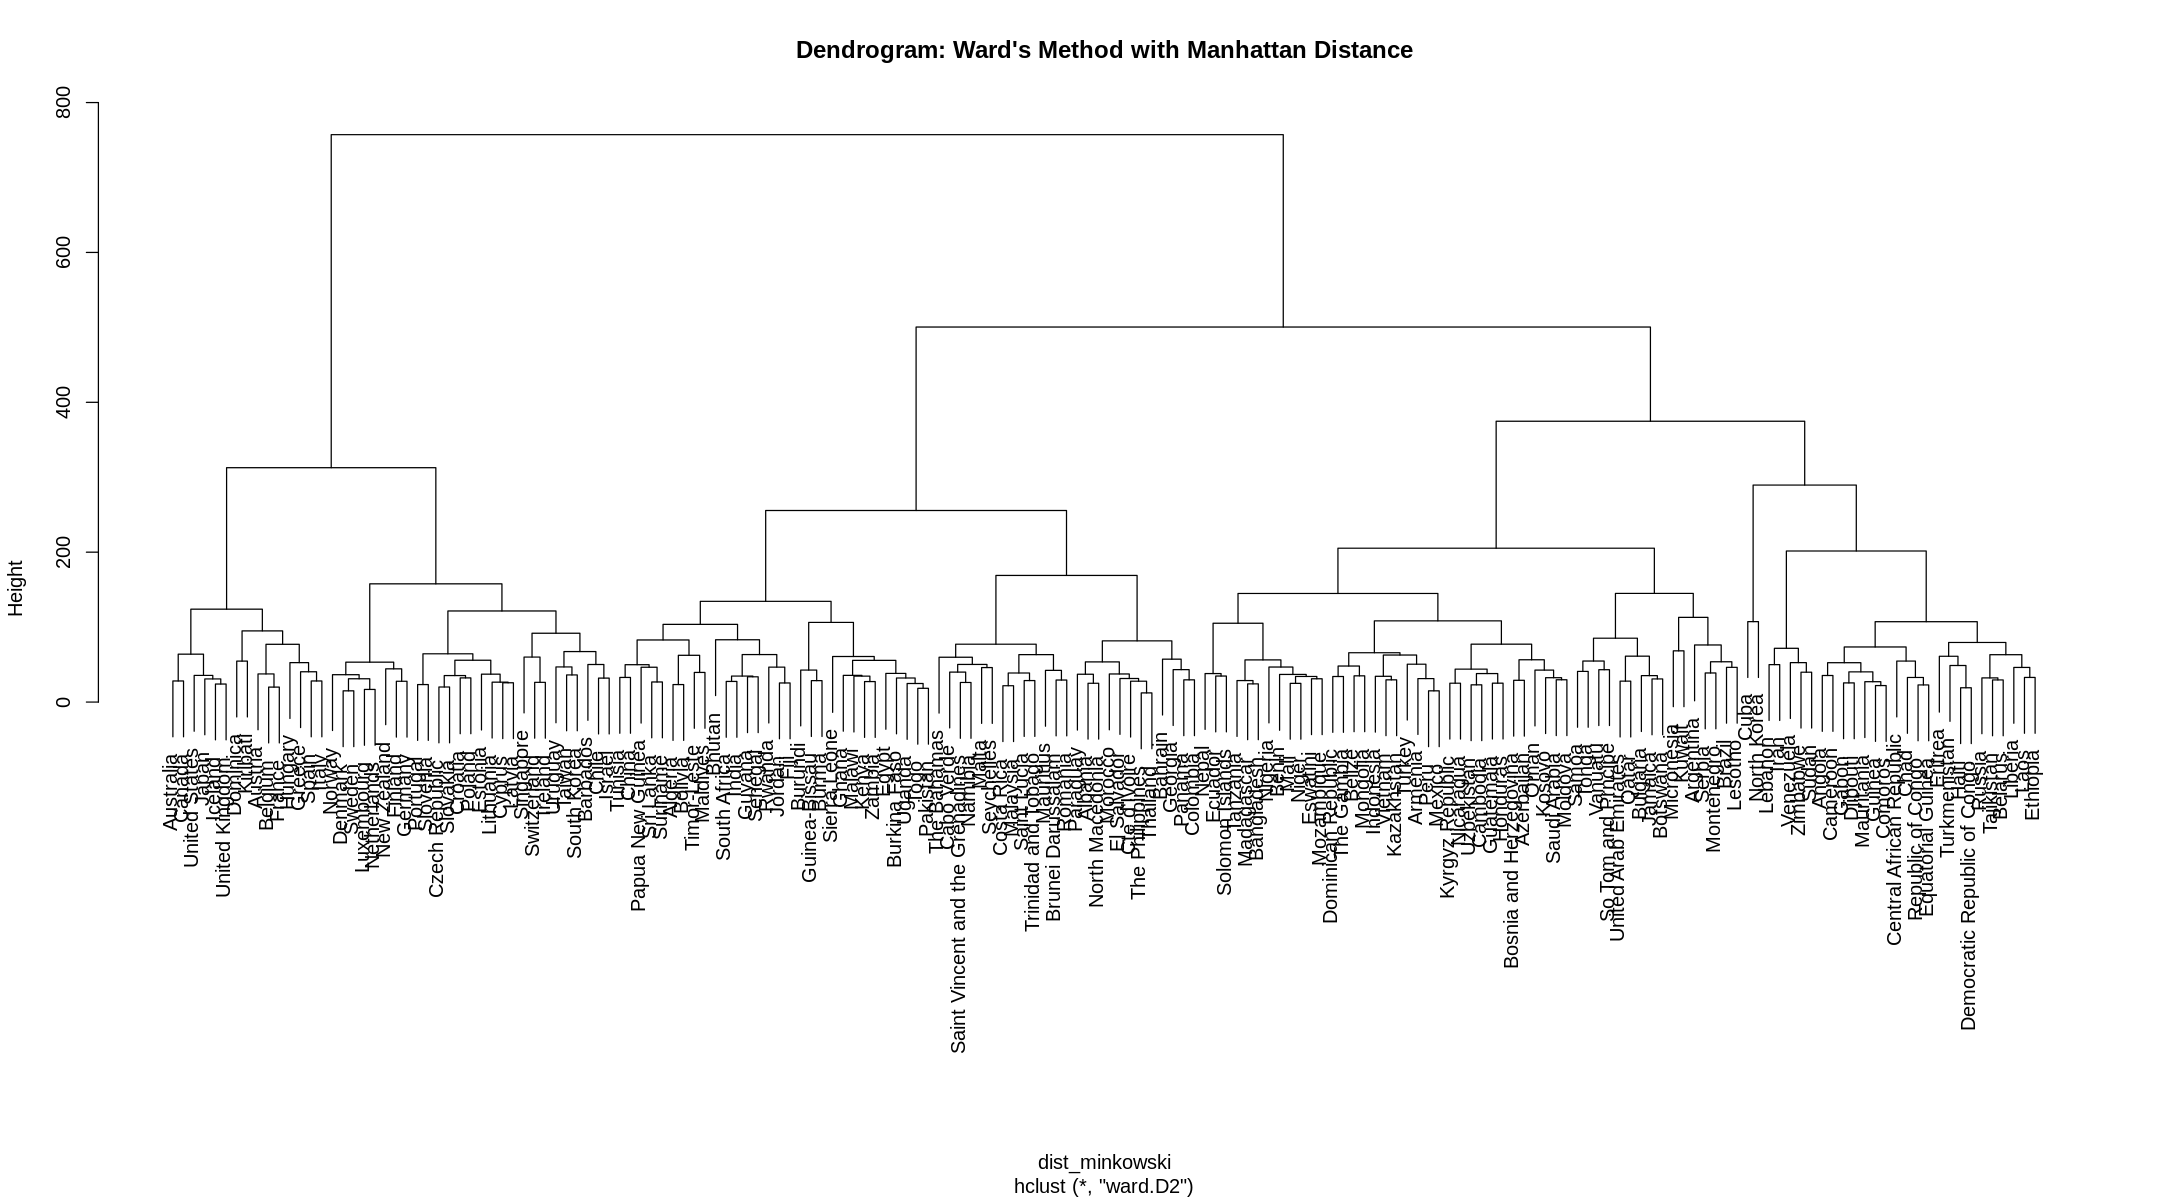

In [ ]:
plot(hc_ward_min, labels = clean_pillar$Country, main = "Dendrogram: Ward's Method with Manhattan Distance")

**Interpretation**:
- Clustering identifies natural groupings like "Regulatory Efficiency" and "Open Markets."
- These insights align with PCA, where correlated variables group together.


### Task 1 (3) - Summary and Critical Assessment `old`
**PCA vs. Clustering**:
- PCA highlights the dominant dimensions of variability, showing regions and countries' strengths/weaknesses across pillars.
- Clustering groups similar countries or variables, offering actionable groupings.

**Combined Approach**:
- Combining PCA with clustering can validate findings: PCA determines key dimensions, while clustering confirms group membership.
- To communicate to the public, we can use visuals like biplots and dendrograms with clear, non-technical labels.



### Task 1 (3) - Summary and Critical Assessment
**Key Insights:**

**PCA Findings:**

  * The first few principal components capture the majority of variance in economic freedom.

  * PC1 represents overall economic freedom, while subsequent PCs differentiate between types of freedom.

  * Regional patterns are evident, with Europe and Asia-Pacific generally scoring higher.

**Cluster Analysis Findings:**

  - Countries naturally group into 4-5 clusters based on economic freedom profiles.

  - The clusters align somewhat with regions but also reveal interesting exceptions.

  - Variable clustering strongly supports the original four-pillar structure.

**Similarities and Conflicts:**

- Both methods identify Singapore, Switzerland, and Ireland as leaders in economic freedom.

- Both show Venezuela and North Korea as distinct outliers with very low freedom.

- PCA provides continuous dimensions while clustering gives discrete groupings - sometimes countries near boundaries in PCA end up in different clusters.

**Methodological Critique:**

- PCA Strengths: Dimensionality reduction, visualization of complex data, identifies key drivers.

- PCA Limitations: Interpretation of PCs can be subjective; assumes linear relationships.

- Clustering Strengths: Identifies natural groupings; can handle non-linear patterns.

- Clustering Limitations: Sensitive to distance metric and linkage method; requires choosing number of clusters.

**Combining Methods:**

- PCA can be used first to reduce noise and highlight key dimensions before clustering.

- Cluster results can help interpret PCA by coloring points in biplots by cluster.

- Together they provide both continuous (PCA) and discrete (clustering) perspectives.



### **References**  
Madden, J. (2022, November 10). Normalizing vs. scaling before PCA. Cross Validated. Retrieved Jan 5, 2019, from https://stats.stackexchange.com/q/385782

Heritage Foundation. (2024). Index of Economic Freedom. https://www.heritage.org/index/

Kassambara, A. (2017). Practical Guide to Cluster Analysis in R. STHDA.

Husson, F., Le, S., & Pagès, J. (2017). Exploratory Multivariate Analysis by Example Using R. CRC Press.

